# Part 2 | Multivariate EDA

## Part 2.1 | Exploring Relationships

In [7]:
from Weidman_Figures import *

beans = pd.read_csv('Part_2_1/Coffee_Bean_Production.csv')#, index_col=0)
beans = beans.dropna(subset=['Code'])
beans = beans.rename(columns={'Coffee, green | 00000656 || Production | 005510 || tonnes': 'Tonnes'})
beans = beans.drop(columns=['Entity'])

gdp = pd.read_csv('Part_2_1/GDP.csv')#, index_col=0)
gdp = gdp.rename(columns={'GDP (output, multiple price benchmarks)': 'GDP'})

data = pd.merge(beans, gdp, on=['Code', 'Year'], how='inner')
data['GDP'] = data['GDP']/1_000_000_000_000
data['Tonnes'] = data['Tonnes']/1000000
data = data[data.Entity != 'World']
data = data[data.Tonnes > 0.01]
data = data[data.GDP < 9]
data.to_csv('Part_2_1/Beans_GDP.csv')

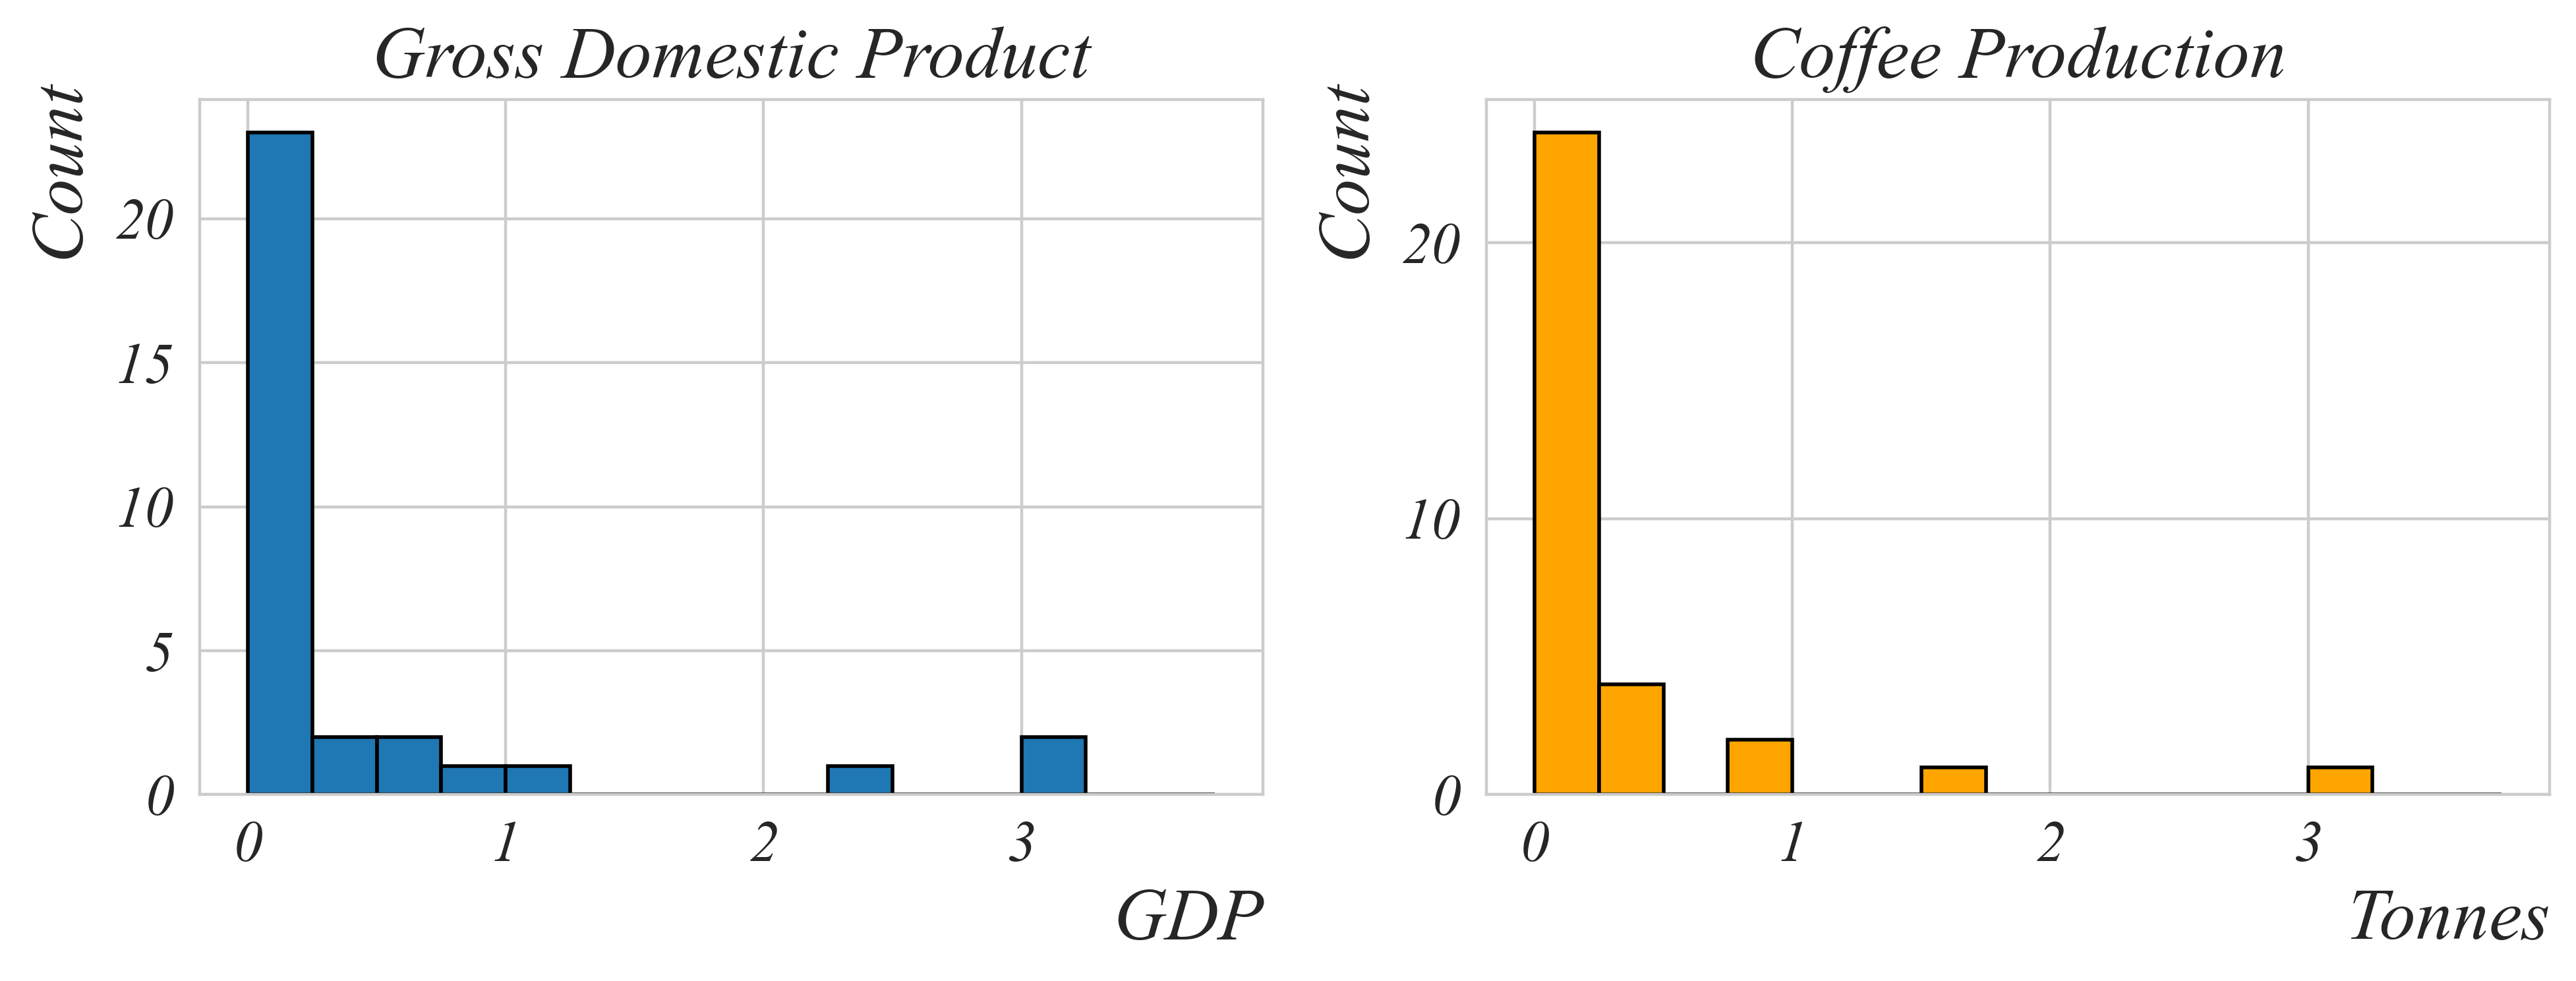

In [20]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(widths=[1,1], height=4, fontsize=20)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]

bin_edges = np.arange(0, 4, 1/4)

ax[0].hist(data['GDP'], bins=bin_edges, edgecolor='black')
ax[0].set_xlabel('GDP', loc='right')
ax[0].set_ylabel('Count')
ax[0].yaxis.set_label_coords(-0.1, 0.90)
ax[0].set_title('Gross Domestic Product')

ax[1].hist(data['Tonnes'], bins=bin_edges, edgecolor='black', color='orange')
ax[1].set_xlabel('Tonnes', loc='right')
ax[1].set_ylabel('Count')
ax[1].yaxis.set_label_coords(-0.1, 0.90)
ax[1].set_title('Coffee Production')

plt.tight_layout()
plt.savefig('Part_2_1/i/1.png')
plt.show()

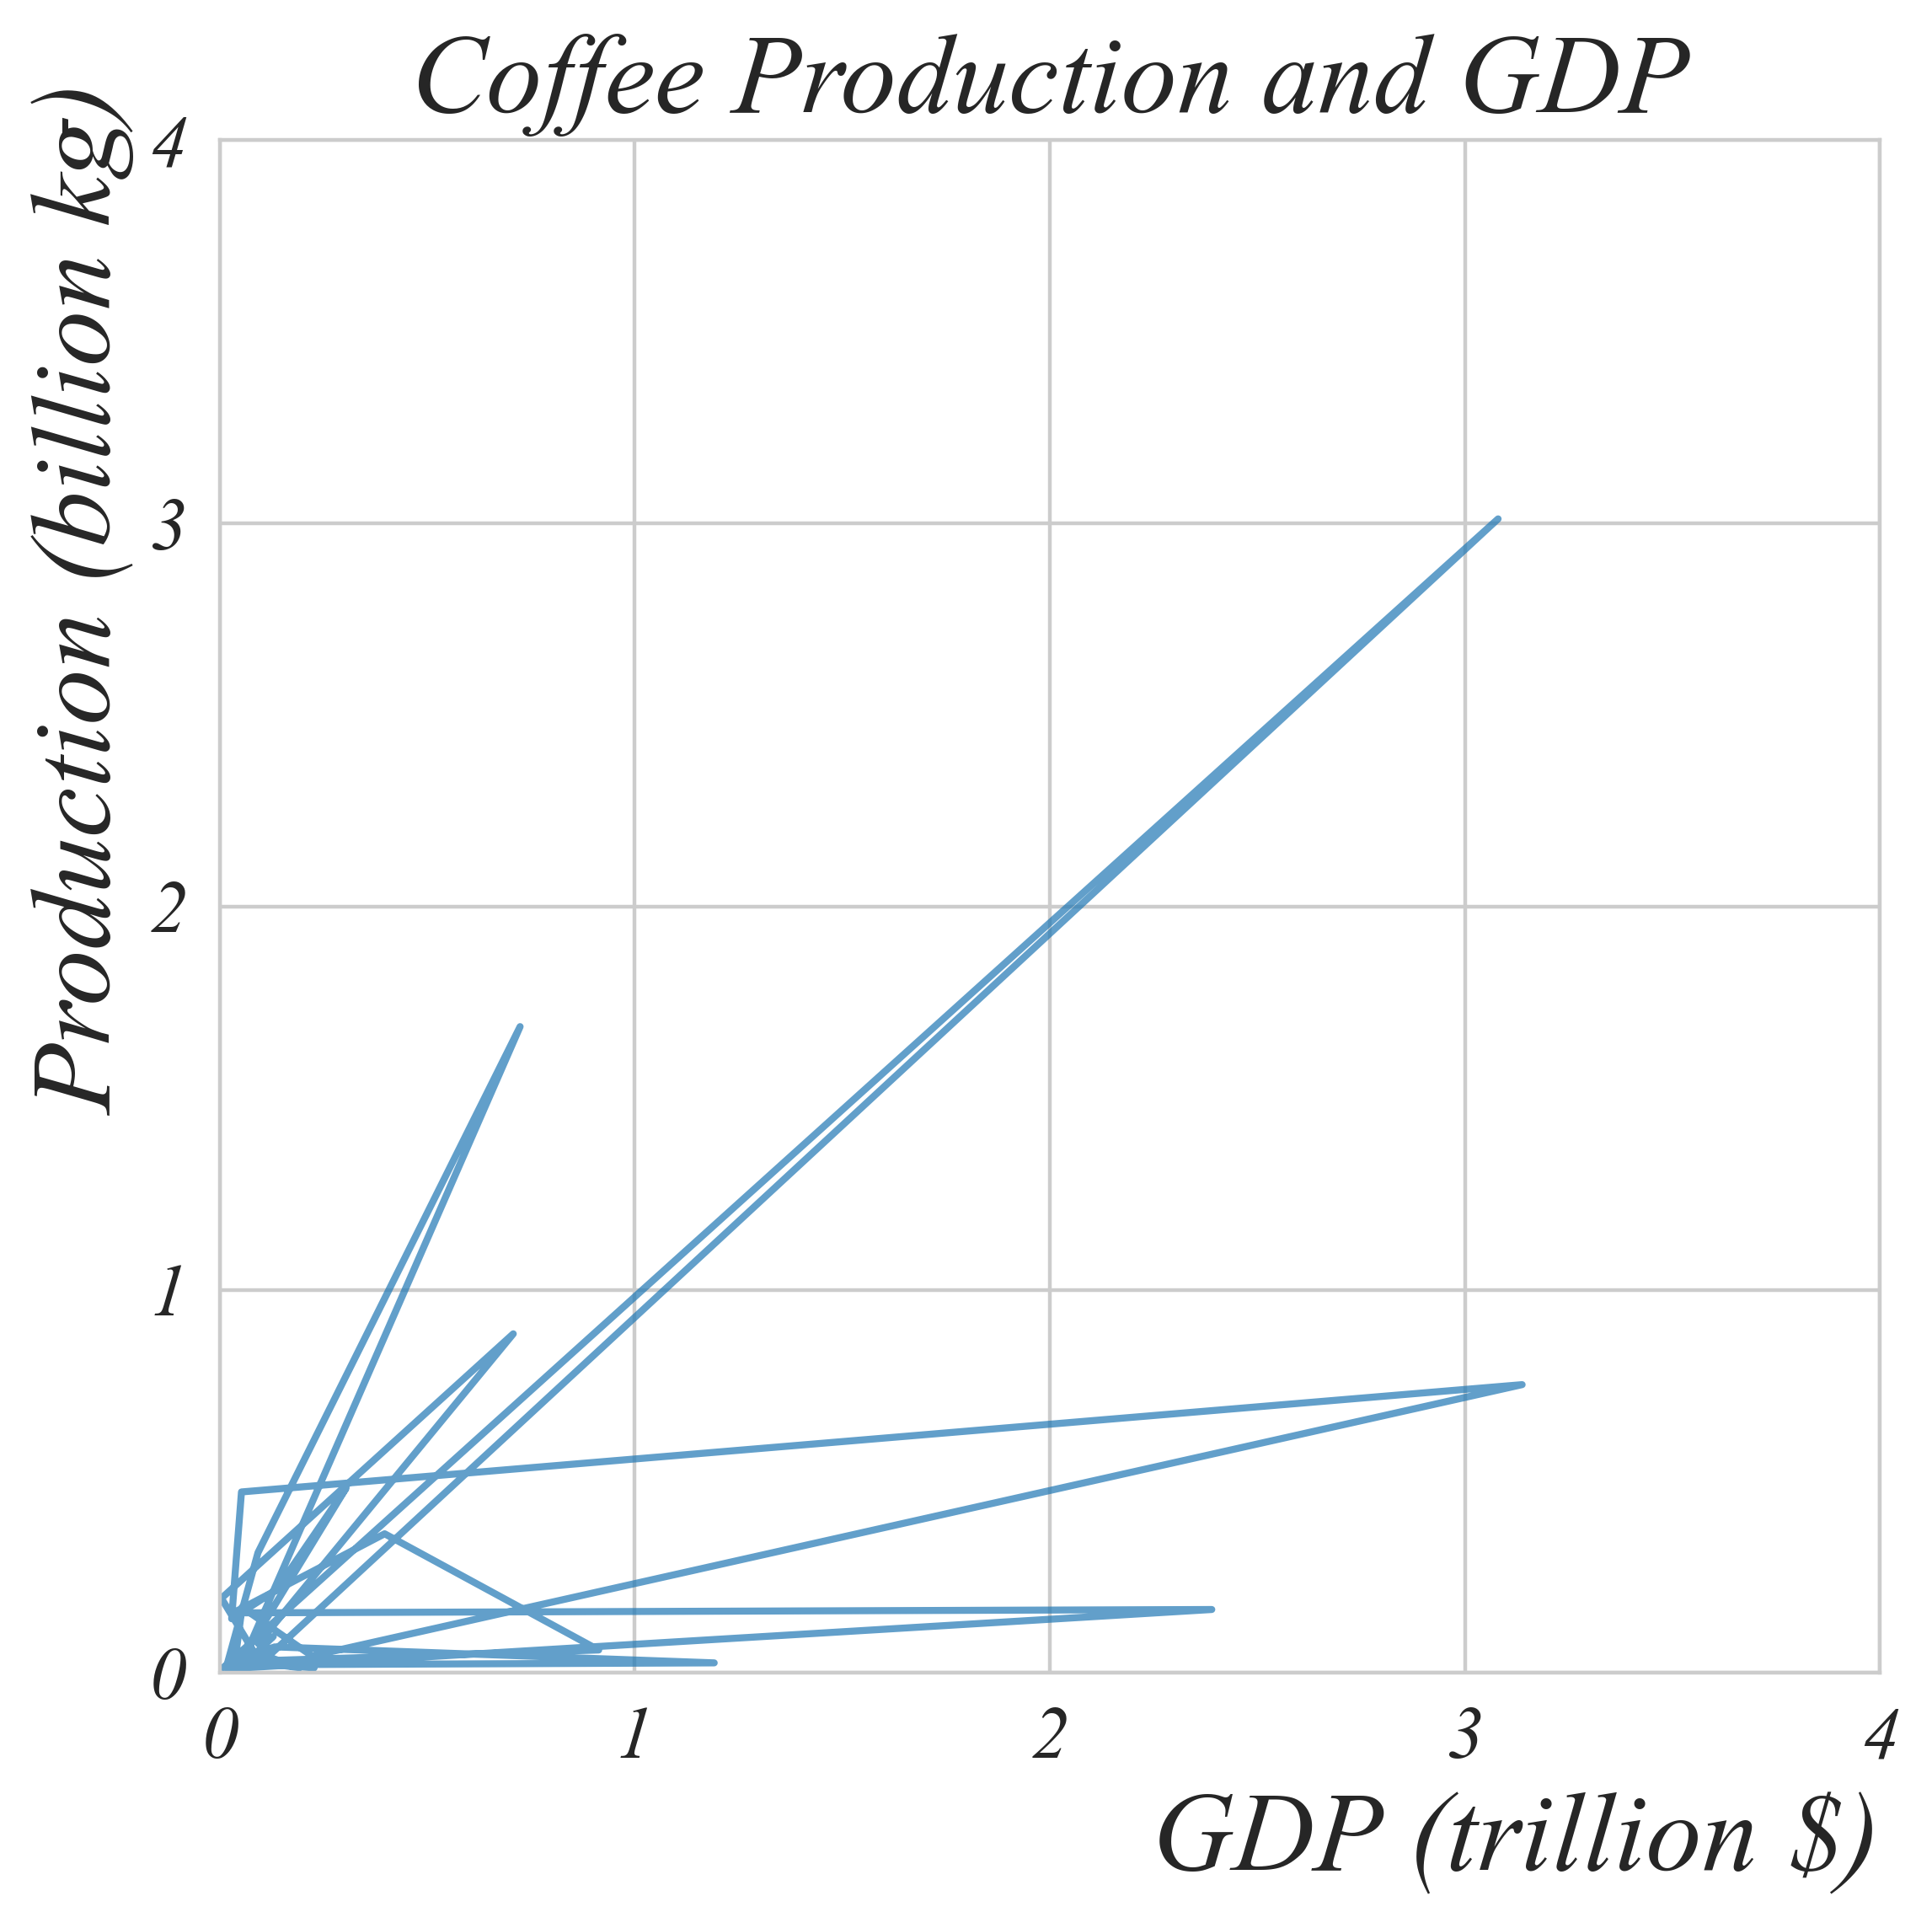

In [1]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]

plt.plot(data['GDP'], data['Tonnes'], alpha=0.7)

plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks([0,1,2,3,4])
plt.xlim(0,4)
plt.ylabel('Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.05, .7)
plt.yticks([0,1,2,3,4])
plt.ylim(0,4)
plt.title('Coffee Production and GDP')
plt.tight_layout()
plt.savefig('Part_2_1/i/2.png')

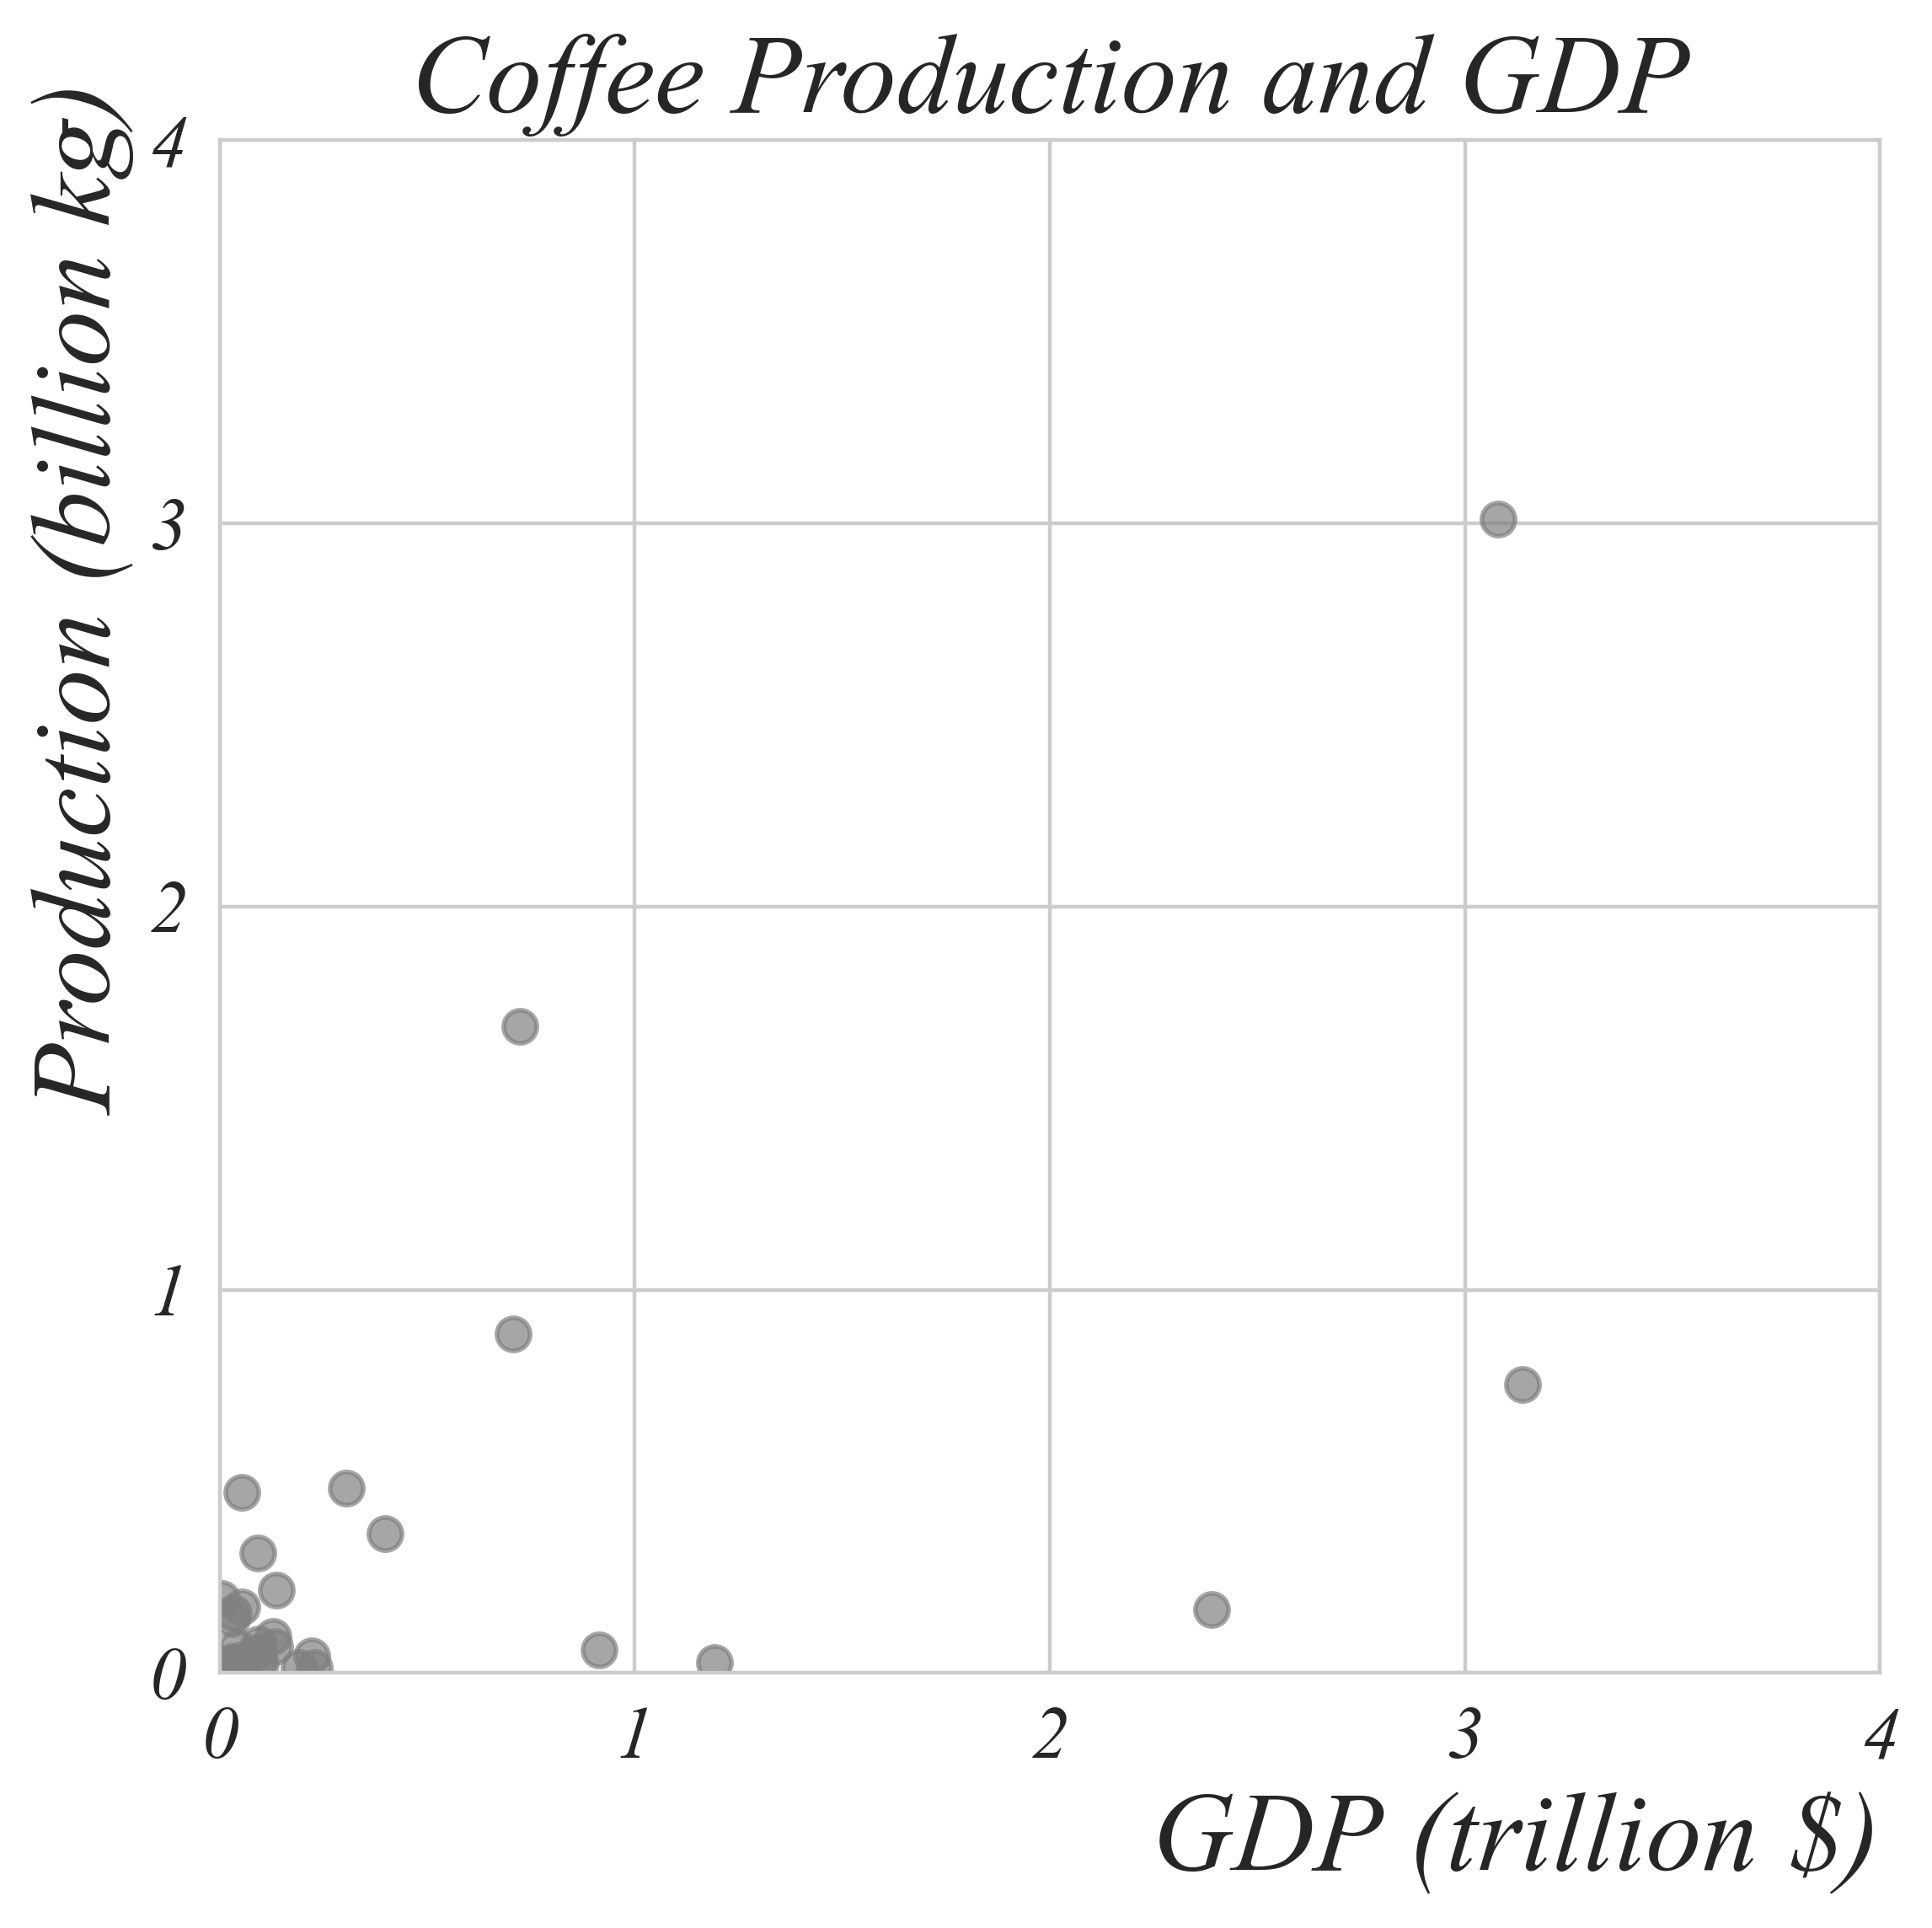

In [2]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]
#print(data.head())

plt.scatter(data['GDP'], data['Tonnes'], color='grey', edgecolors='grey', alpha=0.7, s=50)

plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks([0,1,2,3,4])
plt.xlim(0,4)
plt.ylabel('Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.05, .7)
plt.yticks([0,1,2,3,4])
plt.ylim(0,4)
plt.title('Coffee Production and GDP')
plt.tight_layout()
plt.savefig('Part_2_1/i/3.png')

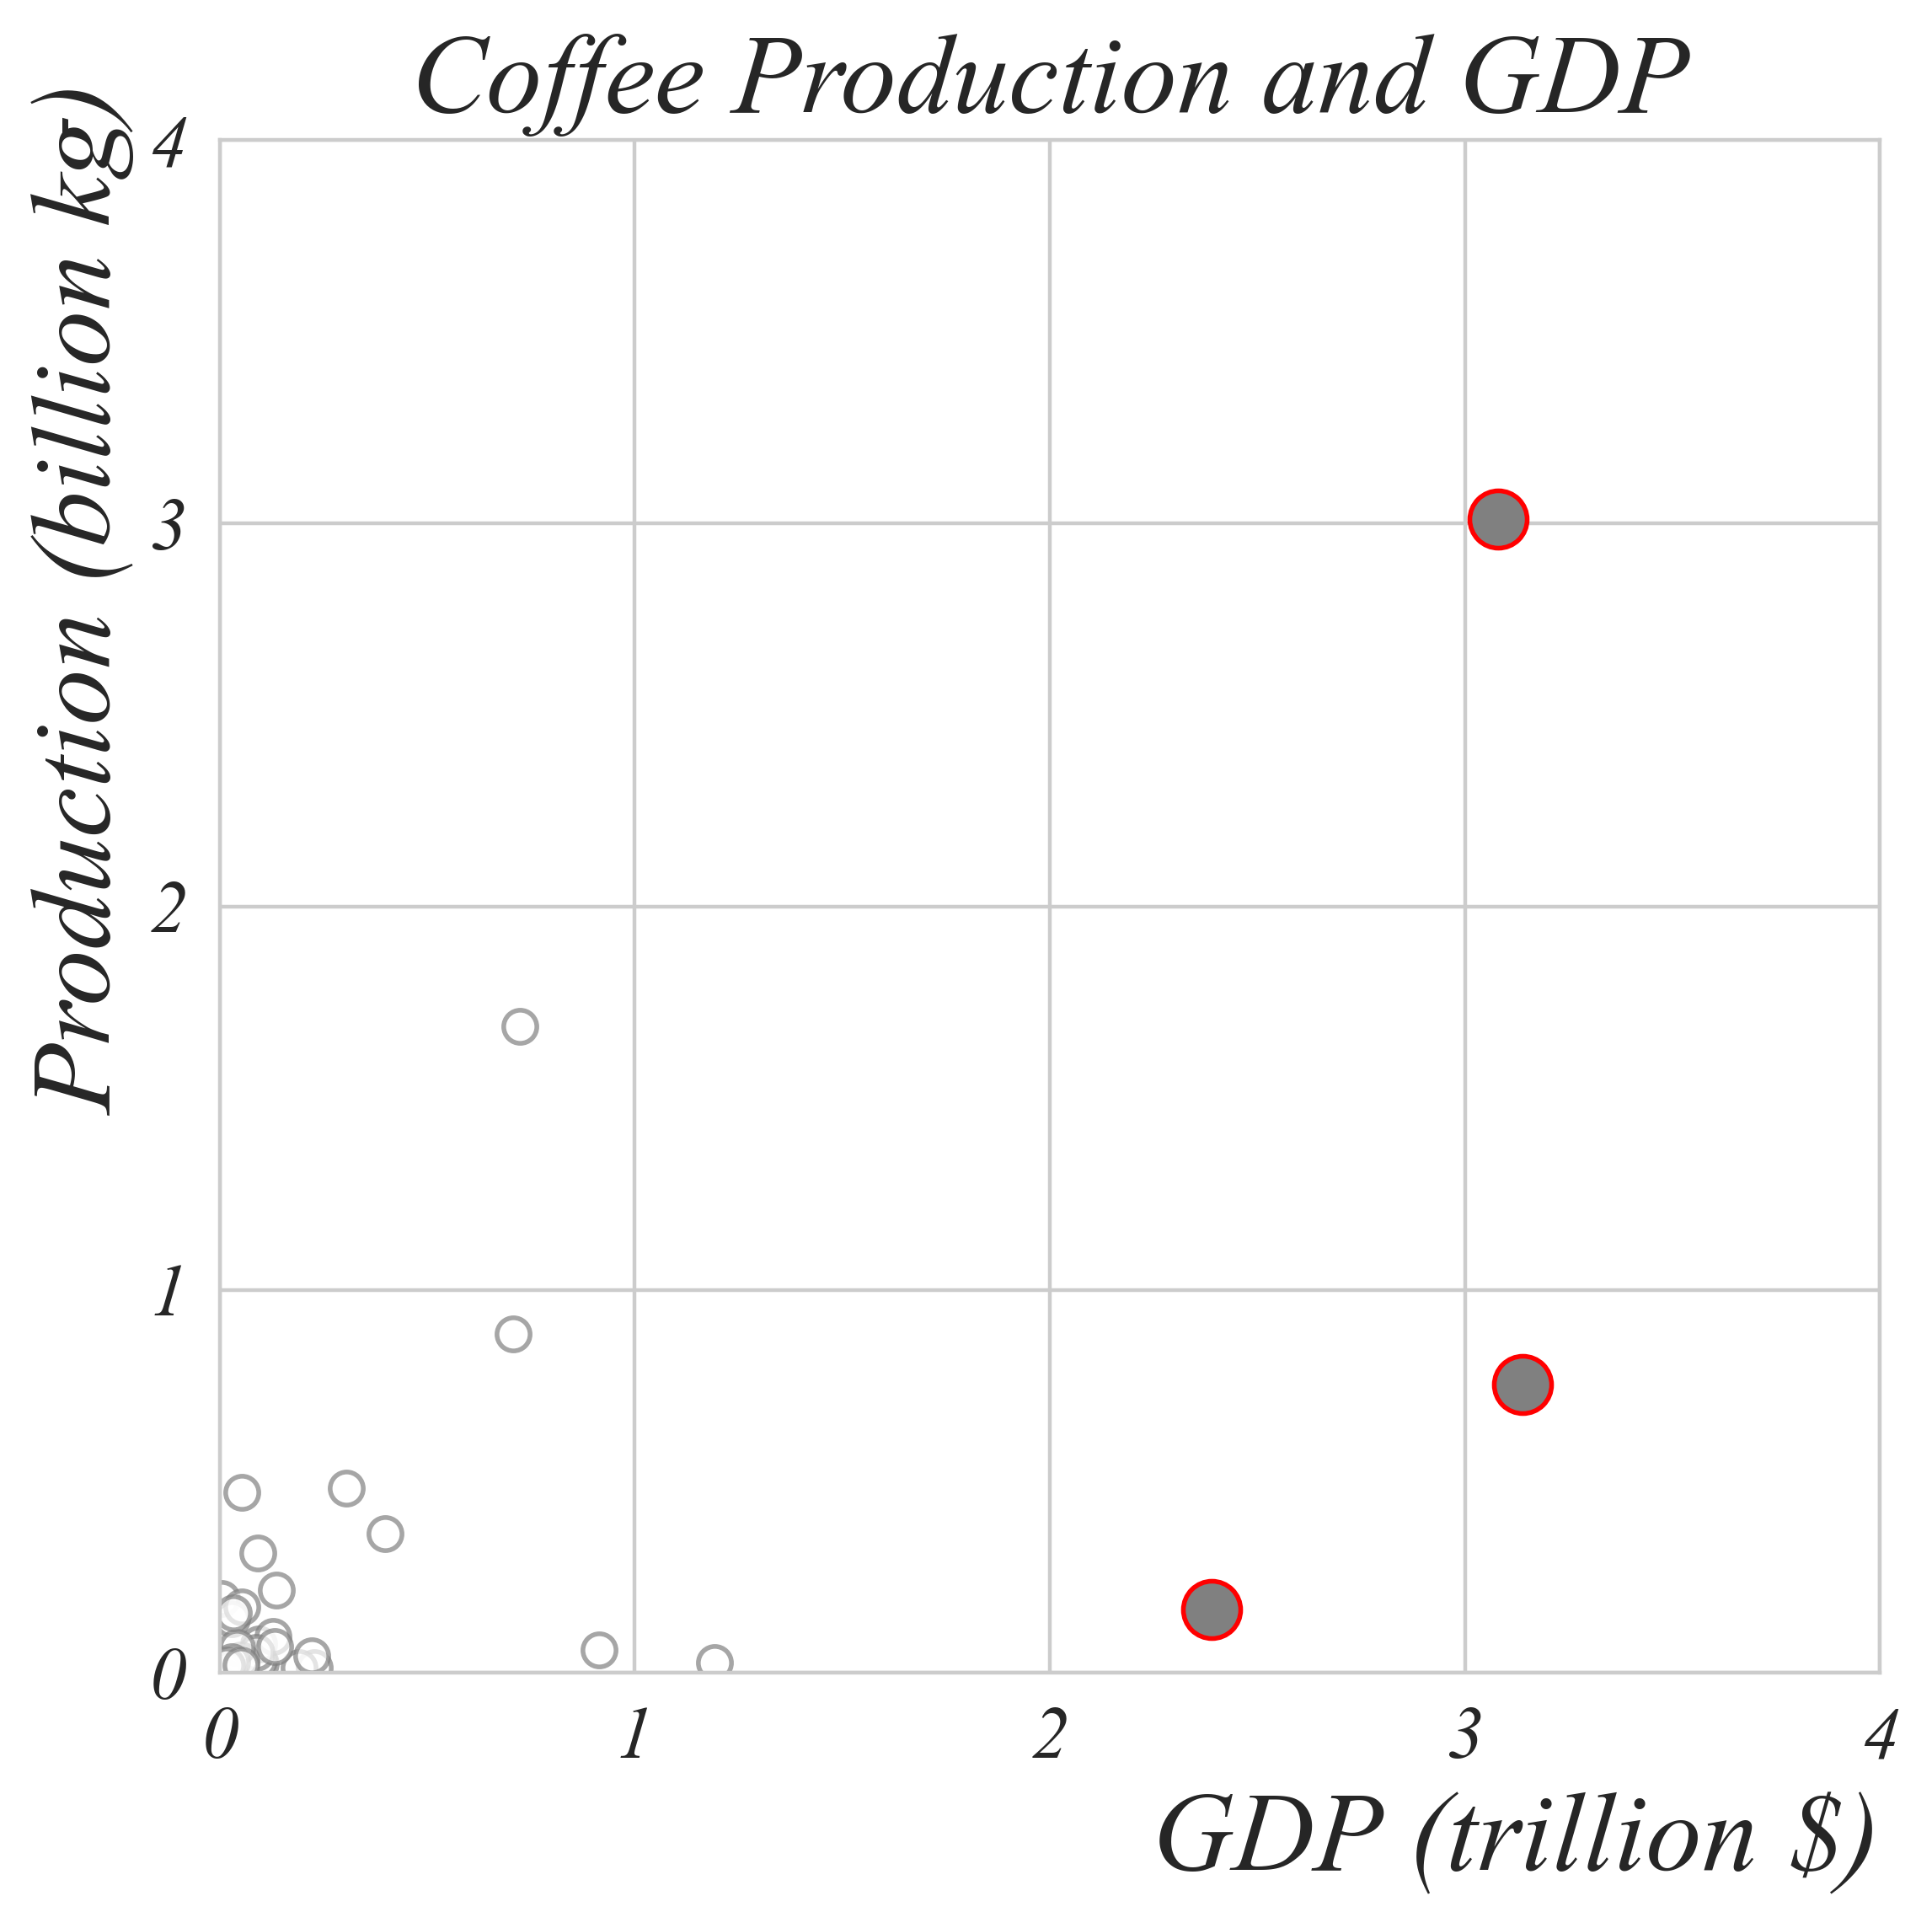

In [3]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]
#print(data.head())

plt.scatter(data['GDP'], data['Tonnes'], color='white', edgecolors='grey', alpha=0.7, s=50)

high_gdp = data[data.GDP > 2]
plt.scatter(high_gdp['GDP'], high_gdp['Tonnes'], color='grey', edgecolors='red', alpha=1, s=150)

plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks([0,1,2,3,4])
plt.xlim(0,4)
plt.ylabel('Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.05, .7)
plt.yticks([0,1,2,3,4])
plt.ylim(0,4)
plt.title('Coffee Production and GDP')
plt.tight_layout()
plt.savefig('Part_2_1/i/4.png')

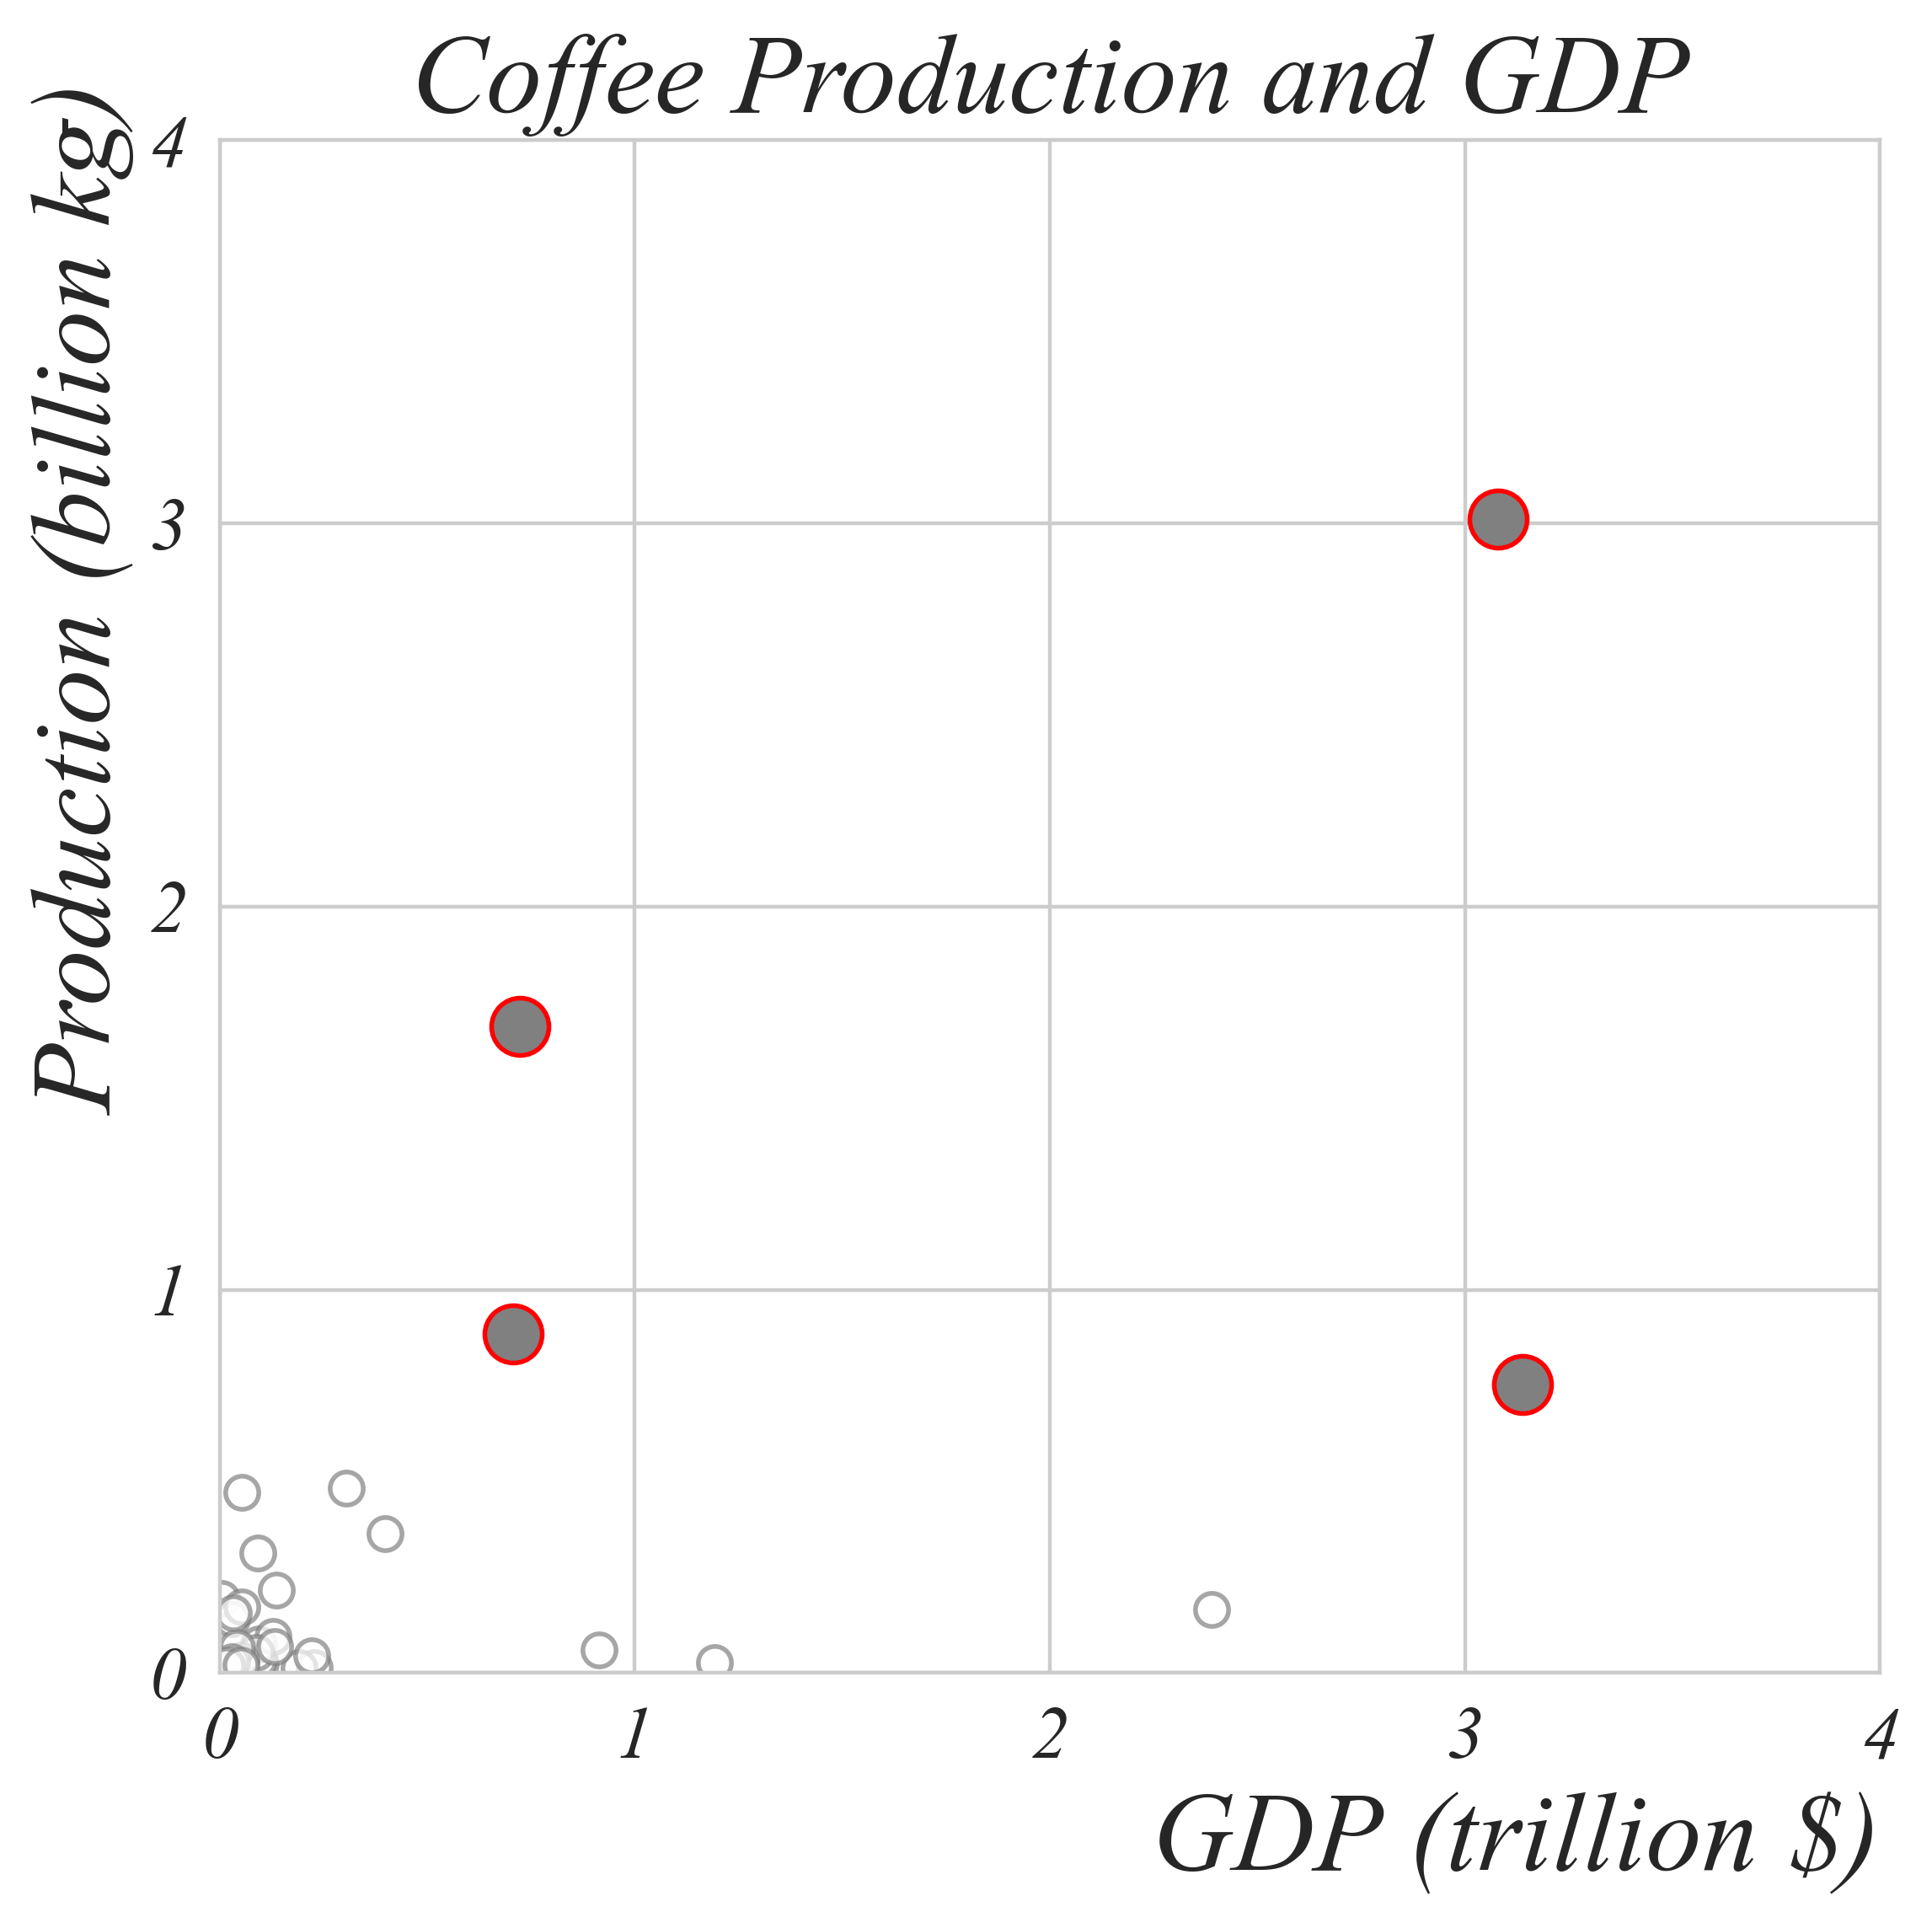

In [5]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]

plt.scatter(data['GDP'], data['Tonnes'], color='white', edgecolors='grey', alpha=0.7, s=50)

high_production = data[data.Tonnes > 0.5]
plt.scatter(high_production['GDP'], high_production['Tonnes'], color='grey', edgecolors='red', alpha=1, s=150)

plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks([0,1,2,3,4])
plt.xlim(0,4)
plt.ylabel('Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.05, .7)
plt.yticks([0,1,2,3,4])
plt.ylim(0,4)
plt.title('Coffee Production and GDP')
plt.tight_layout()
plt.savefig('Part_2_1/i/5.png')

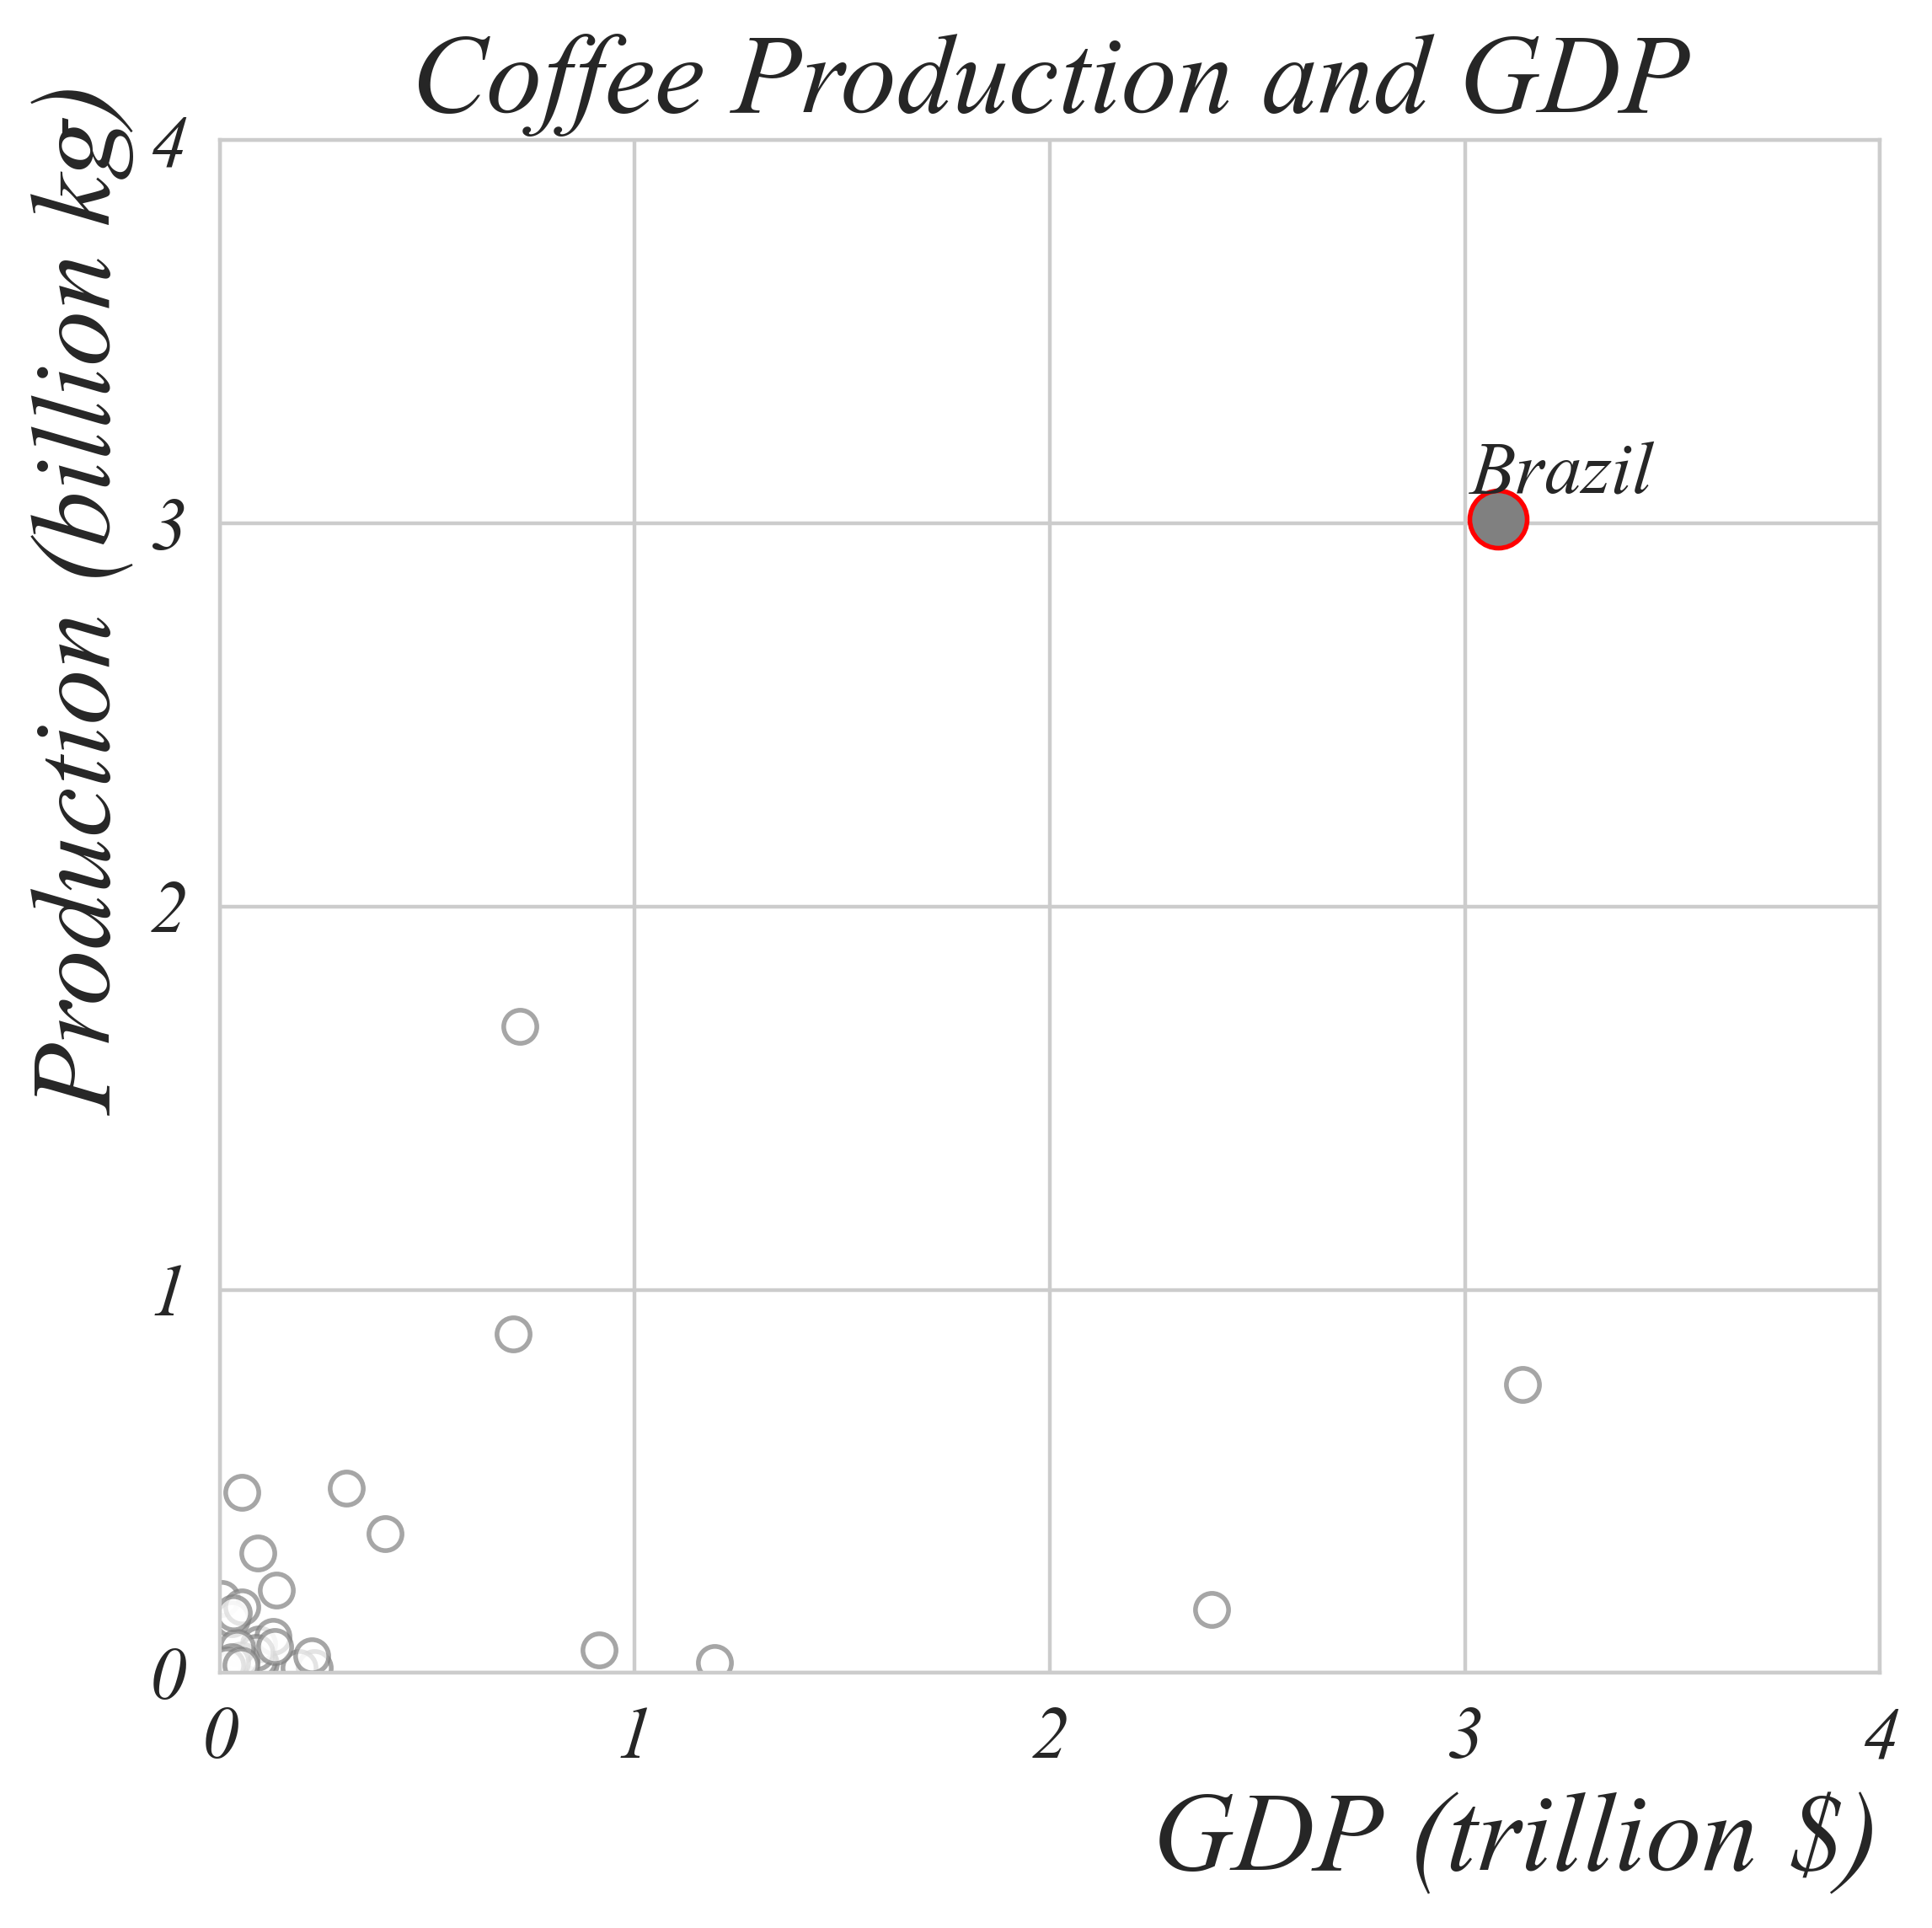

In [6]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]

plt.scatter(data['GDP'], data['Tonnes'], color='white', edgecolors='grey', alpha=0.7, s=50)

brazil = data[data.Tonnes == data.Tonnes.max()]
plt.scatter(brazil['GDP'], brazil['Tonnes'], color='grey', edgecolors='red', alpha=1, s=150)
plt.annotate('Brazil',(brazil.Tonnes.values[0], brazil.GDP.values[0]))

plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks([0,1,2,3,4])
plt.xlim(0,4)
plt.ylabel('Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.05, .7)
plt.yticks([0,1,2,3,4])
plt.ylim(0,4)
plt.title('Coffee Production and GDP')
plt.tight_layout()
plt.savefig('Part_2_1/i/6.png')

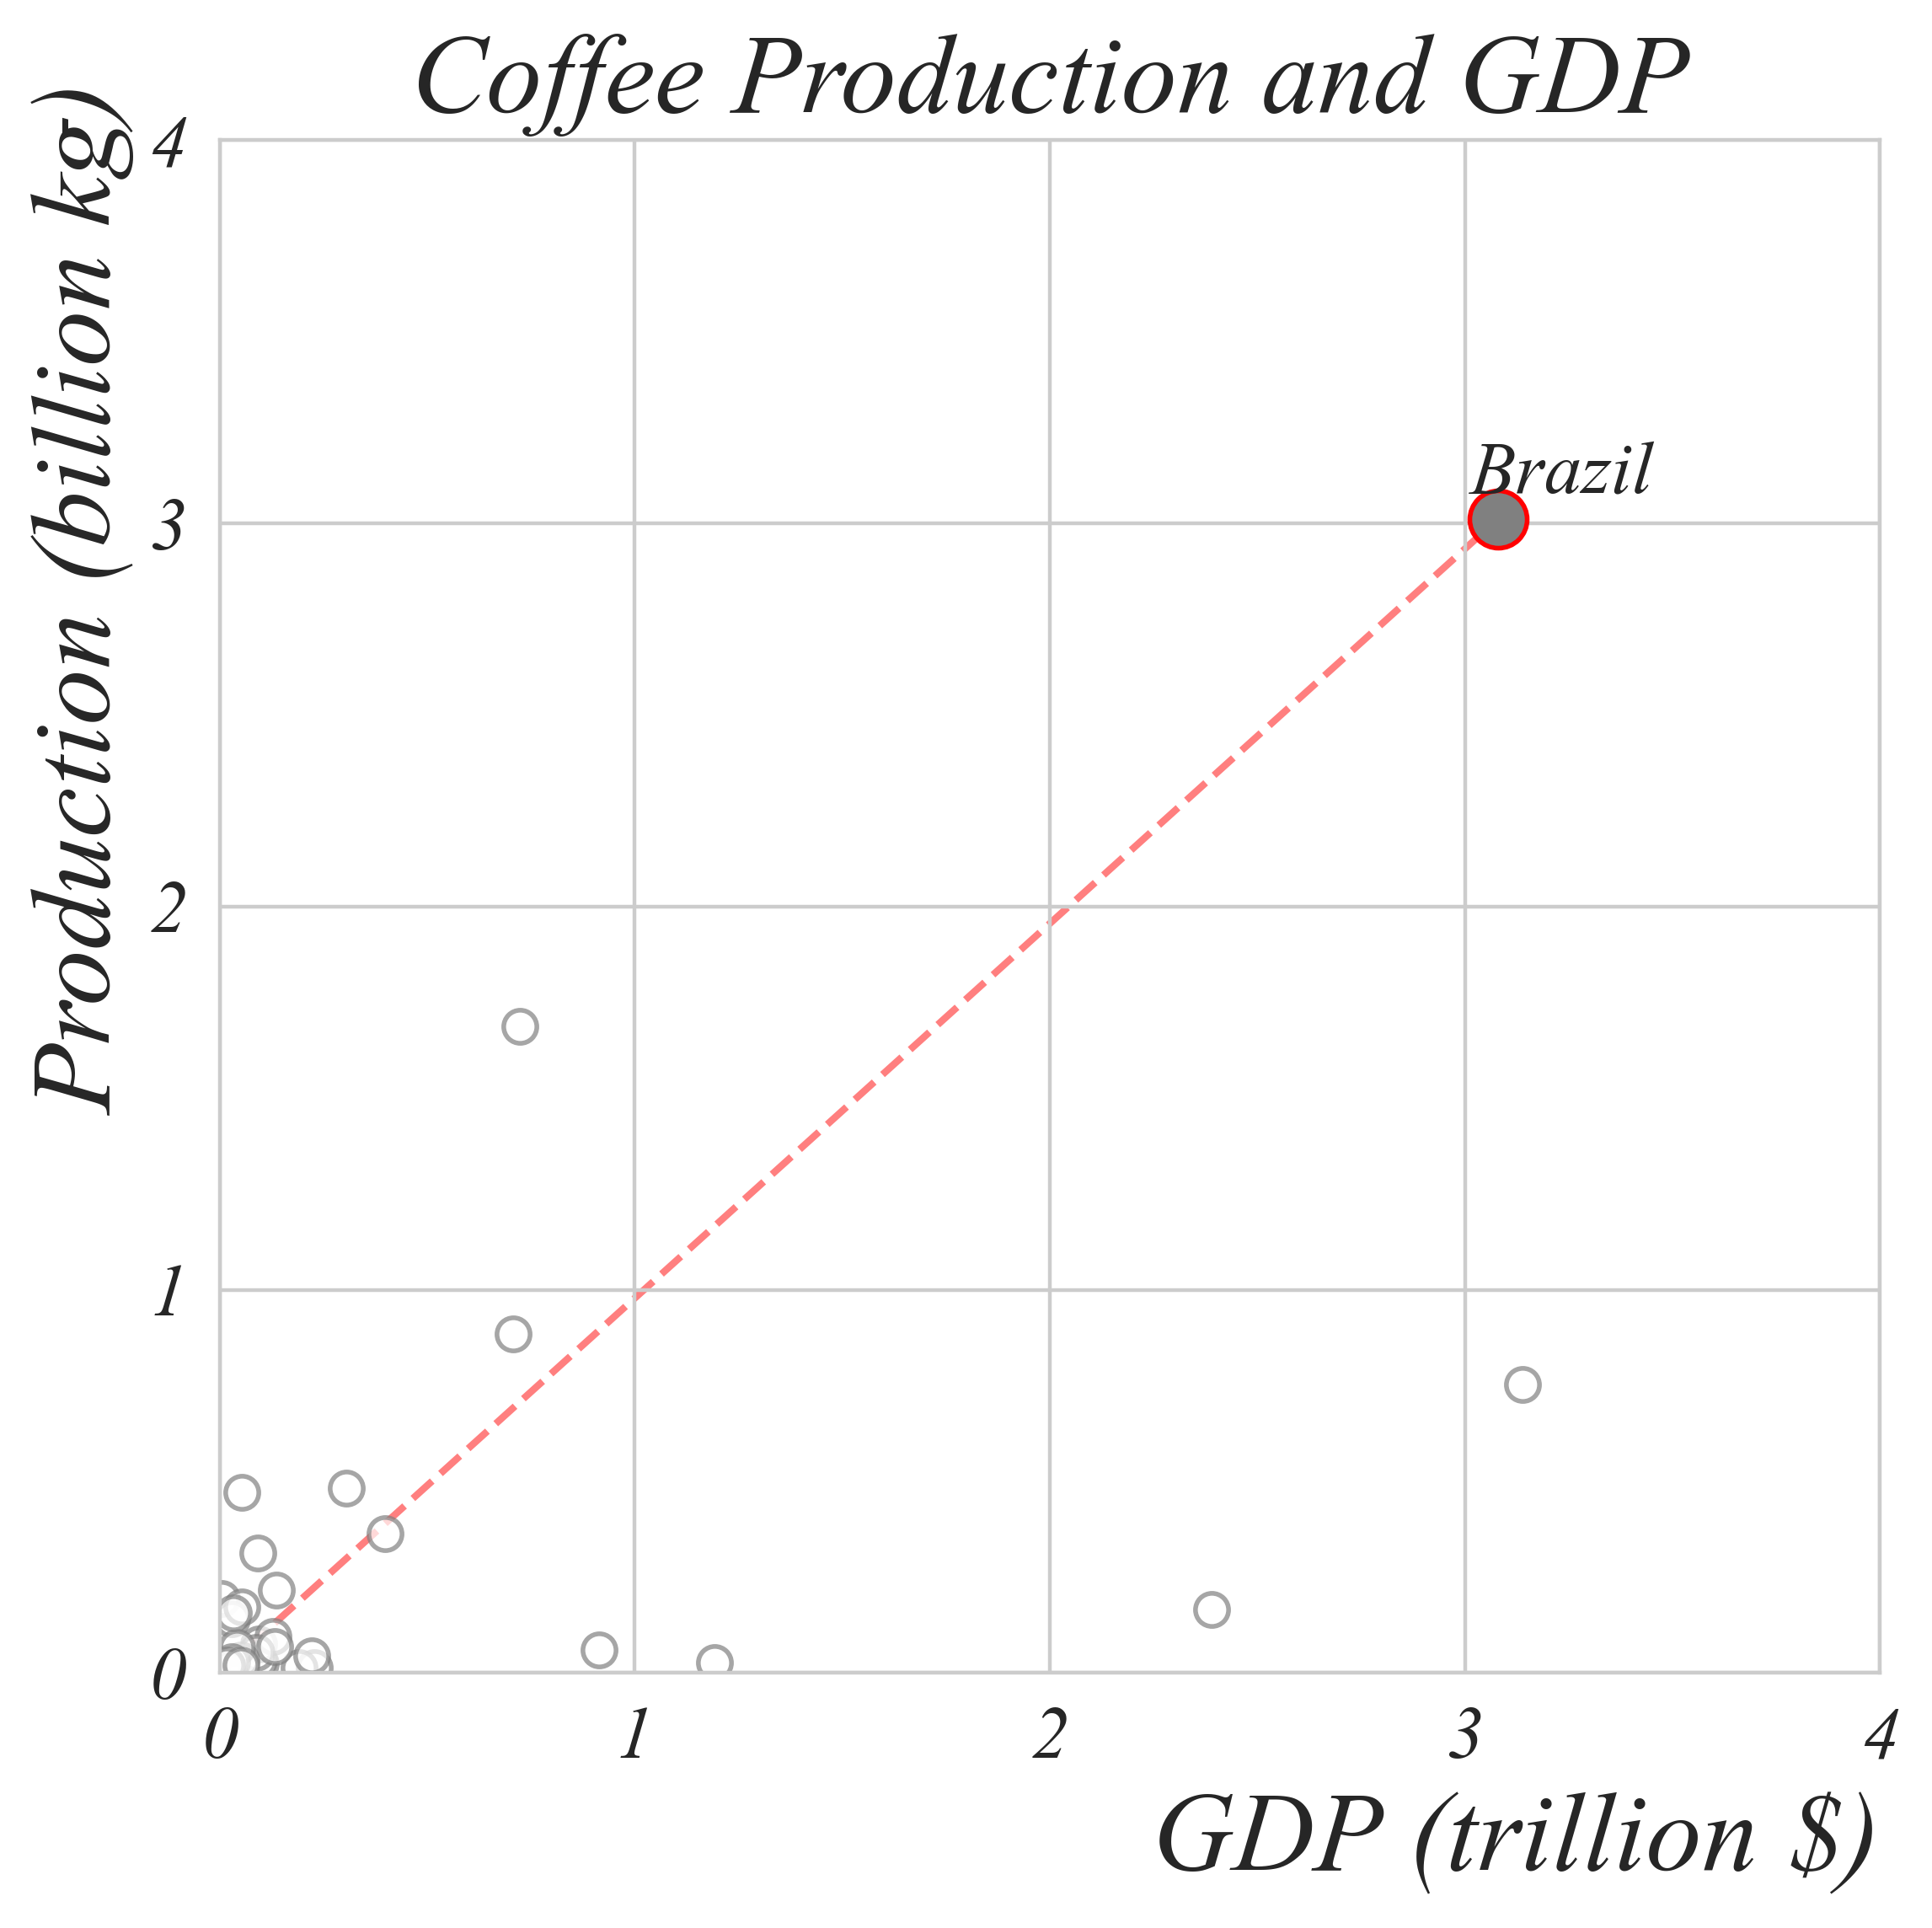

In [7]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]

plt.scatter(data['GDP'], data['Tonnes'], color='white', edgecolors='grey', alpha=0.7, s=50)

brazil = data[data.Tonnes == data.Tonnes.max()]
plt.scatter(brazil['GDP'], brazil['Tonnes'], color='grey', edgecolors='red', alpha=1, s=150)
plt.plot([0,brazil.GDP.values[0]],[0,brazil.Tonnes.values[0]], linestyle='--', color='red', zorder=-1, alpha=0.5)
plt.annotate('Brazil',(brazil.Tonnes.values[0], brazil.GDP.values[0]))

plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks([0,1,2,3,4])
plt.xlim(0,4)
plt.ylabel('Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.05, .7)
plt.yticks([0,1,2,3,4])
plt.ylim(0,4)
plt.title('Coffee Production and GDP')
plt.tight_layout()
plt.savefig('Part_2_1/i/7.png')

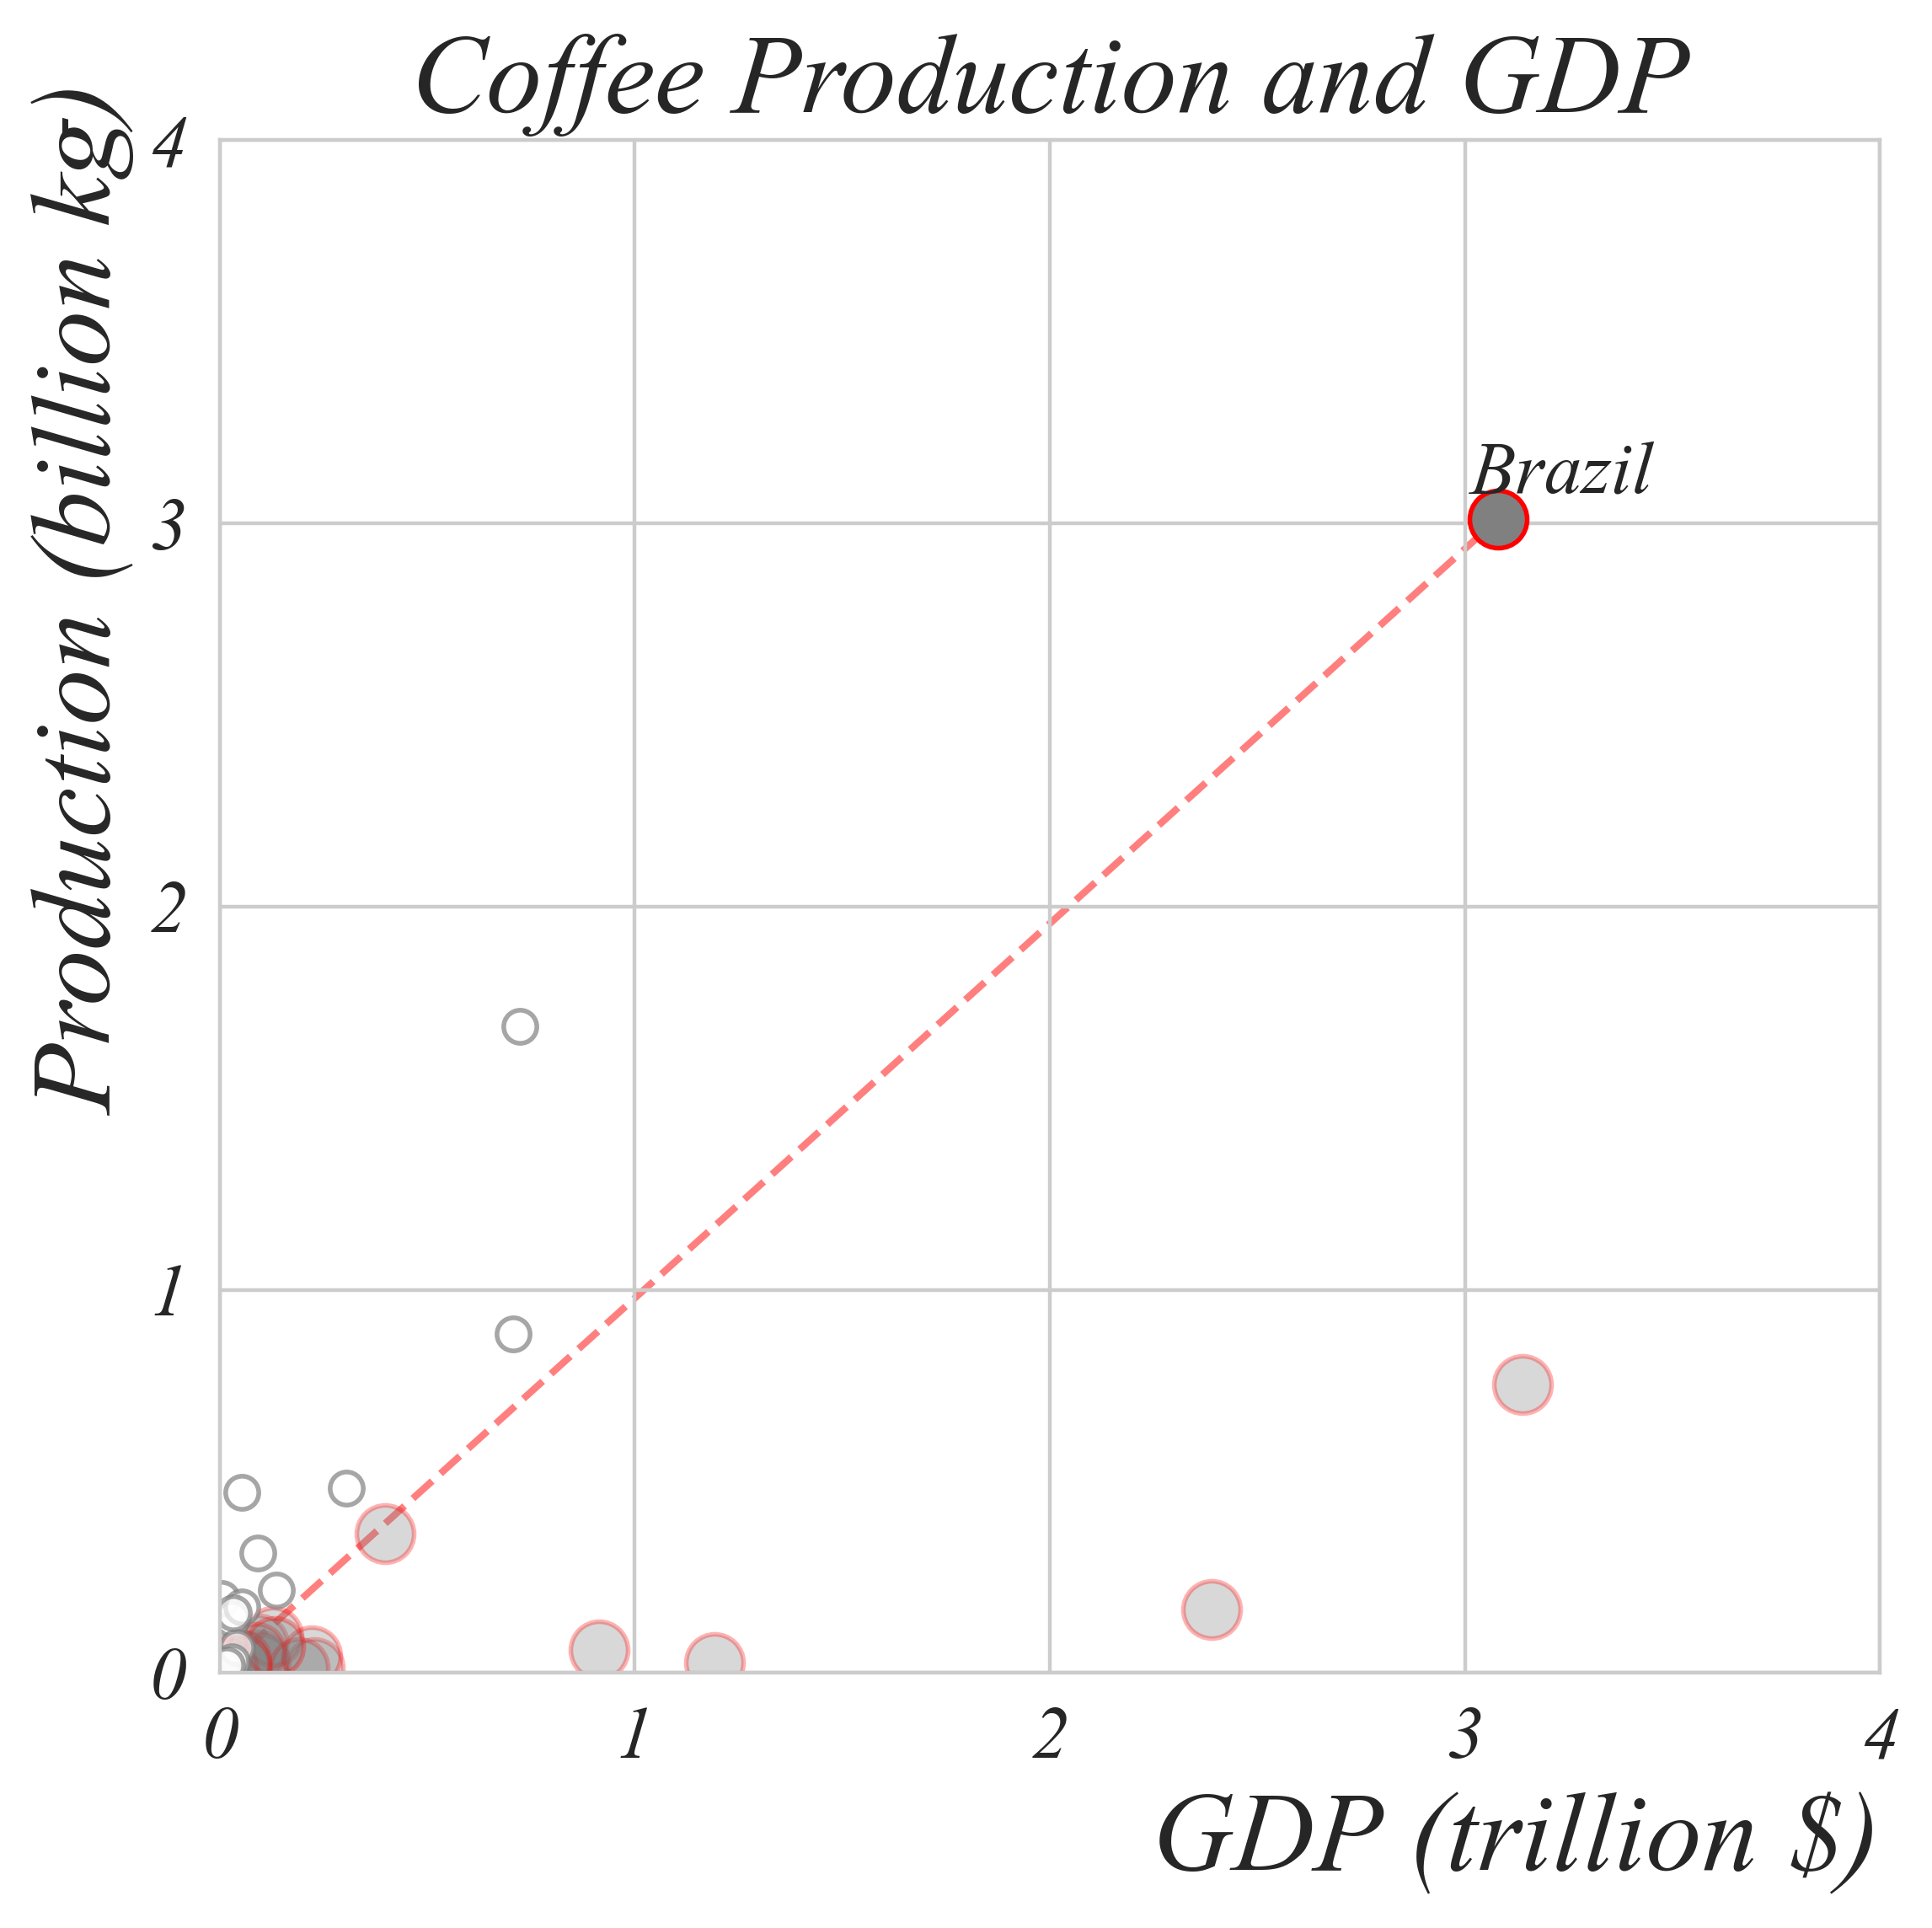

In [8]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]

brazil = data[data.Tonnes == data.Tonnes.max()]
brazil_gdp = brazil.GDP.values[0]
brazil_tonnes = brazil.Tonnes.values[0]
plt.scatter(brazil['GDP'], brazil['Tonnes'], color='grey', edgecolors='red', alpha=1, s=150)
plt.plot([0,brazil_gdp],[0,brazil_tonnes], linestyle='--', color='red', zorder=-1, alpha=0.5)

data['brazil_ratio'] = data['GDP']/data['Tonnes']
greater = data[data['brazil_ratio'] > brazil_gdp/brazil_tonnes]
lower = data[data['brazil_ratio'] < brazil_gdp/brazil_tonnes]

plt.scatter(greater['GDP'], greater['Tonnes'], color='grey', edgecolors='red', alpha=0.3, s=150)
plt.scatter(lower['GDP'], lower['Tonnes'], color='white', edgecolors='grey', alpha=0.7, s=50)

plt.annotate('Brazil',(brazil.Tonnes.values[0], brazil.GDP.values[0]))

plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks([0,1,2,3,4])
plt.xlim(0,4)
plt.ylabel('Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.05, .7)
plt.yticks([0,1,2,3,4])
plt.ylim(0,4)
plt.title('Coffee Production and GDP')
plt.tight_layout()
plt.savefig('Part_2_1/i/8.png')

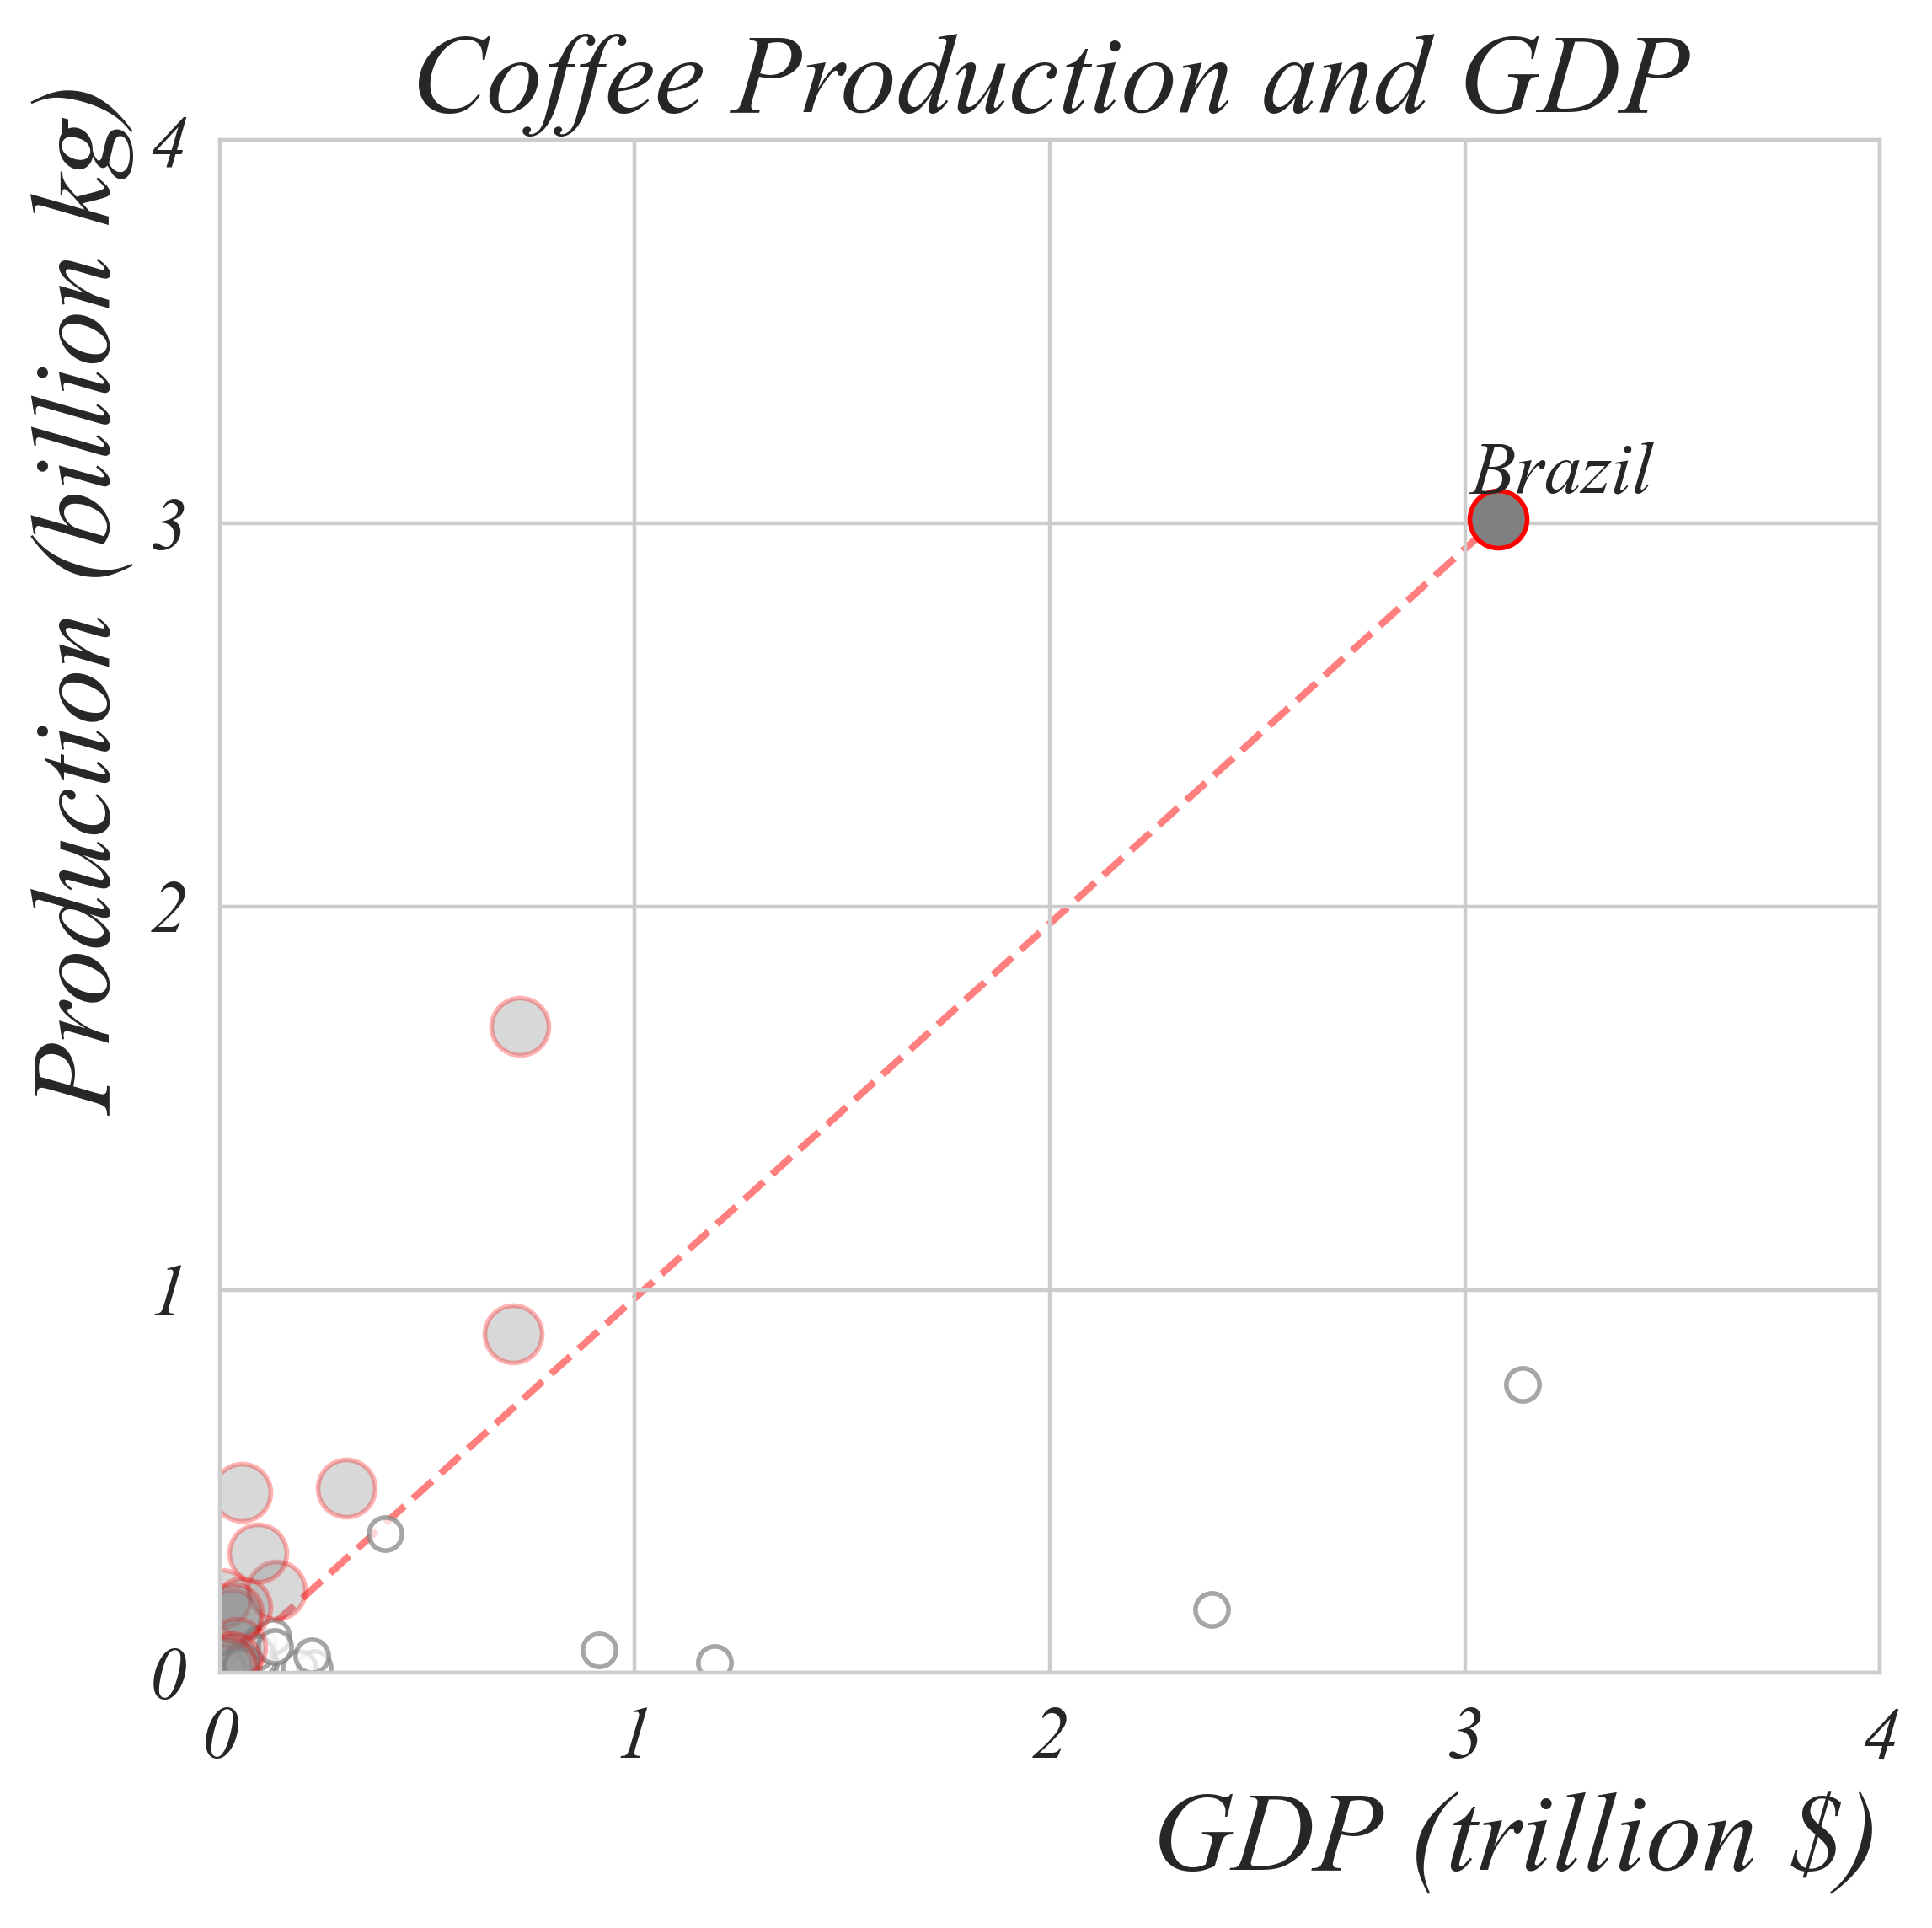

In [10]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]

brazil = data[data.Tonnes == data.Tonnes.max()]
brazil_gdp = brazil.GDP.values[0]
brazil_tonnes = brazil.Tonnes.values[0]
plt.scatter(brazil['GDP'], brazil['Tonnes'], color='grey', edgecolors='red', alpha=1, s=150)
plt.plot([0,brazil_gdp],[0,brazil_tonnes], linestyle='--', color='red', zorder=-1, alpha=0.5)

data['brazil_ratio'] = data['GDP']/data['Tonnes']
greater = data[data['brazil_ratio'] > brazil_gdp/brazil_tonnes]
lower = data[data['brazil_ratio'] < brazil_gdp/brazil_tonnes]

plt.scatter(greater['GDP'], greater['Tonnes'], color='white', edgecolors='grey', alpha=0.7, s=50)
plt.scatter(lower['GDP'], lower['Tonnes'], color='grey', edgecolors='red', alpha=0.3, s=150)

plt.annotate('Brazil',(brazil.Tonnes.values[0], brazil.GDP.values[0]))

plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks([0,1,2,3,4])
plt.xlim(0,4)
plt.ylabel('Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.05, .7)
plt.yticks([0,1,2,3,4])
plt.ylim(0,4)
plt.title('Coffee Production and GDP')
plt.tight_layout()
plt.savefig('Part_2_1/i/9.png')

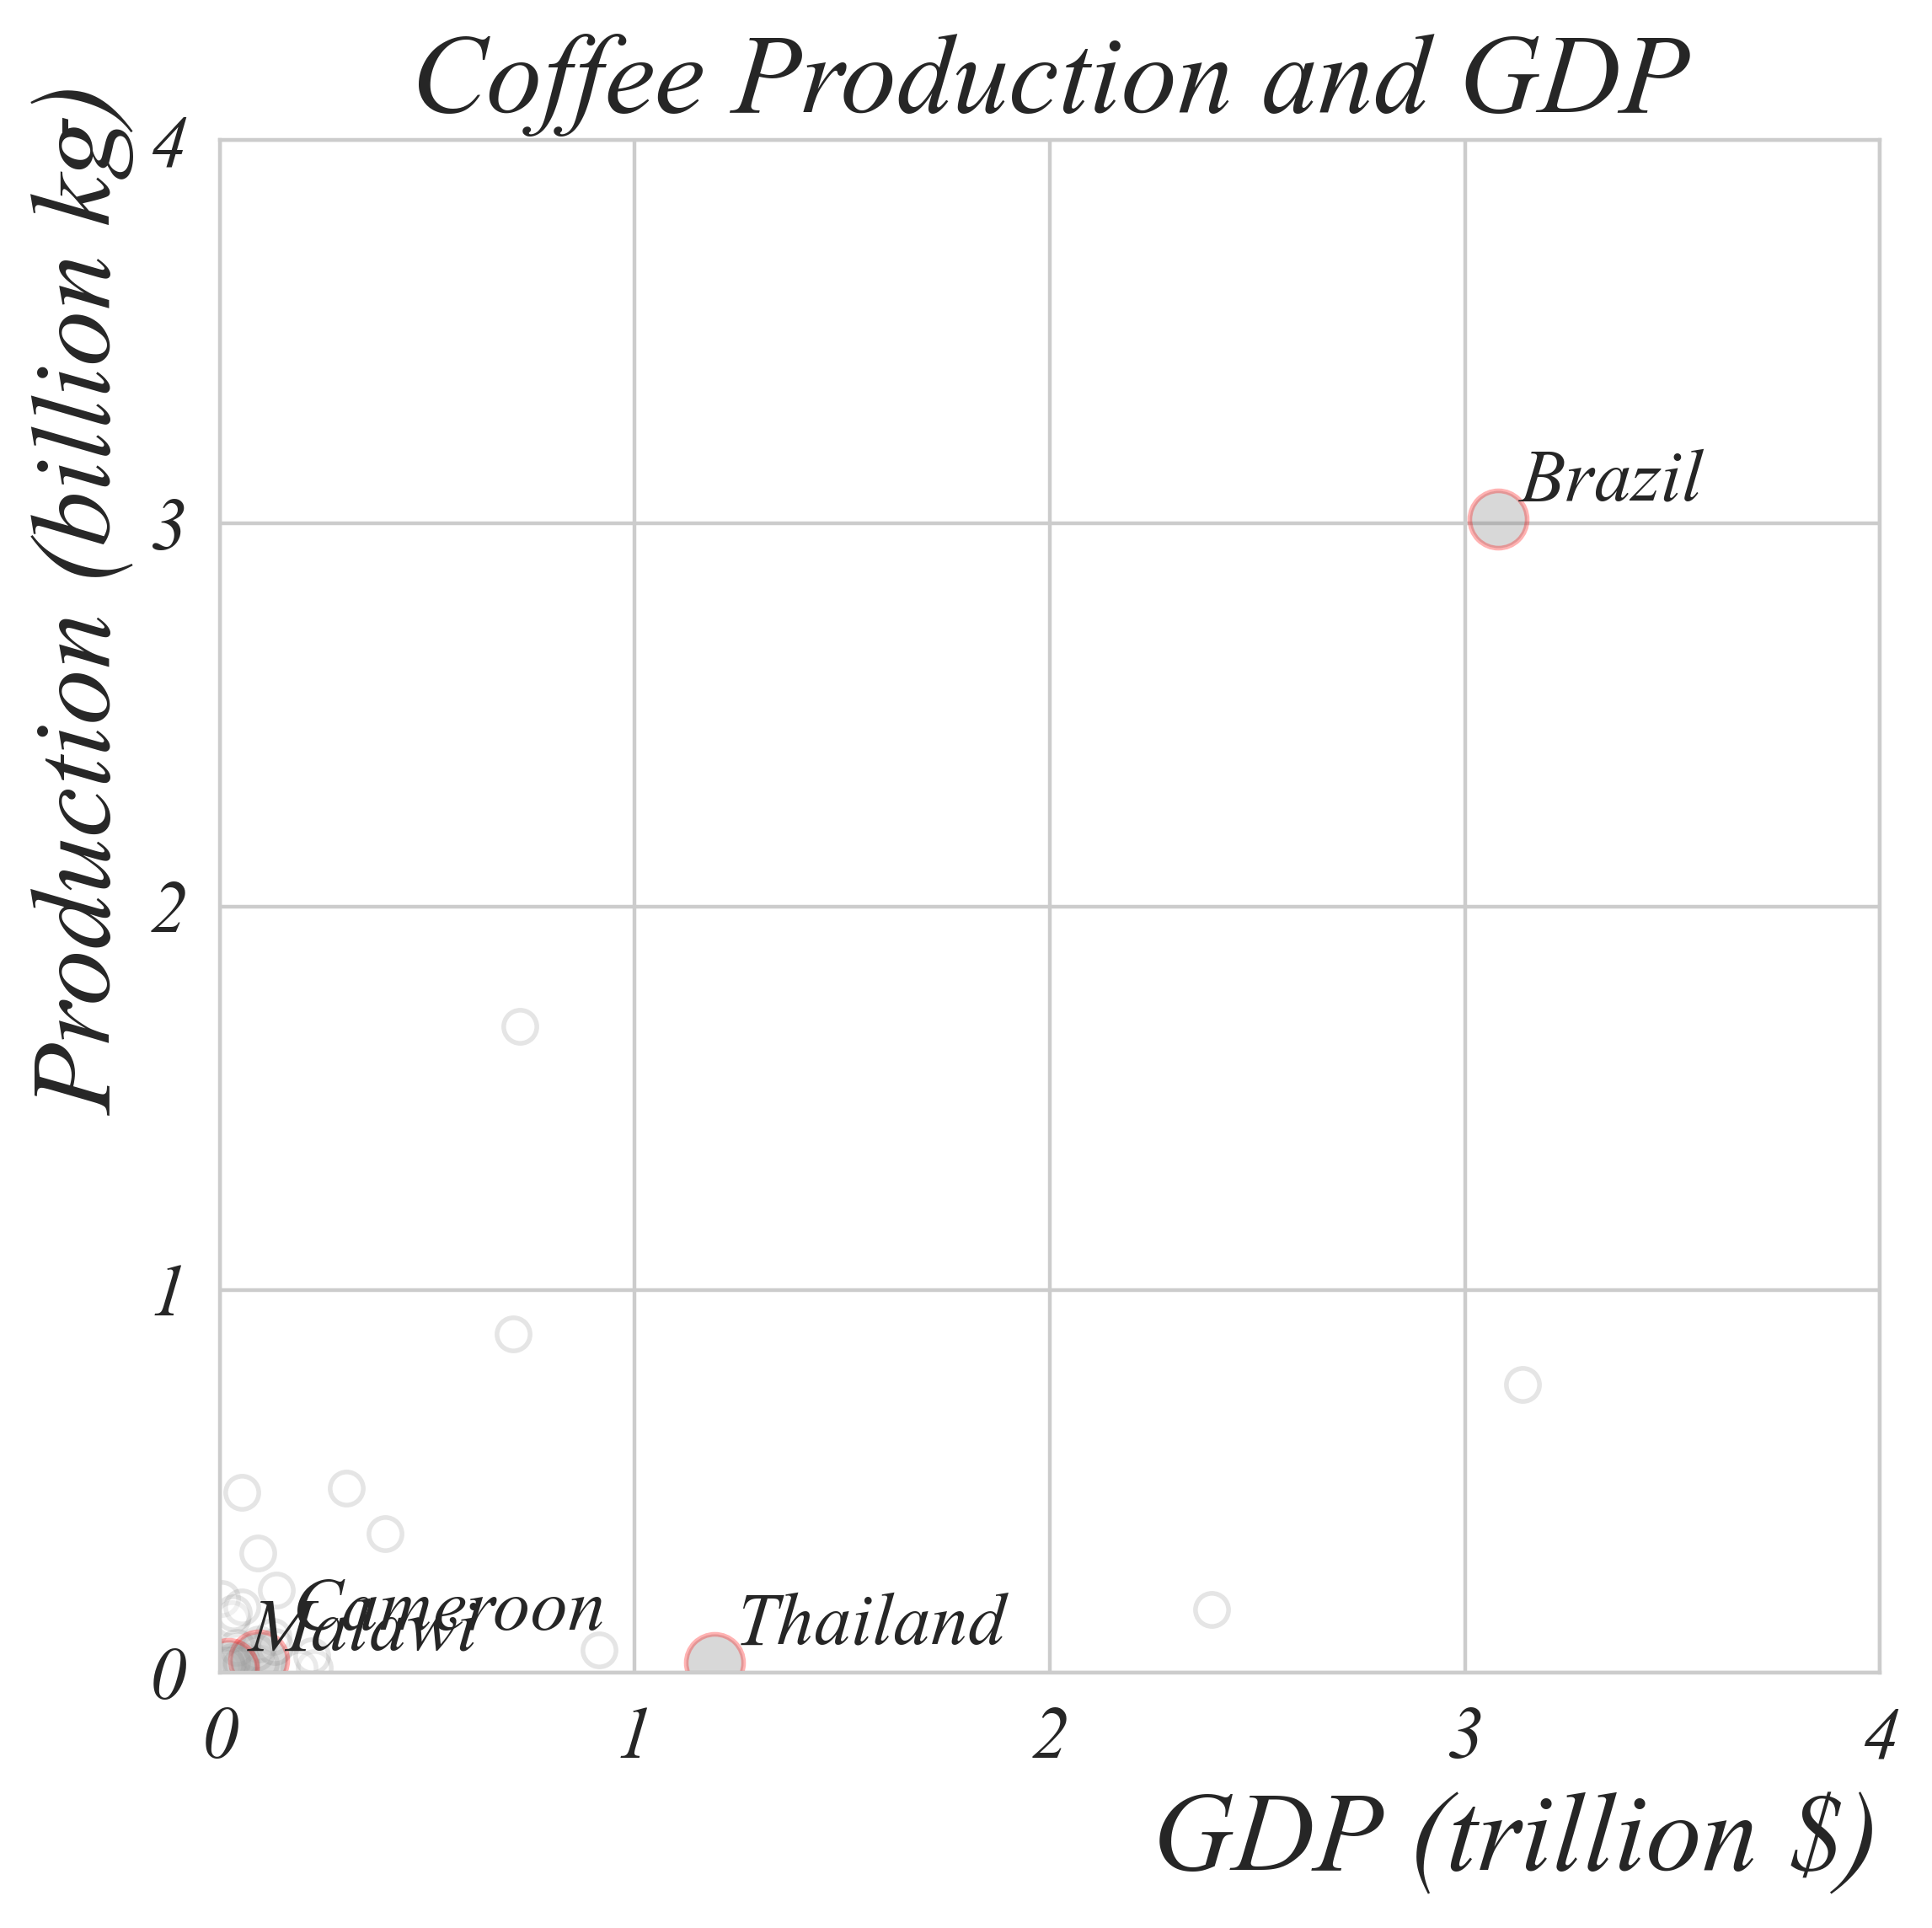

In [12]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

subset_list = ['BRA', 'THA', 'MWI', 'CMR']

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]
other_data = data[~data.Code.isin(subset_list)]

plt.scatter(other_data['GDP'], other_data['Tonnes'], color='white', edgecolors='grey', alpha=0.2, s=50)

subset = data[data.Code.isin(subset_list)]

plt.scatter(subset['GDP'], subset['Tonnes'], color='grey', edgecolors='red', alpha=0.3, s=150)

for index, row in subset.iterrows():
    row_gdp = row.GDP
    row_tonnes = row.Tonnes
    row_entity = row.Entity
    if row_entity != 'Cameroon':
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))
    else:
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.08, row_tonnes+0.08))

plt.xlabel('GDP (trillion $)', loc='right')
plt.xticks([0,1,2,3,4])
plt.xlim(0,4)
plt.ylabel('Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.05, .7)
plt.yticks([0,1,2,3,4])
plt.ylim(0,4)
plt.title('Coffee Production and GDP')
plt.tight_layout()
plt.savefig('Part_2_1/i/10.png')

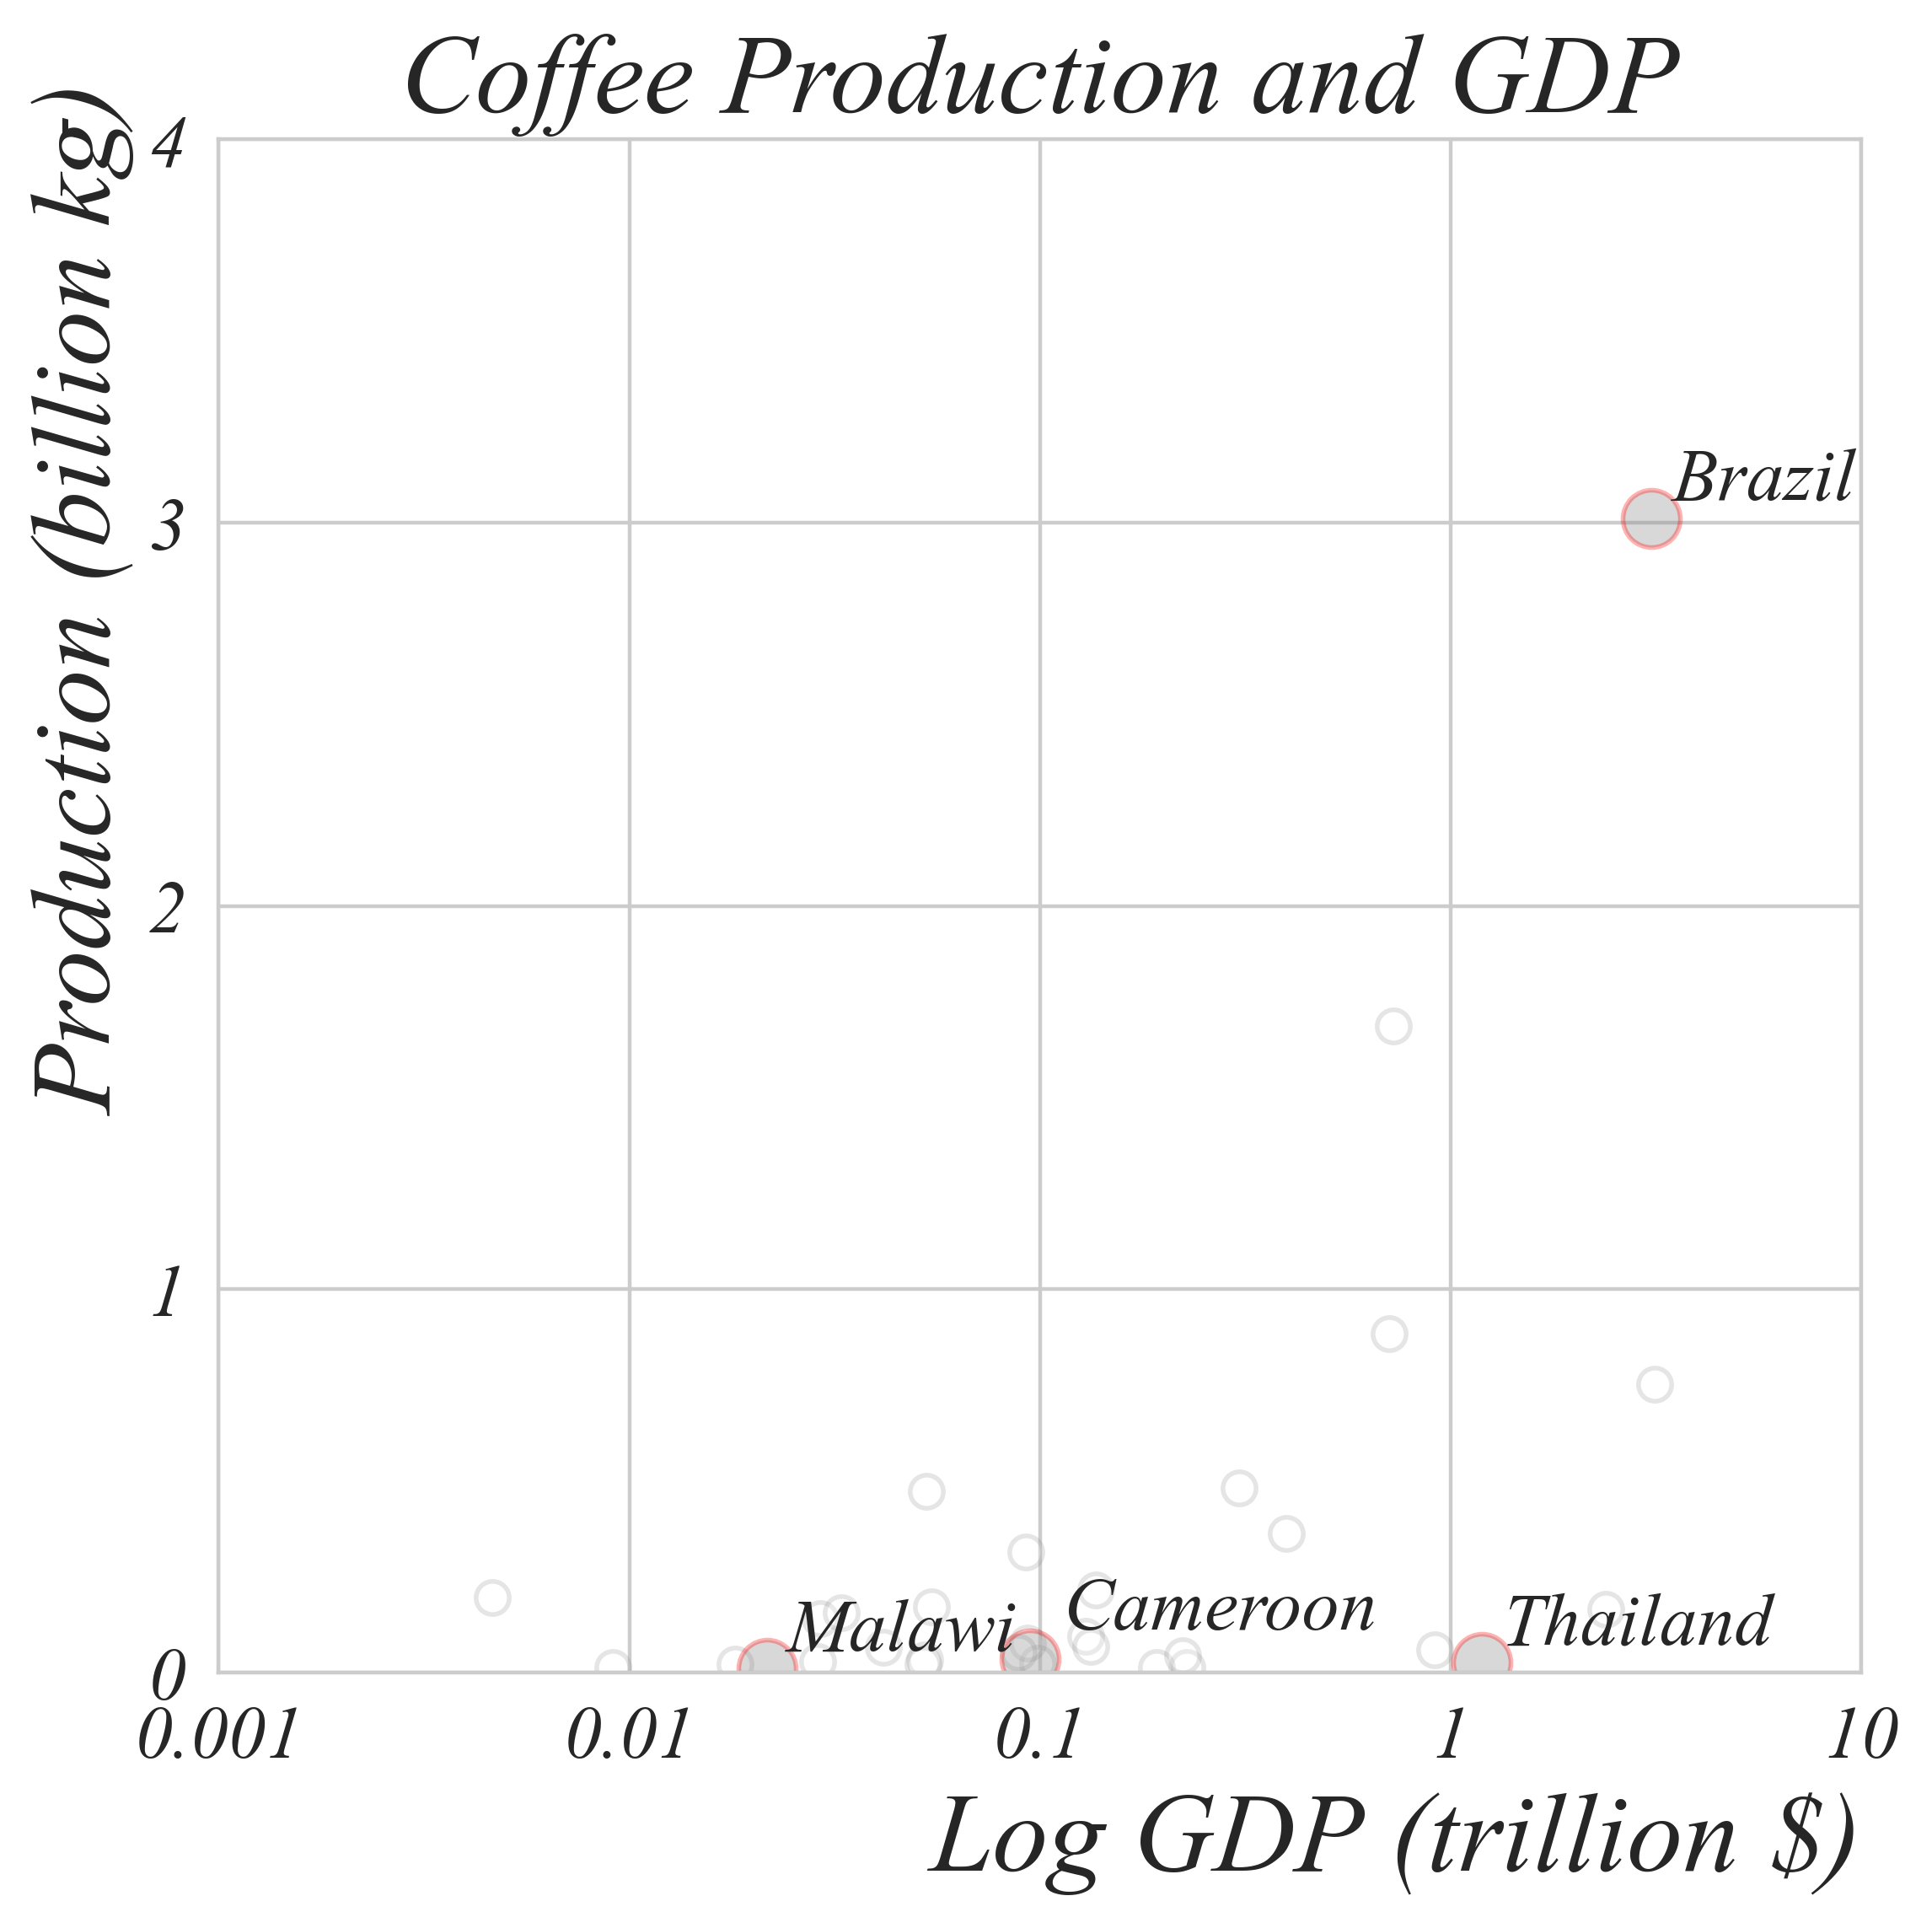

In [14]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

subset_list = ['BRA', 'THA', 'MWI', 'CMR']

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)

other_data = data[~data.Code.isin(subset_list)]

plt.scatter(other_data['log10_GDP'], other_data['Tonnes'], color='white', edgecolors='grey', alpha=0.2, s=50)

subset = data[data.Code.isin(subset_list)]

plt.scatter(subset['log10_GDP'], subset['Tonnes'], color='grey', edgecolors='red', alpha=0.3, s=150)

for index, row in subset.iterrows():
    row_gdp = row.log10_GDP
    row_tonnes = row.Tonnes
    row_entity = row.Entity
    if row_entity != 'Cameroon':
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))
    else:
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.08, row_tonnes+0.08))

plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)
#plt.xlim(0,4)
plt.ylabel('Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.05, .7)
plt.yticks([0,1,2,3,4])
plt.ylim(0,4)
plt.title('Coffee Production and GDP')
plt.tight_layout()
plt.savefig('Part_2_1/i/11.png')

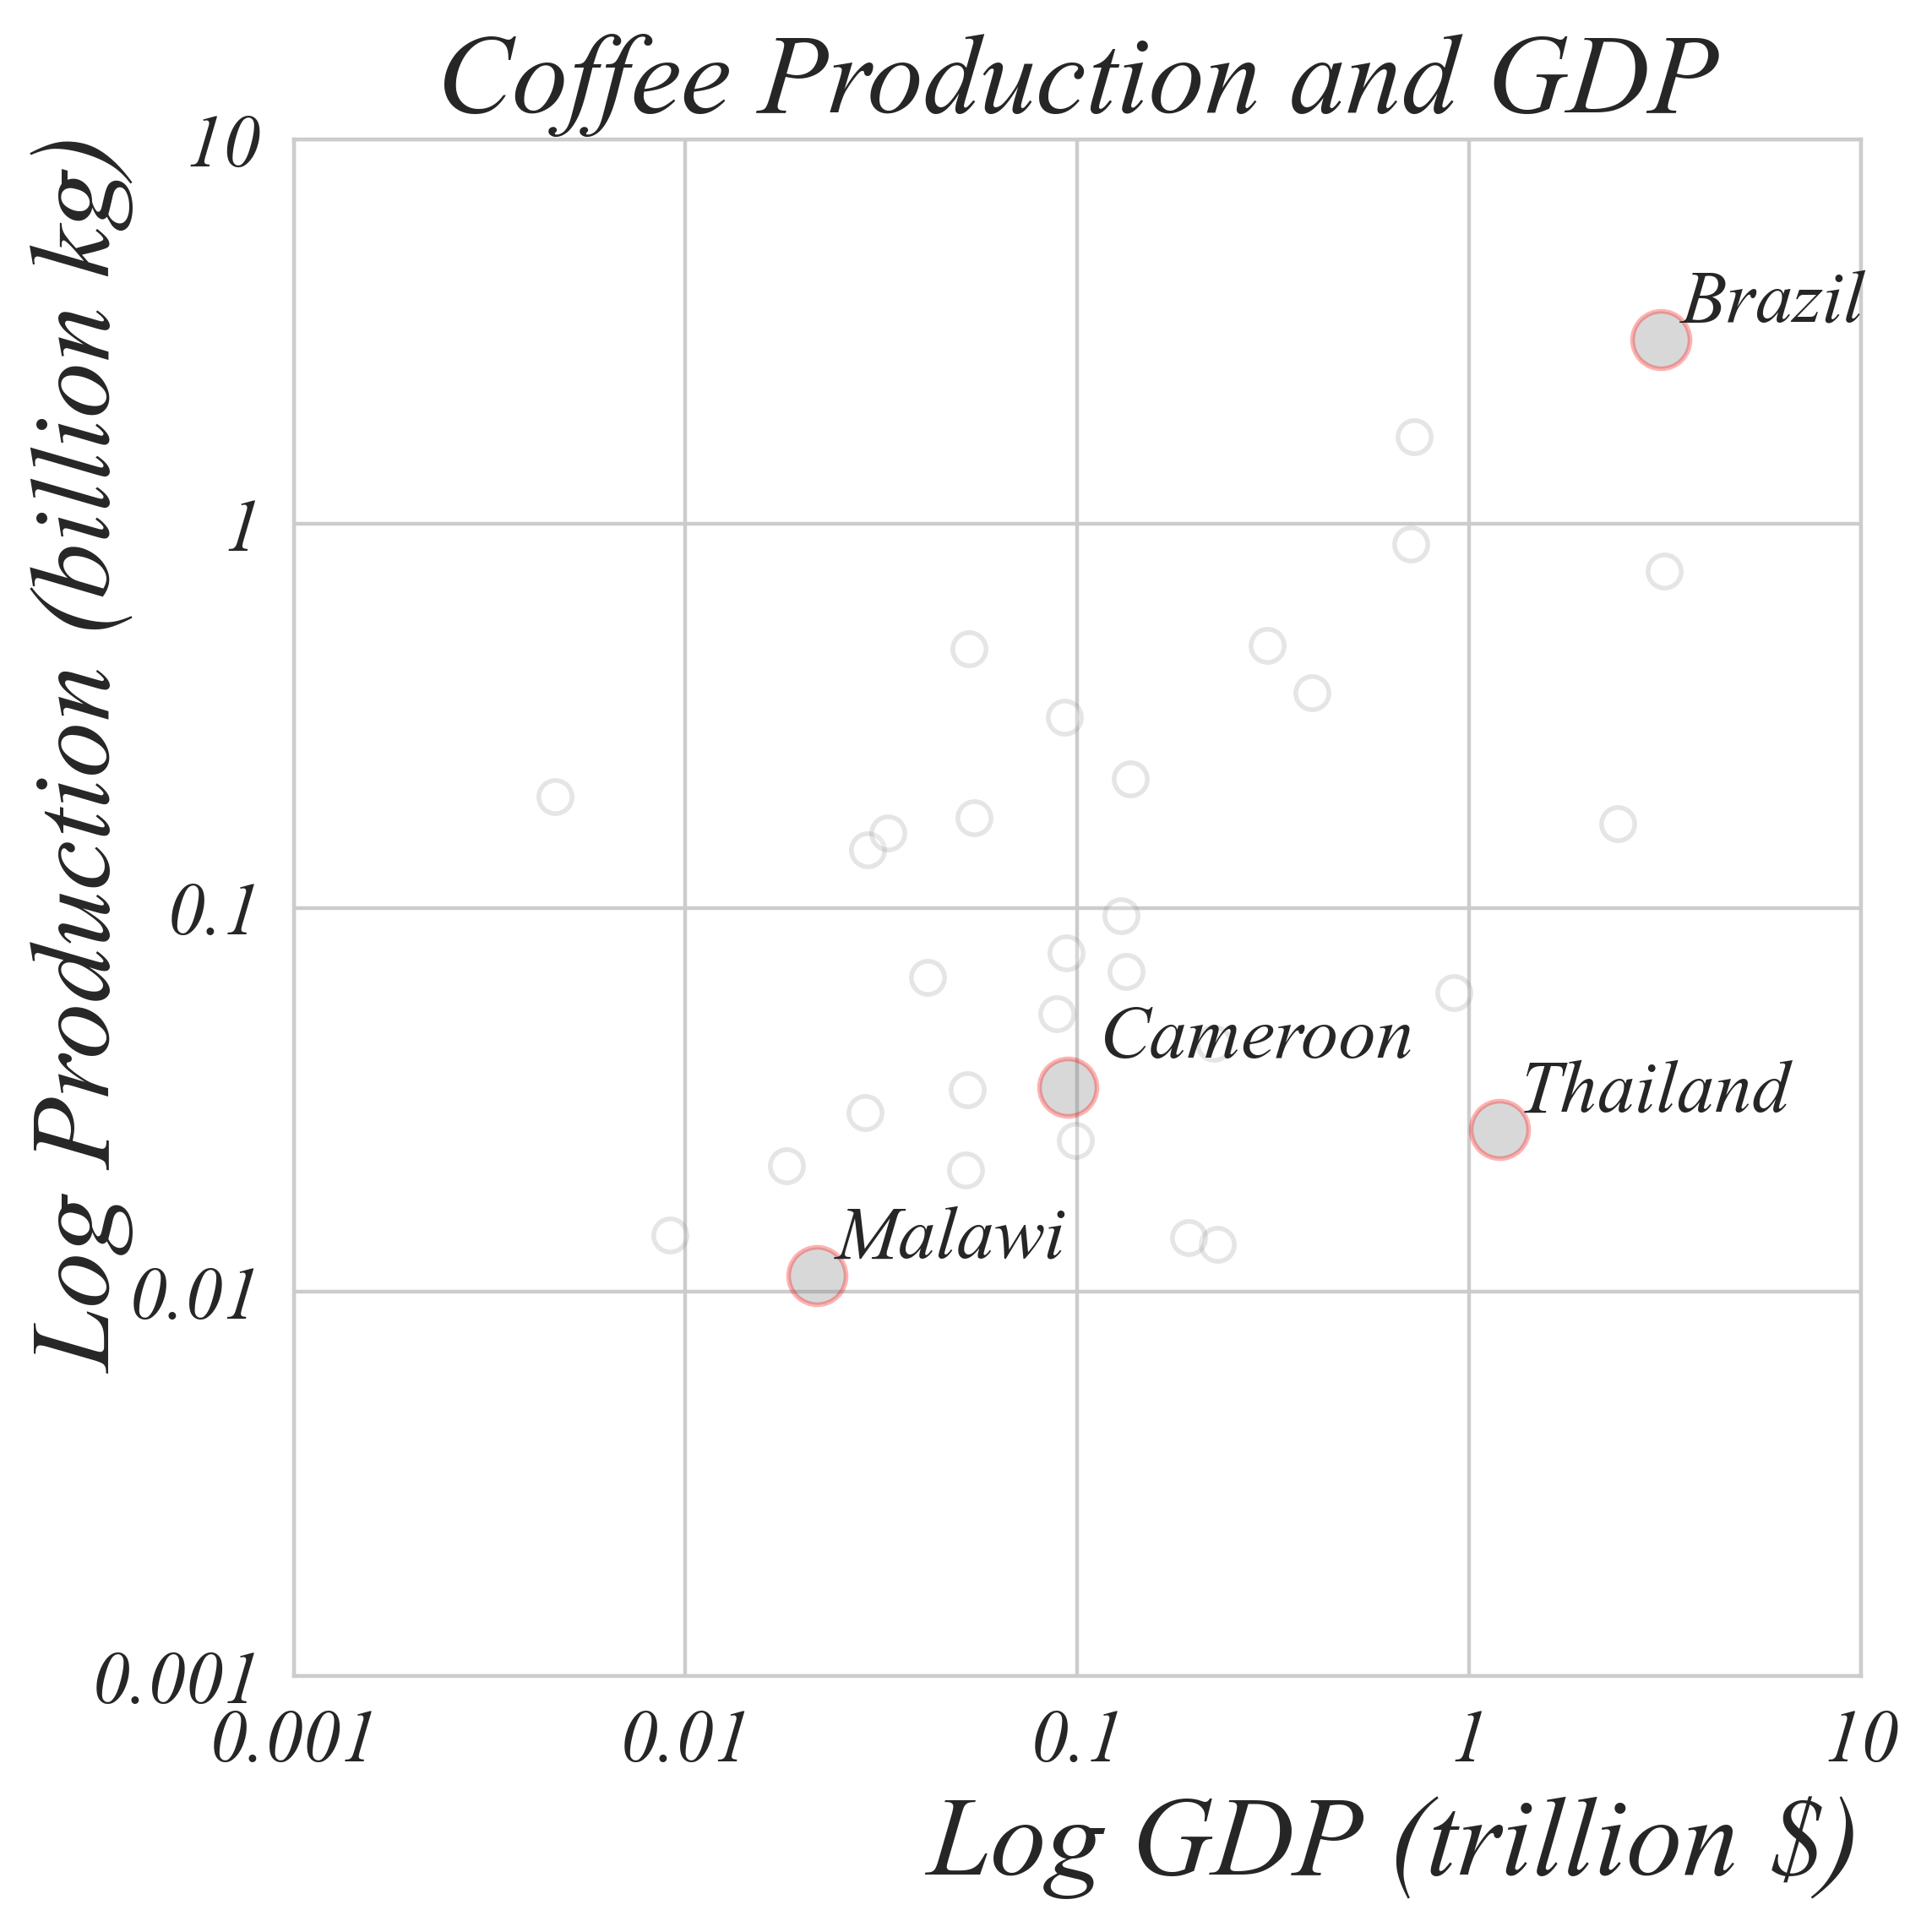

In [20]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

subset_list = ['BRA', 'THA', 'MWI', 'CMR']

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['Tonnes'].replace(0, np.nan) + 1e-10)

other_data = data[~data.Code.isin(subset_list)]

plt.scatter(other_data['log10_GDP'], other_data['log10_Tonnes'], color='white', edgecolors='grey', alpha=0.2, s=50)

subset = data[data.Code.isin(subset_list)]

plt.scatter(subset['log10_GDP'], subset['log10_Tonnes'], color='grey', edgecolors='red', alpha=0.3, s=150)

for index, row in subset.iterrows():
    row_gdp = row.log10_GDP
    row_tonnes = row.log10_Tonnes
    row_entity = row.Entity
    if row_entity != 'Cameroon':
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))
    else:
        plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.08, row_tonnes+0.08))

plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)
plt.ylabel('Log Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.1, .6)
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.title('Coffee Production and GDP')
plt.tight_layout()
plt.savefig('Part_2_1/i/12.png')

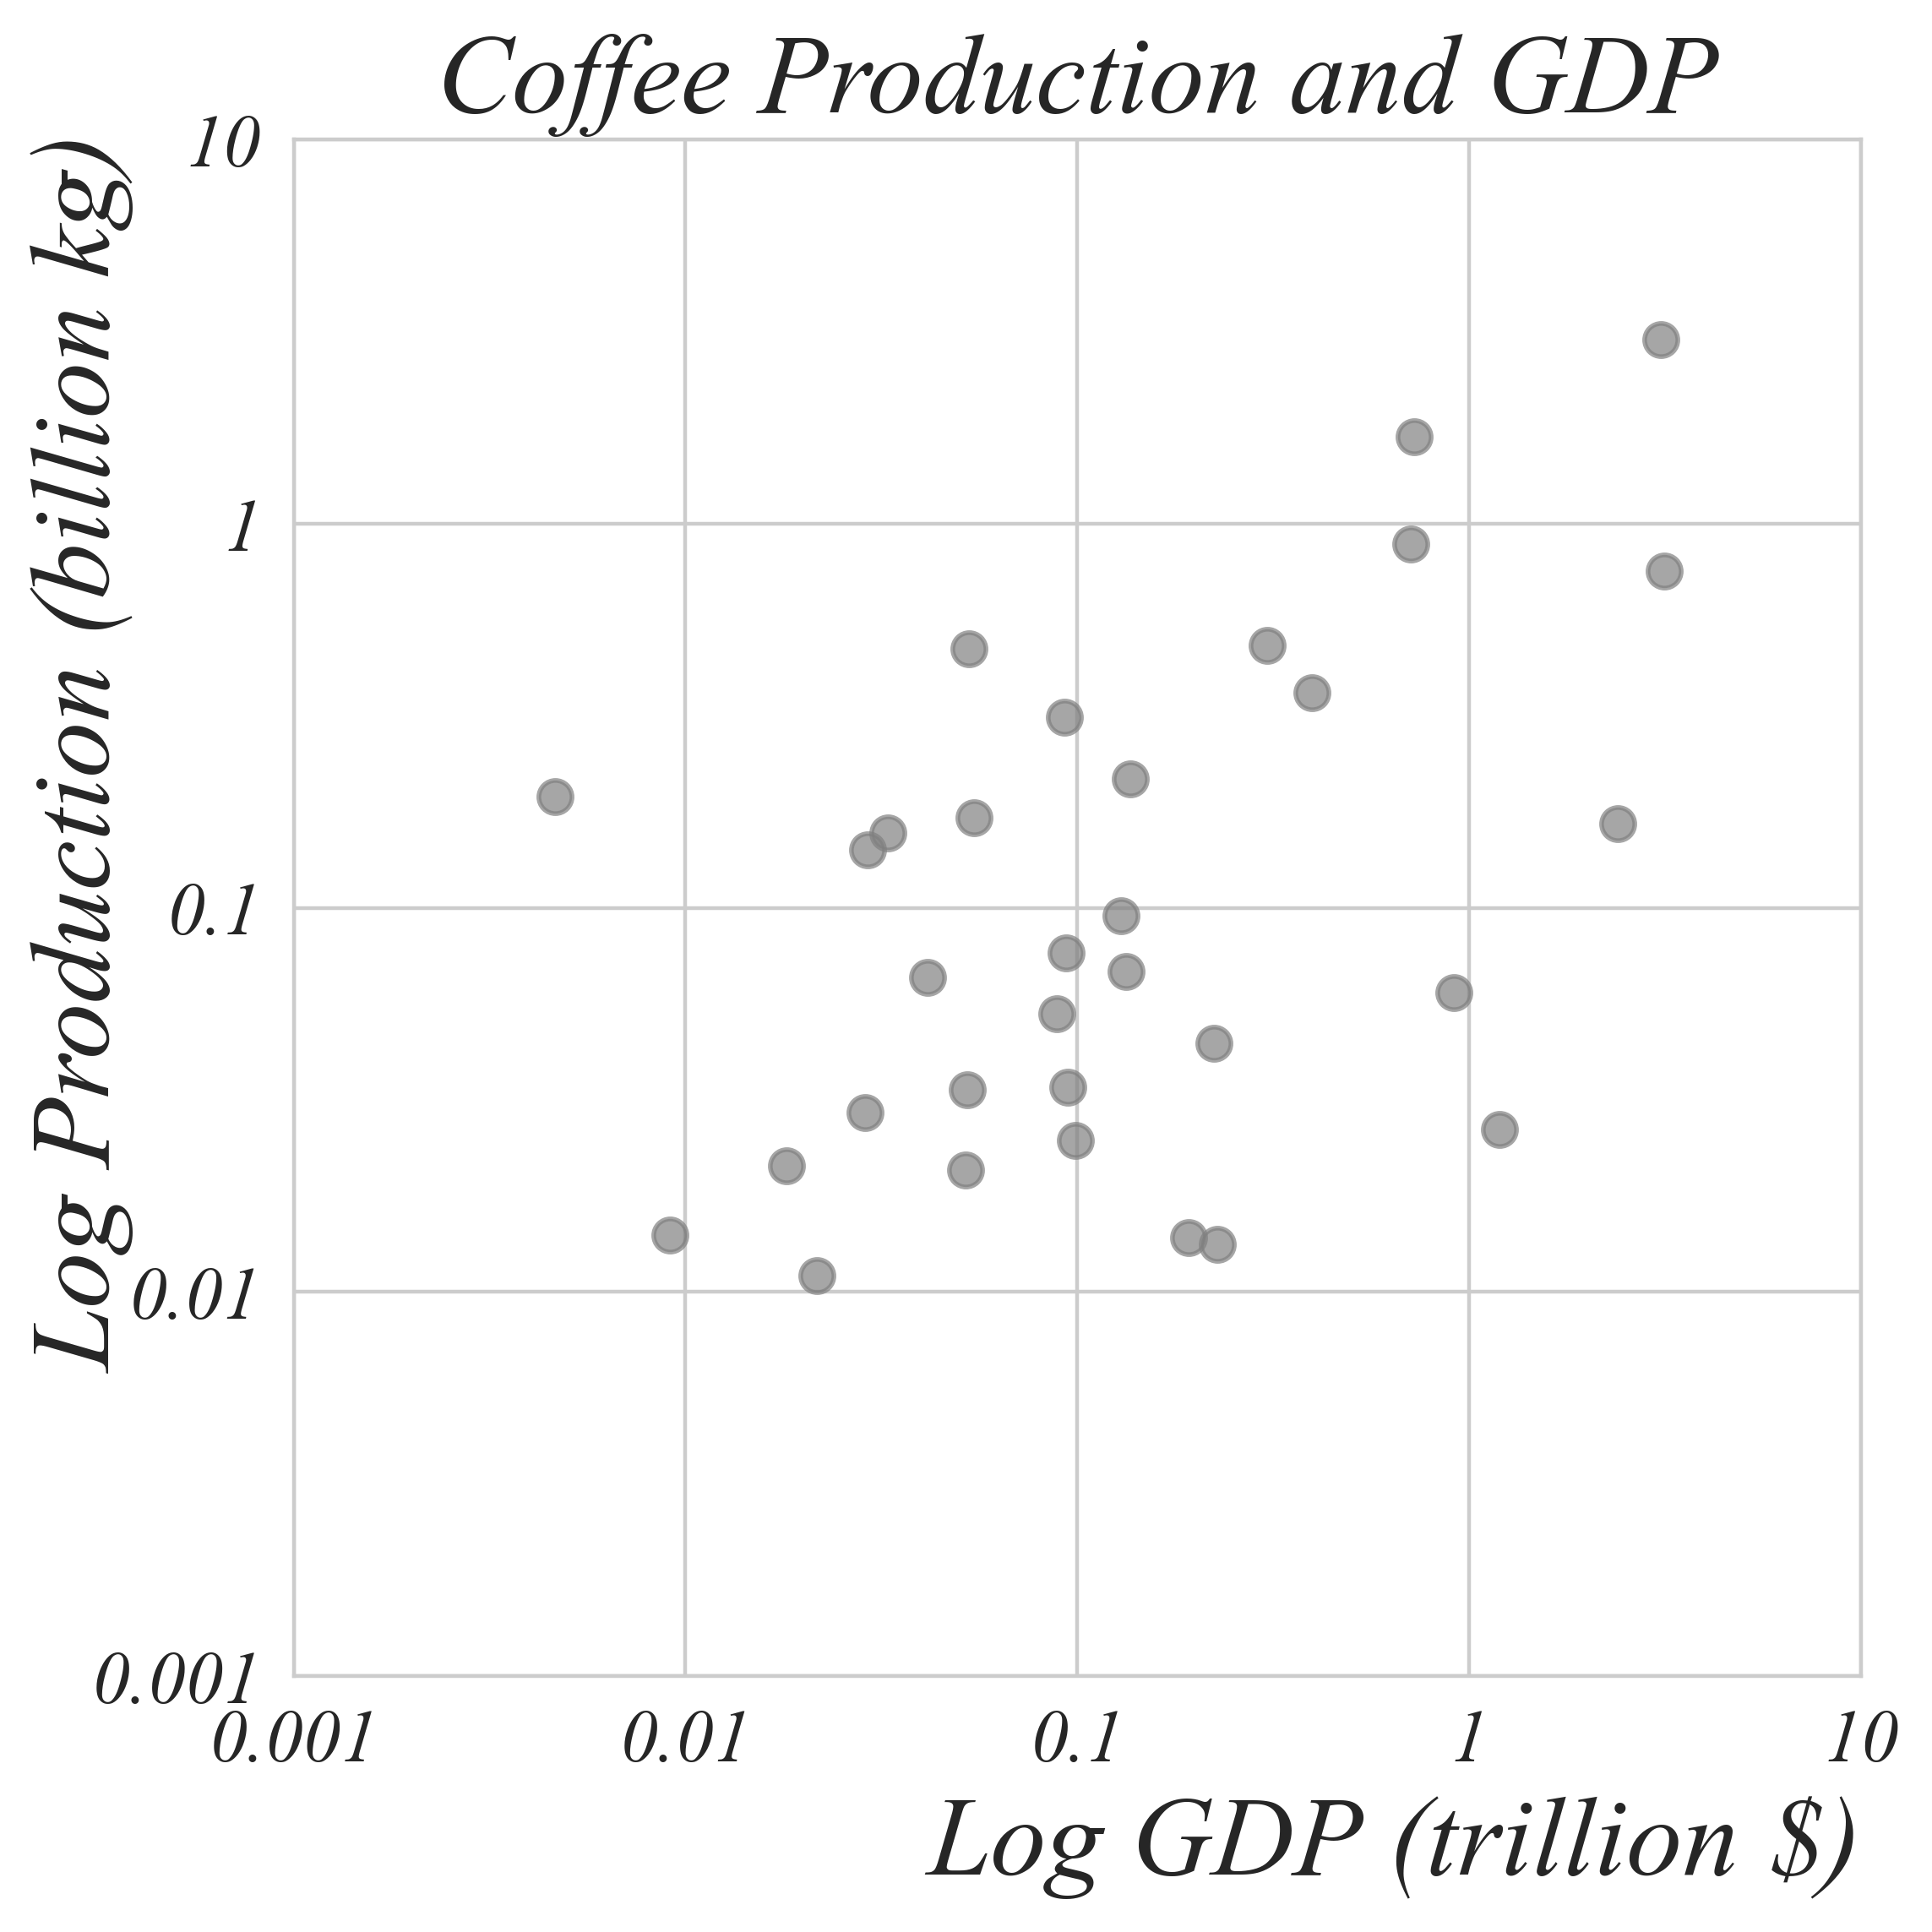

In [23]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['Tonnes'].replace(0, np.nan) + 1e-10)

plt.scatter(data['log10_GDP'], data['log10_Tonnes'], color='grey', edgecolors='grey', alpha=0.7, s=50)

plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)
plt.ylabel('Log Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.1, .6)
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.title('Coffee Production and GDP')

plt.tight_layout()
plt.savefig('Part_2_1/i/13.png')

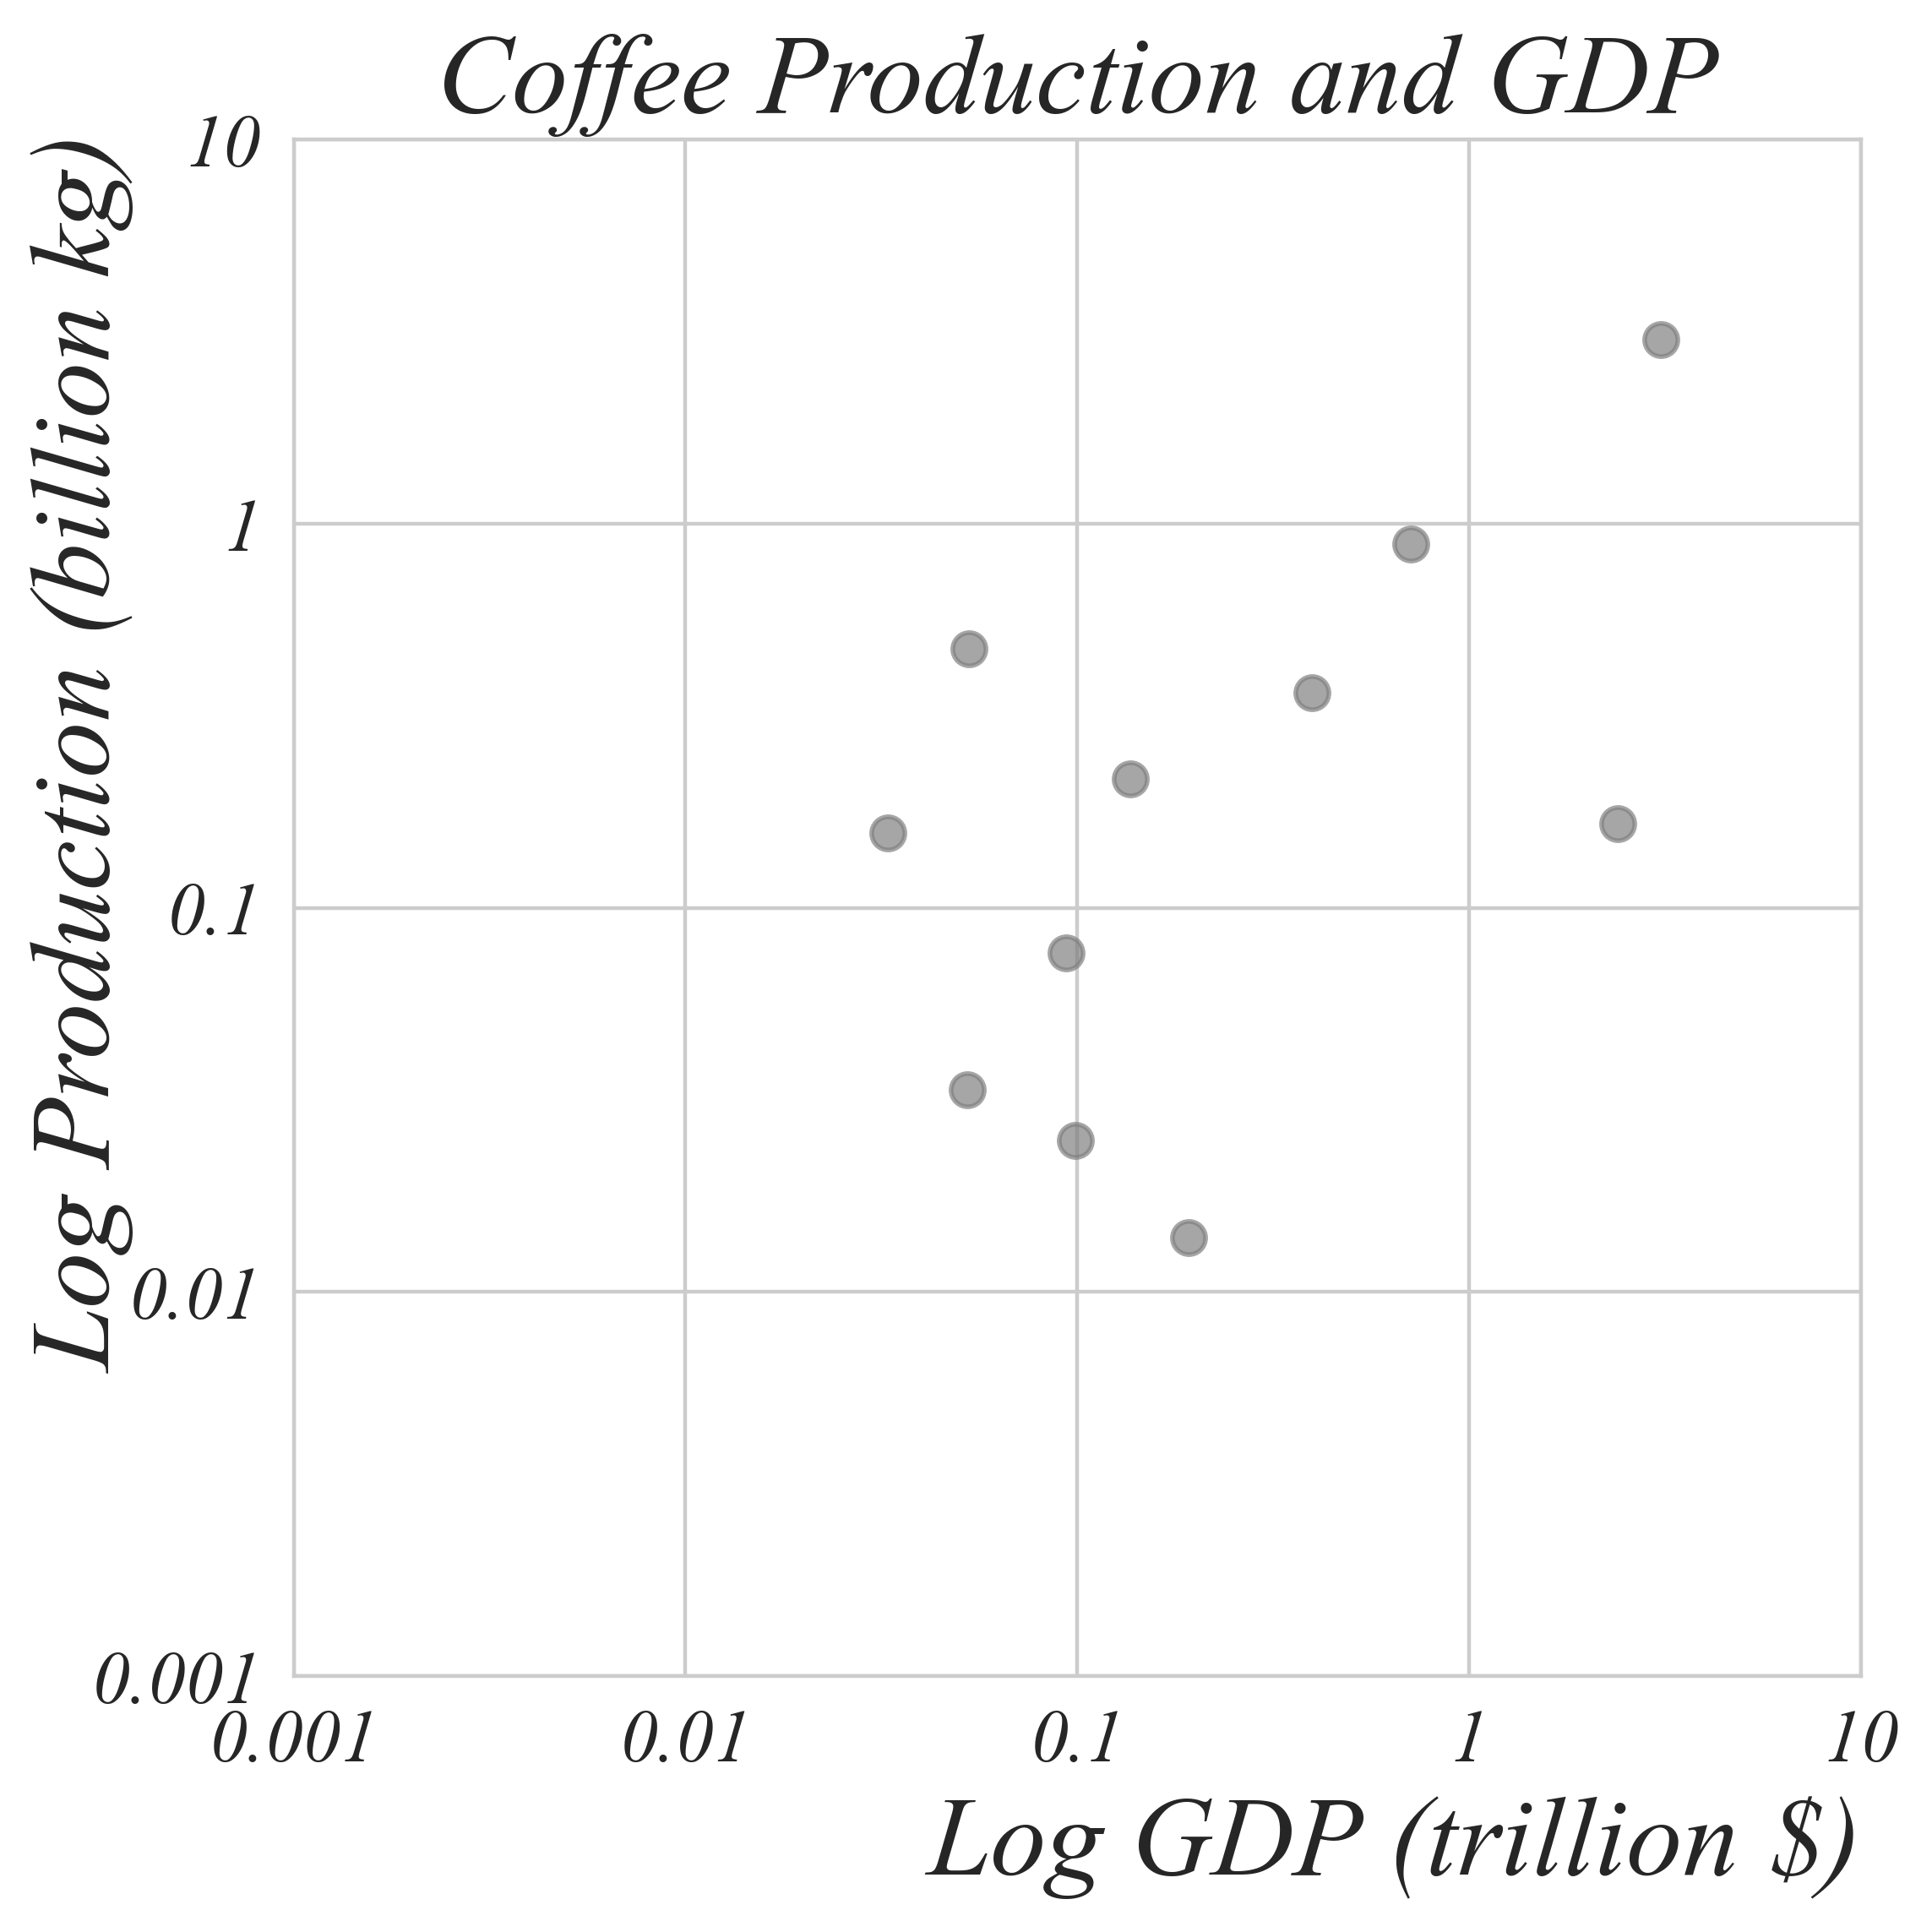

In [24]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['Tonnes'].replace(0, np.nan) + 1e-10)

americas = ['Bolivia', 'Brazil', 'Colombia', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Peru']
america_data = data[data.Entity.isin(americas)]
plt.scatter(america_data['log10_GDP'], america_data['log10_Tonnes'], color='grey', edgecolors='grey', alpha=0.7, s=50)

plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)
plt.ylabel('Log Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.1, .6)
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.title('Coffee Production and GDP')

plt.tight_layout()
plt.savefig('Part_2_1/i/14.png')

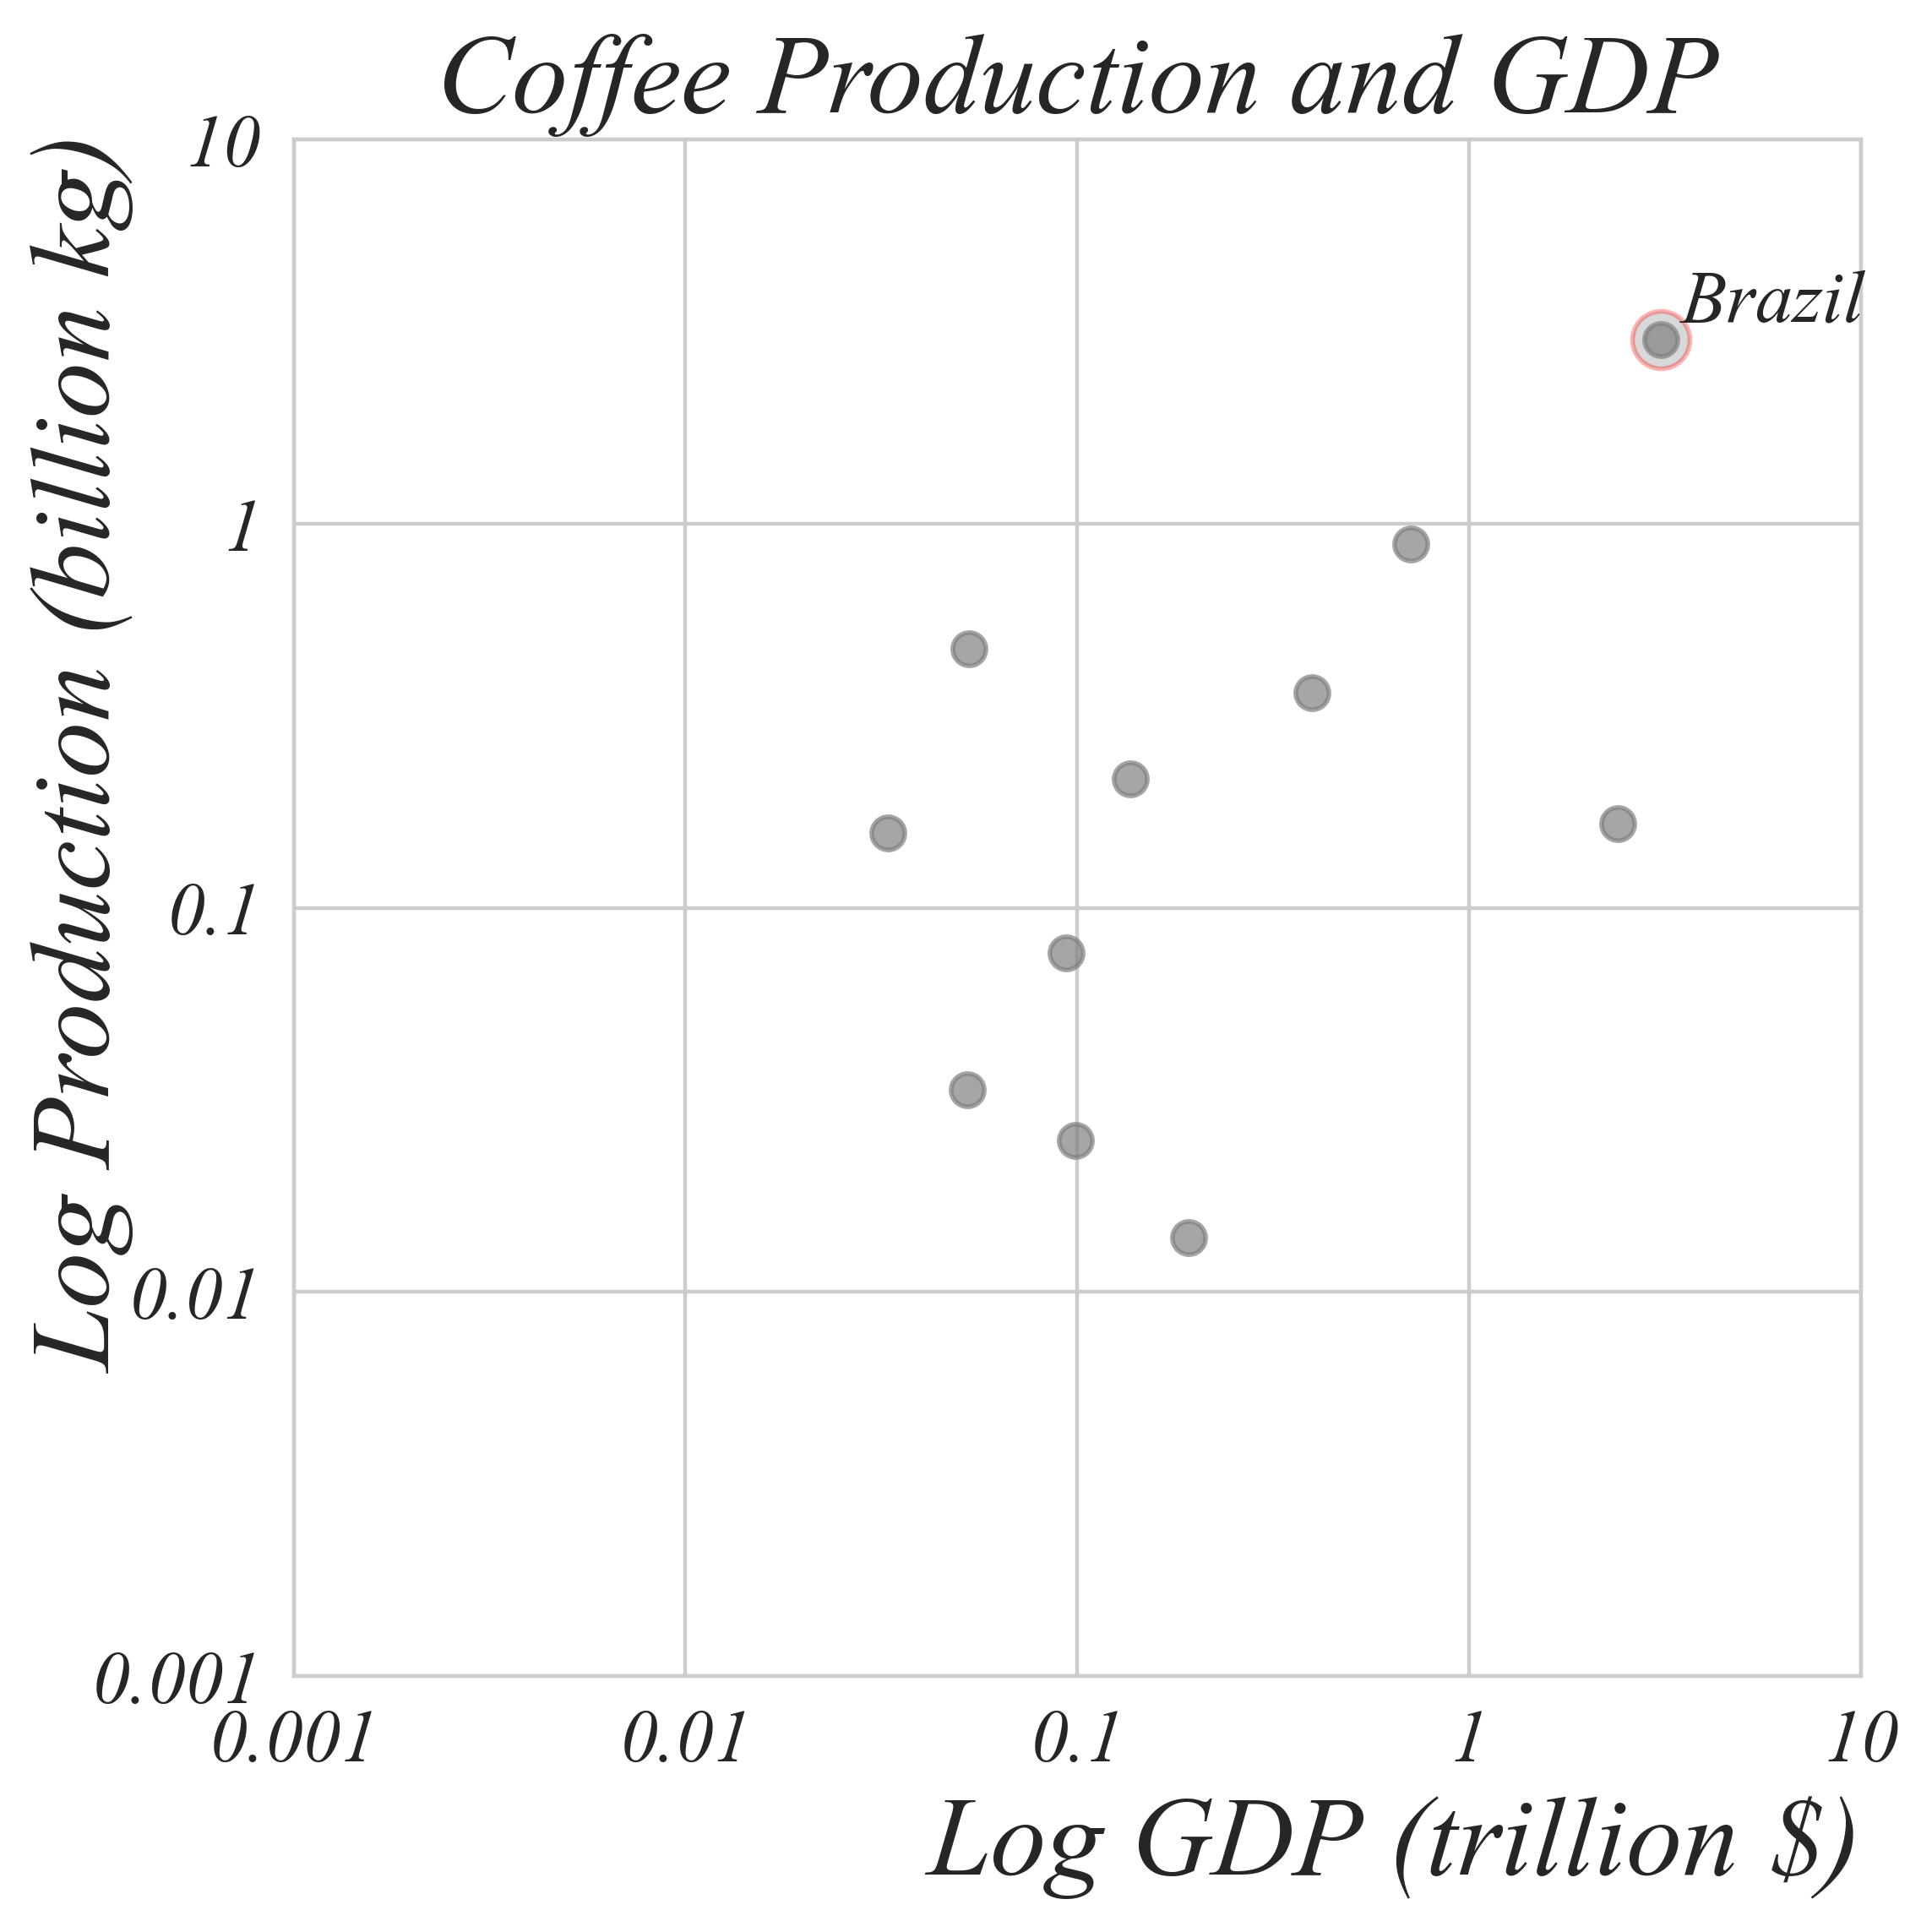

In [25]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['Tonnes'].replace(0, np.nan) + 1e-10)

americas = ['Bolivia', 'Brazil', 'Colombia', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Peru']
america_data = data[data.Entity.isin(americas)]
plt.scatter(america_data['log10_GDP'], america_data['log10_Tonnes'], color='grey', edgecolors='grey', alpha=0.7, s=50)

america_max = america_data[america_data.log10_Tonnes == america_data.log10_Tonnes.max()]
plt.scatter(america_max['log10_GDP'], america_max['log10_Tonnes'], color='grey', edgecolors='red', alpha=0.3, s=150)

row_gdp = america_max.iloc[0].log10_GDP
row_tonnes = america_max.iloc[0].log10_Tonnes
row_entity = america_max.iloc[0].Entity

plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))

plt.xlabel('Log GDP (trillion $)', loc='right')
x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)
plt.ylabel('Log Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.1, .6)
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.title('Coffee Production and GDP')

plt.tight_layout()
plt.savefig('Part_2_1/i/15.png')

/var/folders/v7/n92bbkrn50x_rhkvsgm29llc0000gn/T/ipykernel_69149/2553343350.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  america_data['GDP_dif'] = np.abs(america_data.log10_GDP - row_gdp)


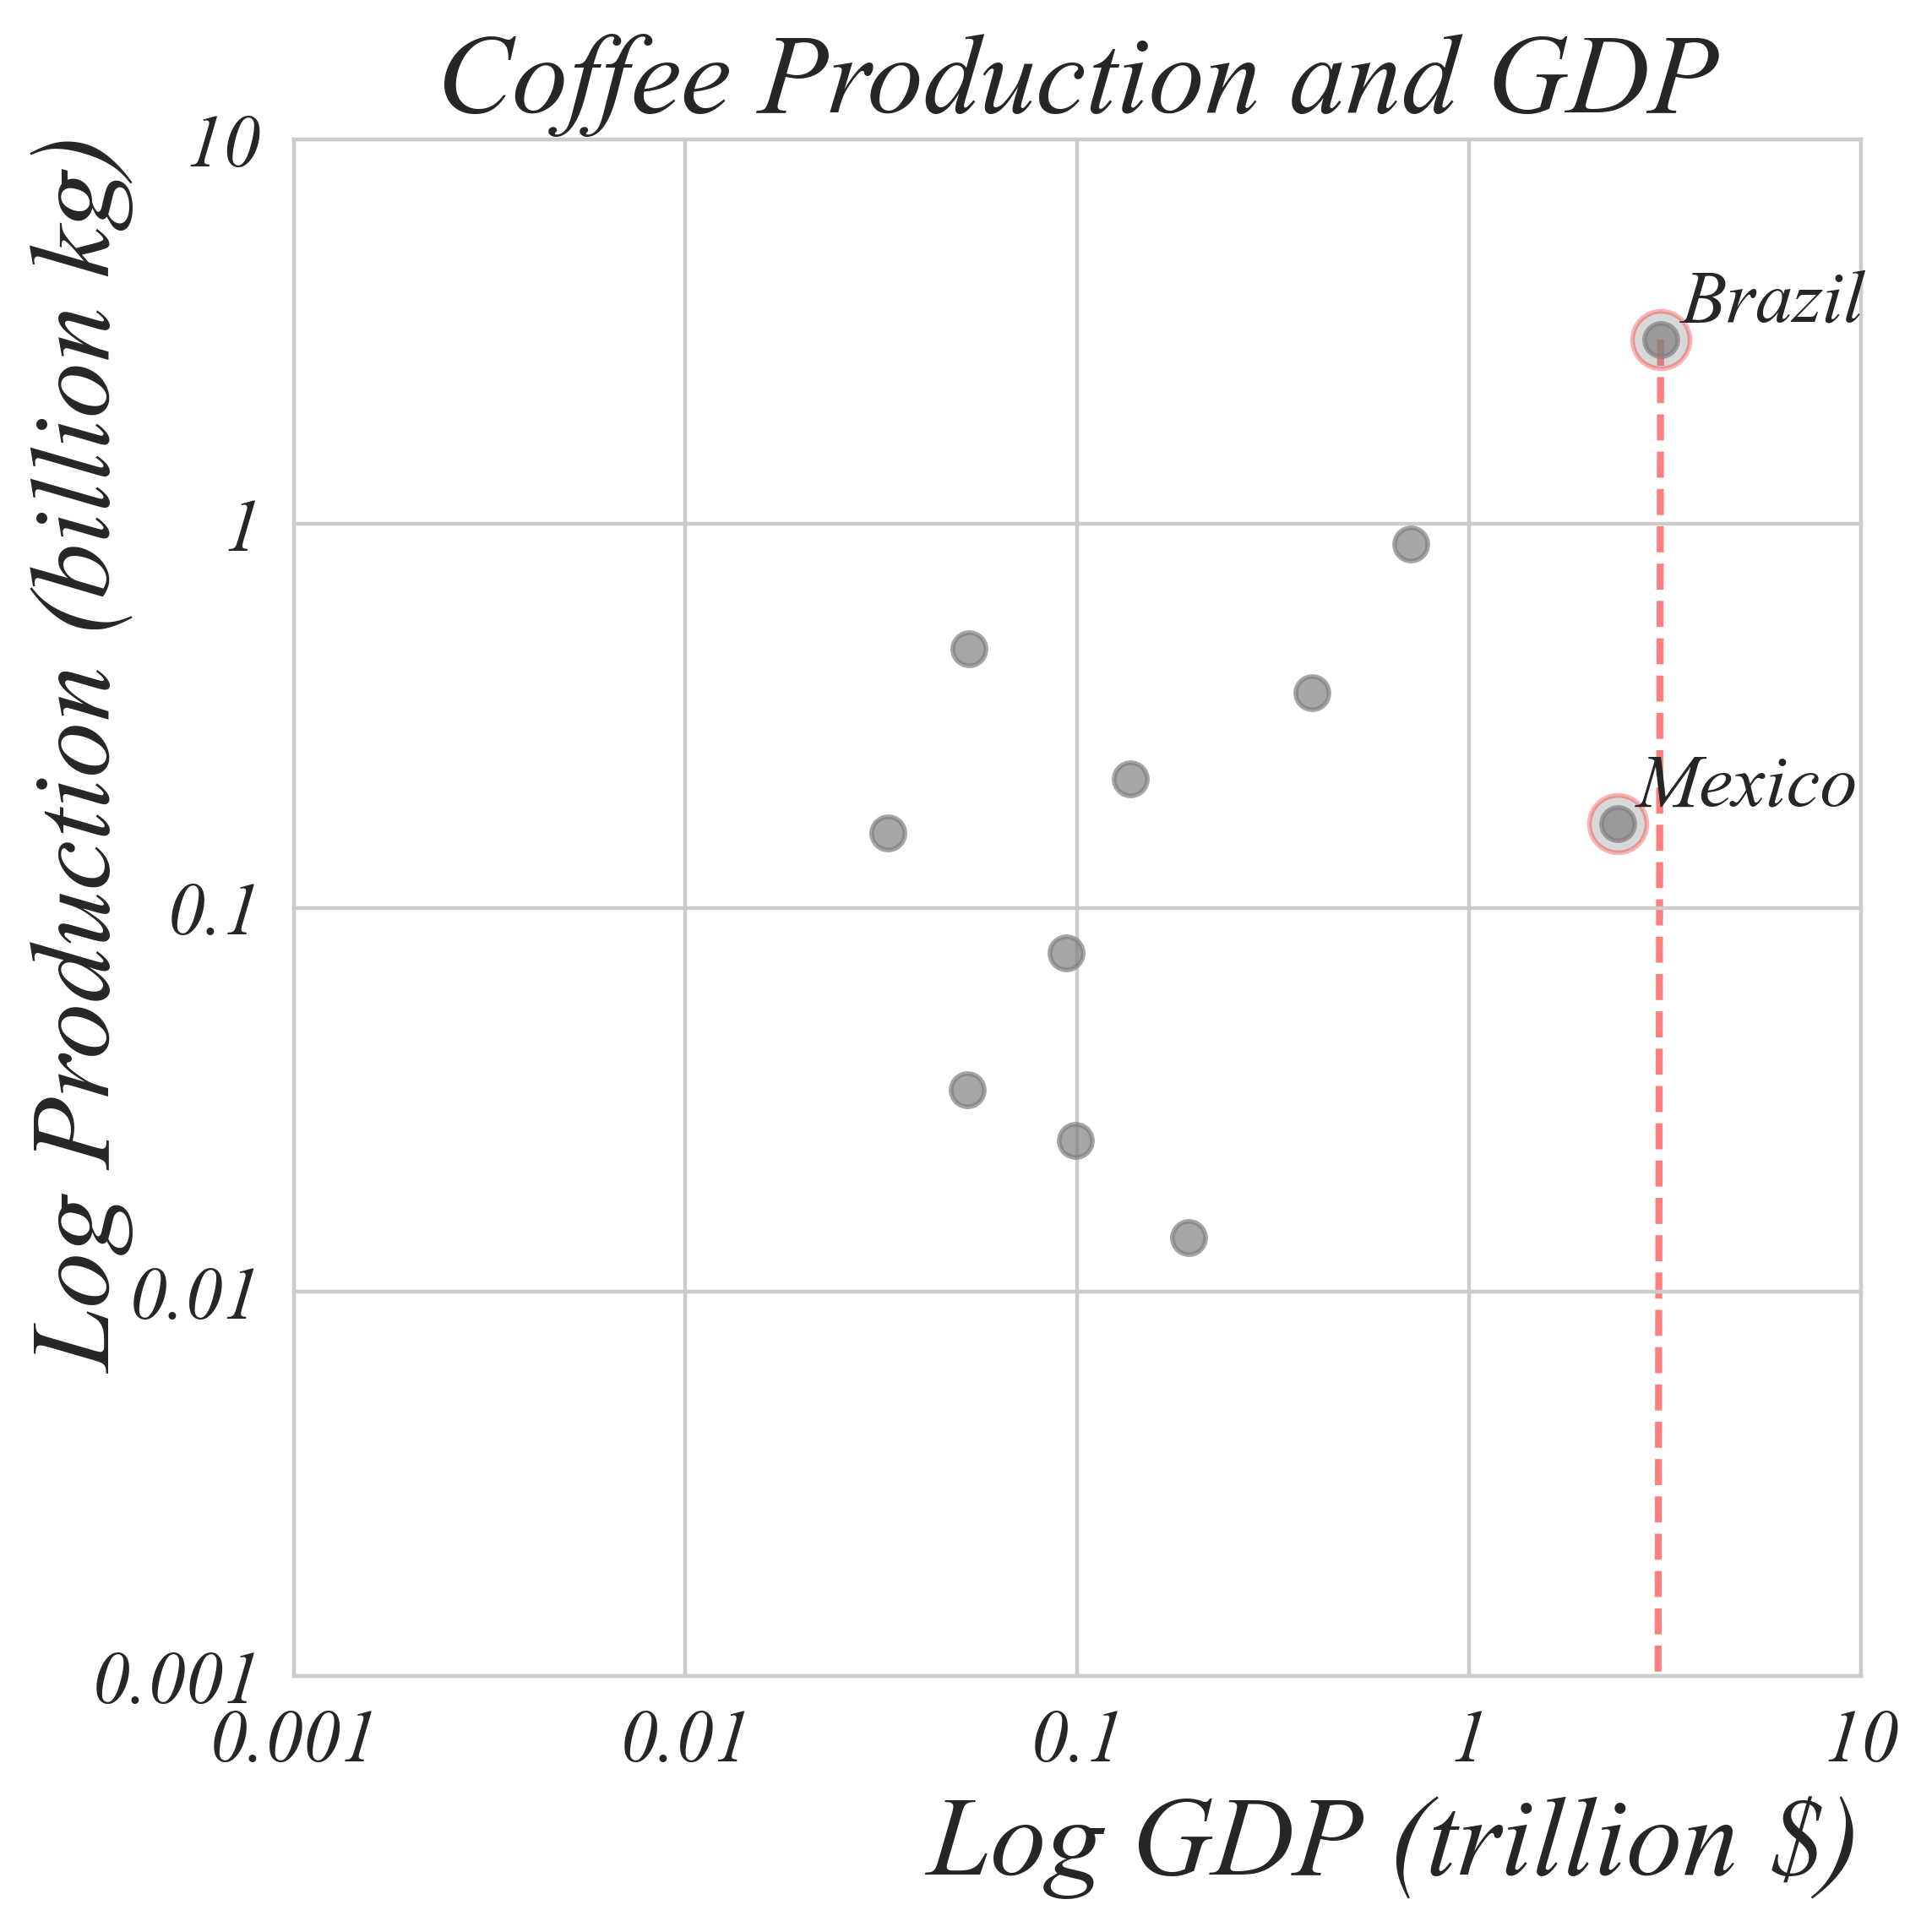

In [27]:
from Weidman_Figures import *
    
fig, ax = Weid_Fig(height=6, widths=6, fontsize=24)

data = pd.read_csv('Part_2_1/Beans_GDP.csv')
data = data[data['Year'] == 2019]
data['log10_GDP'] = np.log10(data['GDP'].replace(0, np.nan) + 1e-10)
data['log10_Tonnes'] = np.log10(data['Tonnes'].replace(0, np.nan) + 1e-10)

americas = ['Bolivia', 'Brazil', 'Colombia', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Peru']
america_data = data[data.Entity.isin(americas)]
plt.scatter(america_data['log10_GDP'], america_data['log10_Tonnes'], color='grey', edgecolors='grey', alpha=0.7, s=50)

america_max = america_data[america_data.log10_Tonnes == america_data.log10_Tonnes.max()]
plt.scatter(america_max['log10_GDP'], america_max['log10_Tonnes'], color='grey', edgecolors='red', alpha=0.3, s=150)

row_gdp = america_max.iloc[0].log10_GDP
row_tonnes = america_max.iloc[0].log10_Tonnes
row_entity = america_max.iloc[0].Entity

plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))

plt.plot([row_tonnes,row_gdp],[np.log(0.01),row_gdp], linestyle='--', color='red', zorder=-1, alpha=0.5)

america_data['GDP_dif'] = np.abs(america_data.log10_GDP - row_gdp)

america_dif_min = america_data[america_data['GDP_dif'] == america_data[america_data['GDP_dif'] >0]['GDP_dif'].min()]
plt.scatter(america_dif_min['log10_GDP'], america_dif_min['log10_Tonnes'], color='grey', edgecolors='red', alpha=0.3, s=150)

row_gdp = america_dif_min.iloc[0].log10_GDP
row_tonnes = america_dif_min.iloc[0].log10_Tonnes
row_entity = america_dif_min.iloc[0].Entity

plt.annotate(row_entity,(row_gdp, row_tonnes),xytext=(row_gdp+0.05, row_tonnes+0.05))

plt.xlabel('Log GDP (trillion $)', loc='right')

x_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
x_ticks = np.log10(x_ticks_labels)
plt.xticks(ticks=x_ticks, labels=x_ticks_labels)
plt.ylabel('Log Production (billion kg)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.1, .6)
y_ticks_labels = [0.001, 0.01, 0.1, 1, 10]
y_ticks = np.log10(y_ticks_labels)
plt.yticks(ticks=y_ticks, labels=y_ticks_labels)
plt.ylim(y_ticks.min(),y_ticks.max())
plt.title('Coffee Production and GDP')

plt.tight_layout()
plt.savefig('Part_2_1/i/16.png')

## Coffee Consumption

## From Old Concept 2.2

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams.update({
    'font.family': 'serif',              # Set the font family
    'font.serif': ['Times New Roman'],   # Use a specific serif font
    'font.size': 16,                     # Set the general font size
    'axes.titlesize': 16,                # Set the font size of the title
    'axes.labelsize': 16,                # Set the font size of axis labels
    'font.style': 'italic',              # Set the font style to italic
    'figure.dpi': 400   
})

category_color_pal = sns.color_palette("hls", 8)#sns.color_palette("husl", 8)
continuous_color_pal = sns.color_palette("rocket_r", as_cmap=True)

## Datasets

In [2]:
cpi = pd.read_csv('data/CPI_raw.csv')

cpi.Year = cpi.Year.astype(int)
cpi = cpi[cpi.Year >= 1970]
cpi['I'] = cpi['Annual Percent Change (rate of inflation)'].str.replace('%', '').astype(float)/100
cpi['cpi'] = cpi['Annual Average CPI(-U)'].astype(float)

""" 1970's Dollar """

# To find out how much a price in Year 1 would be in Year 2 dollars:
# Year 2 Price = Year 1 Price x (Year 2 CPI/Year 1 CPI)

price_base = 1
values = []
i_base = cpi['cpi'].values[0]
for i in cpi['cpi'].values:
    price = price_base * (i/i_base)
    values.append(price)
cpi['base'] = values

""" Today's Dollar """

# To find out how much a price in Year 1 would be in Year 2 dollars:
# Year 2 Price = Year 1 Price x (Year 2 CPI/Year 1 CPI)

price_base = 1
values = []
i_base = cpi['cpi'].values[-1]
for i in cpi['cpi'].values:
    price = price_base * (i/i_base)
    values.append(price)
cpi['today'] = values

cpi.to_csv('data/CPI.csv')

In [ ]:
data = pd.read_csv('data/Daily_Coffee_Prices.csv', index_col=0)
data['date_column'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date_column'].dt.year
data = data[(data['year'] < 2023)]

cpi = pd.read_csv('data/CPI.csv')

today_list = []
cpi_list = []
for i,row in data.iterrows():
    cpi_year = cpi[cpi.Year == row.year]
    year = row.year
    today_list.append(cpi_year.today.iloc[0])
    cpi_list.append(cpi_year.cpi.iloc[0])
    
data['today'] = today_list
data['cpi'] = cpi_list
data.to_csv('data/Coffee_Prices_CPI.csv')

In [ ]:
data = pd.read_csv('data/Coffee_Prices.csv')
data = data.rename(columns={' value': 'price'})

data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['date'] = data['date'].dt.to_period('M')

monthly_avg = data.groupby('date')['price'].mean().reset_index()

monthly_avg.to_csv('data/Monthly_Coffee_Prices.csv')

In [ ]:
data = pd.read_csv('data/Coffee_Prices.csv')
data = data.rename(columns={' value': 'price'})

data.to_csv('data/Daily_Coffee_Prices.csv')

## Figures

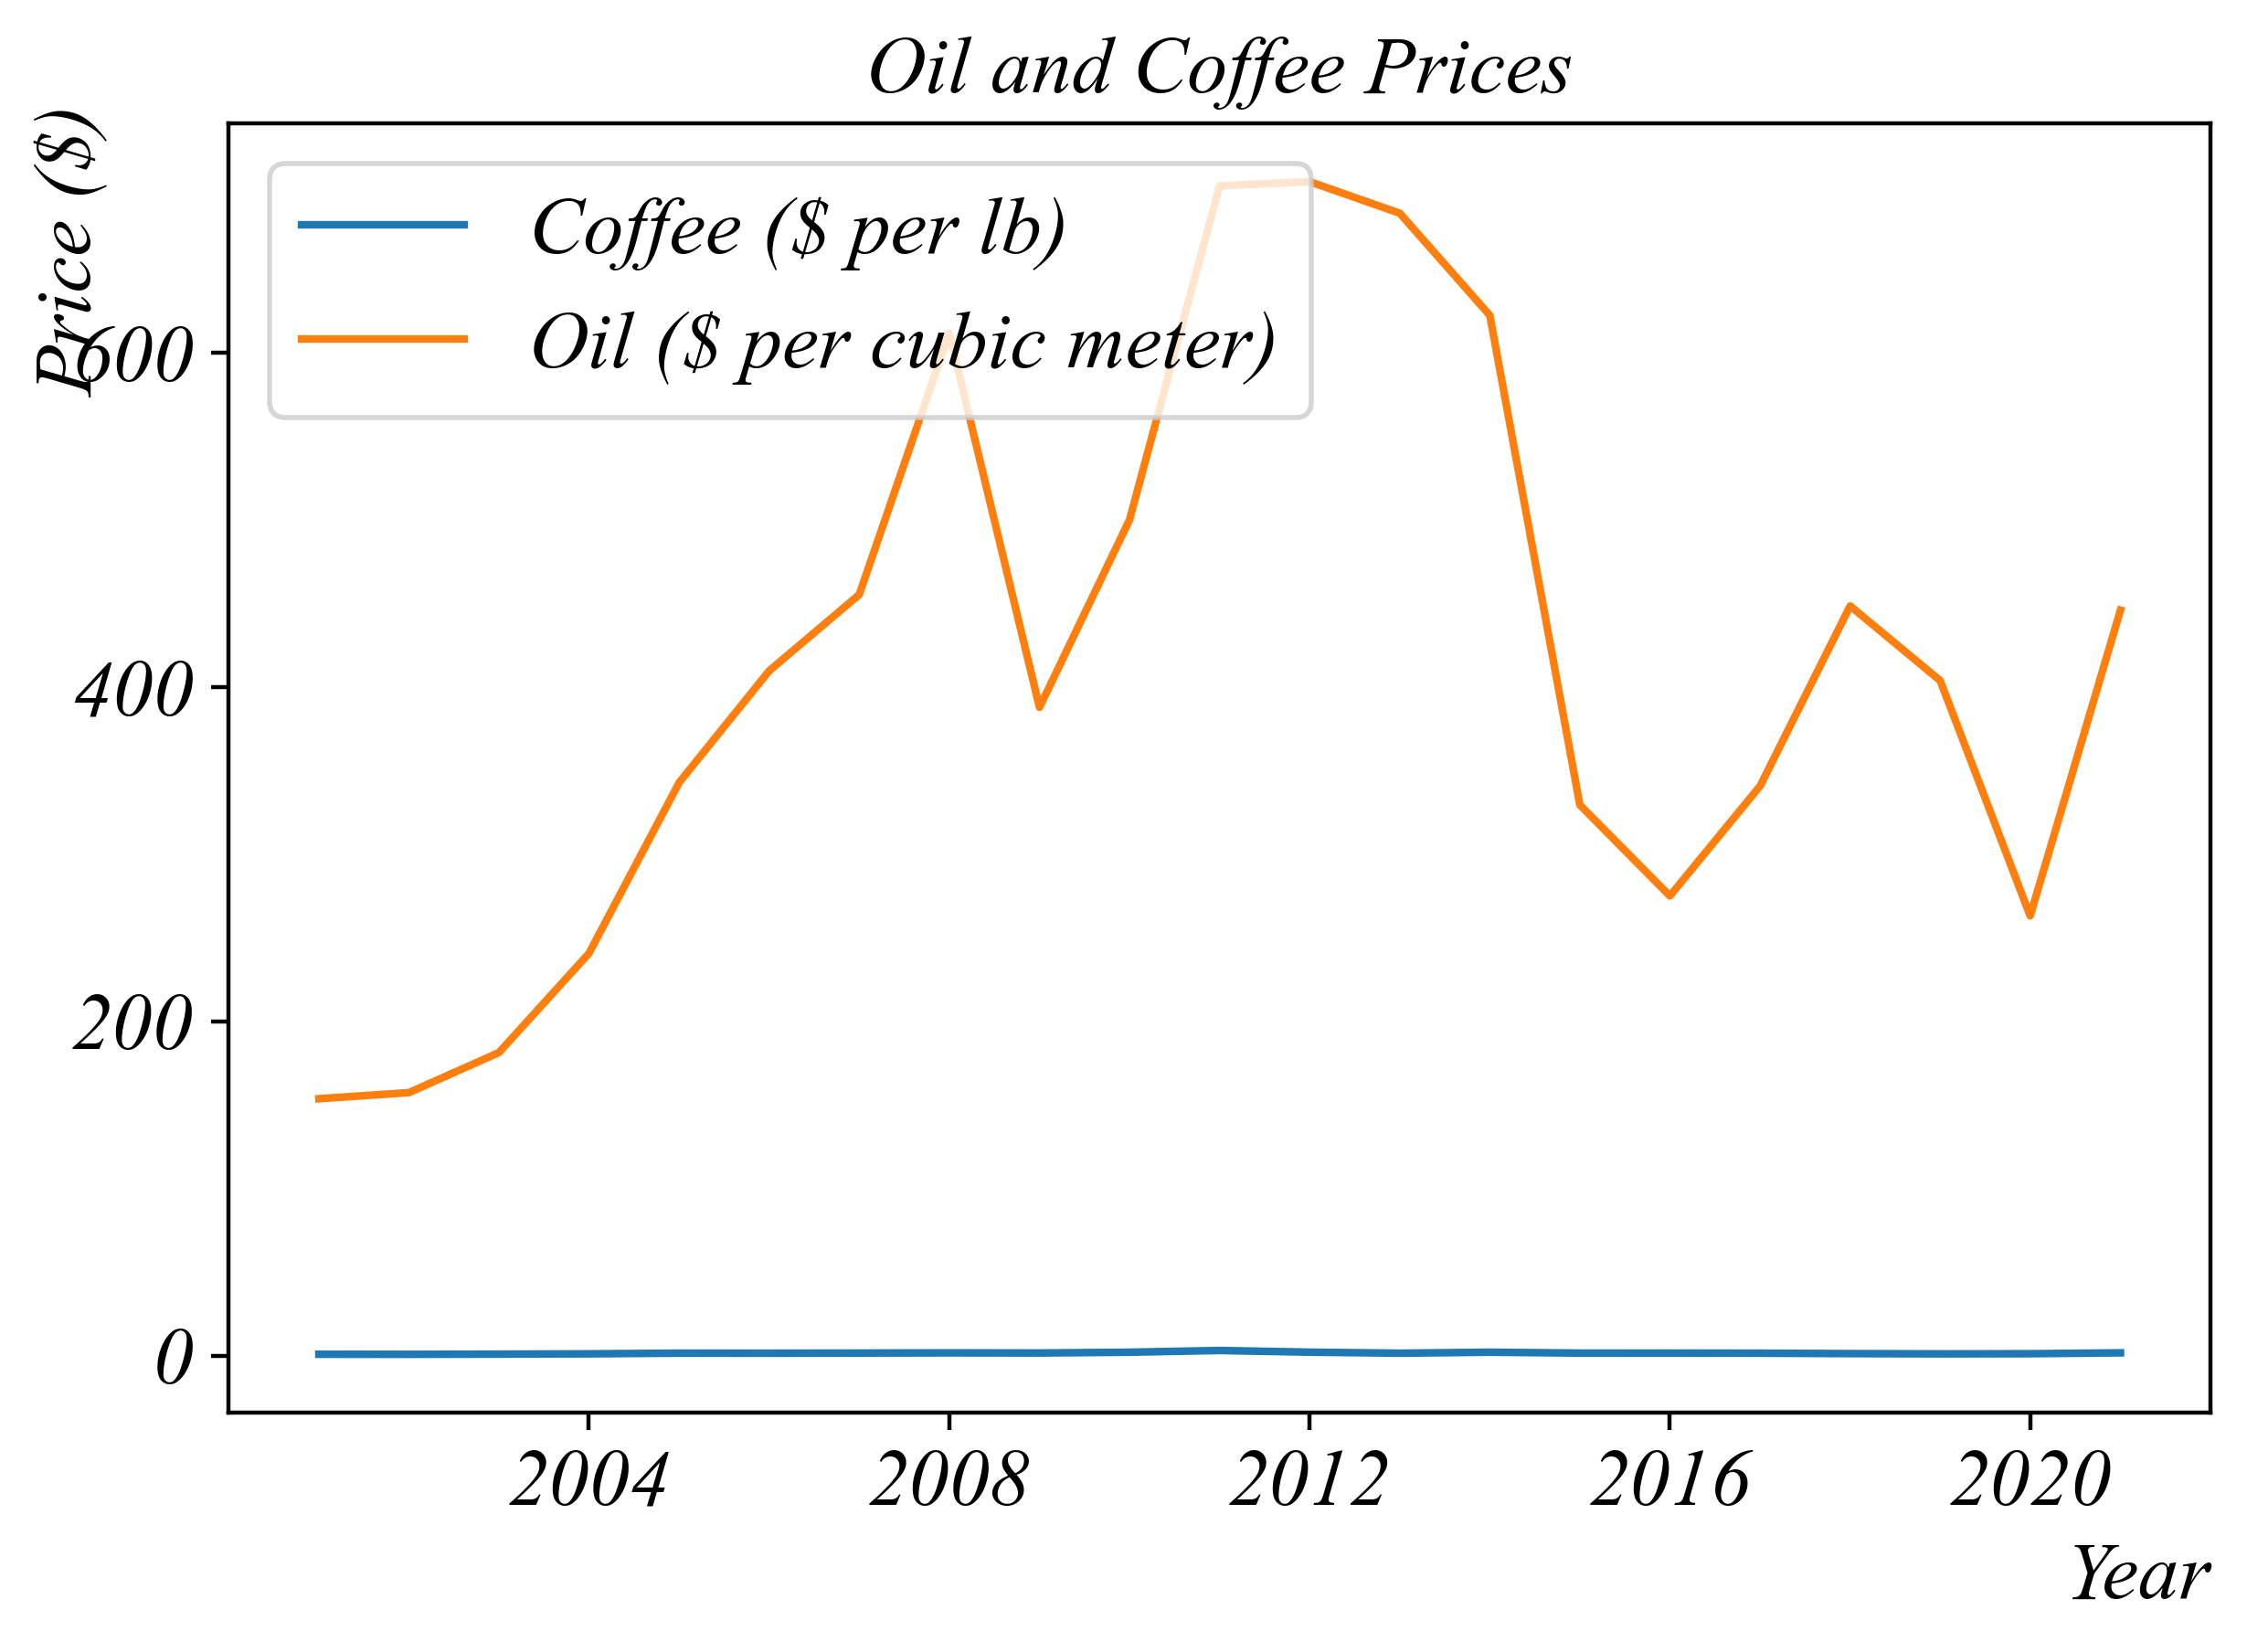

In [6]:
import matplotlib.dates as mdates

data = pd.read_csv('data/Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

plt.plot(data['date_column'], data['Coffee'], label='Coffee ($ per lb)')
plt.plot(data['date_column'], data['Oil'], label='Oil ($ per cubic meter)')

plt.xlabel('Year', loc='right')
plt.ylabel('Price ($)')

ax = plt.gca()
ax.yaxis.set_label_coords(-0.06, .9)
plt.title('Oil and Coffee Prices')
plt.legend()
plt.tight_layout()

#plt.savefig('i/x_15.png')

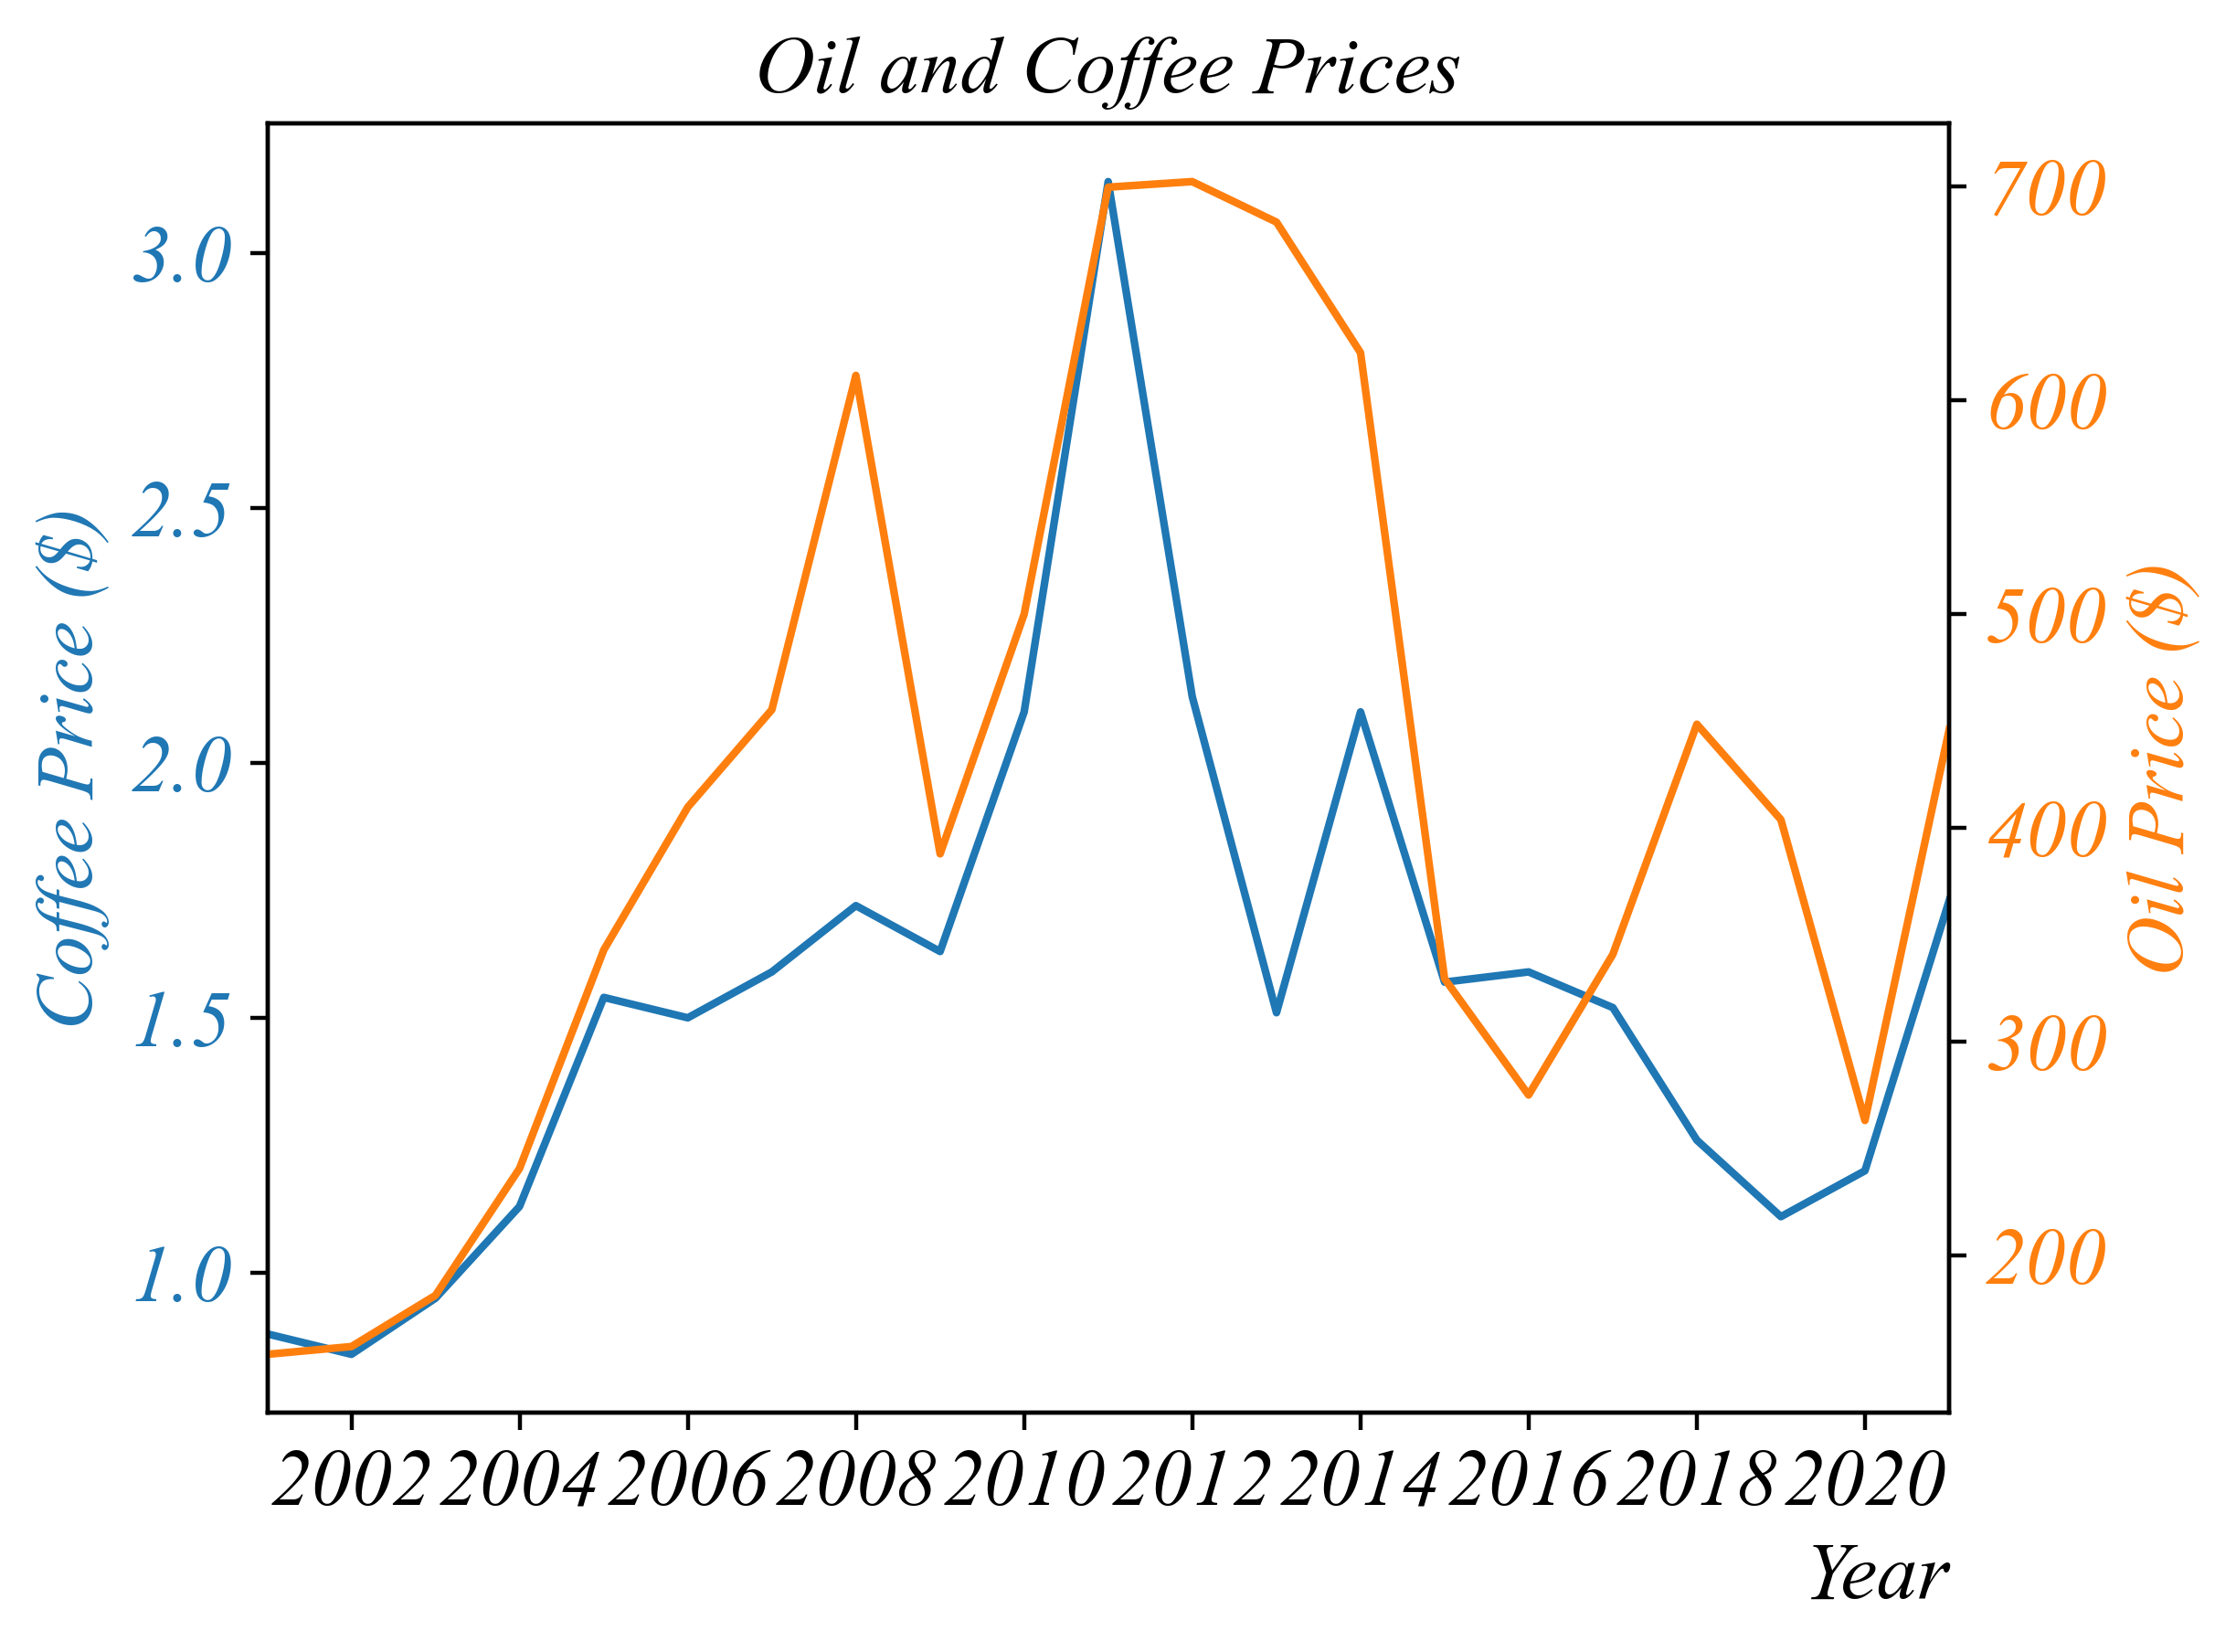

In [9]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()

# Read the data
data = pd.read_csv('data/Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

# Plot Coffee prices on the first y-axis
ax1.plot(data['date_column'], data['Coffee'], label='Coffee ($ per lb)', color='tab:blue')
ax1.set_xlabel('Year', loc='right')
ax1.set_xlim(data['date_column'].min(), data['date_column'].max())
ax1.set_ylabel('Coffee Price ($)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Oil prices on the second y-axis
ax2.plot(data['date_column'], data['Oil'], label='Oil ($ per cubic meter)', color='tab:orange')
ax2.set_ylabel('Oil Price ($)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add title and legend
plt.title('Oil and Coffee Prices')
fig.tight_layout()  # Adjust layout to prevent overlap

# Save the figure
#plt.savefig('Part_2_2/i/16.png')


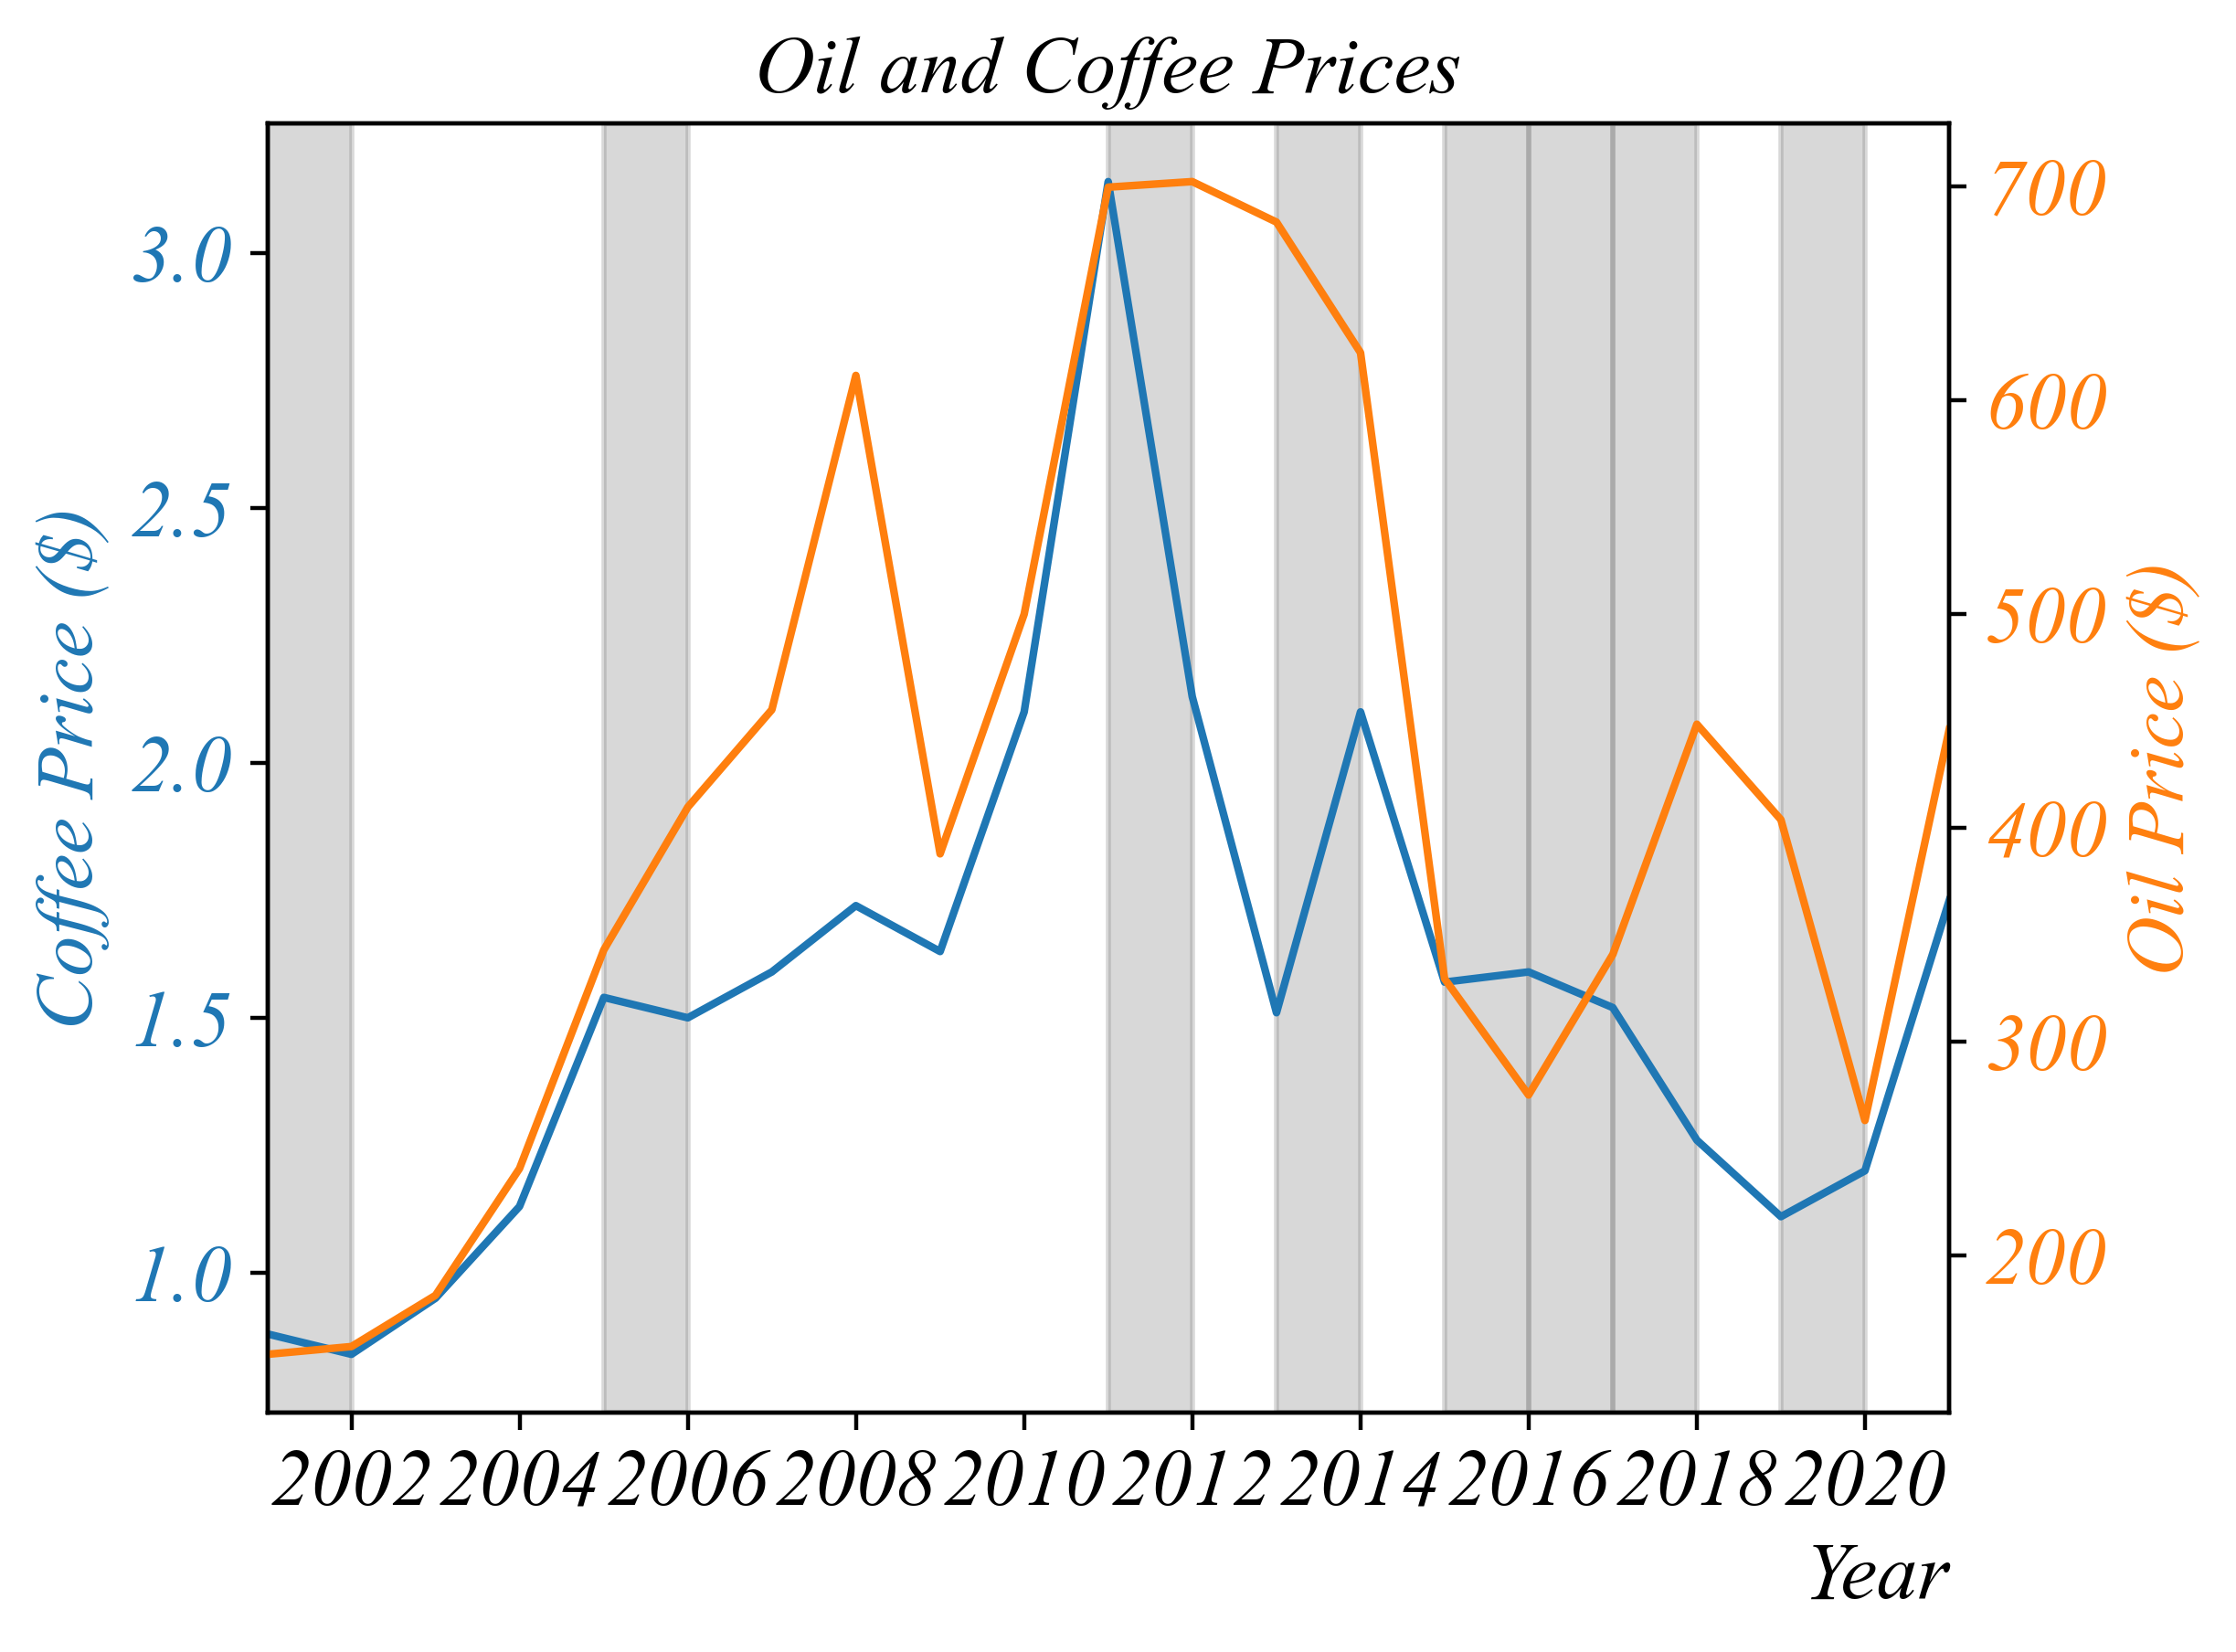

In [10]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()

# Read the data
data = pd.read_csv('data/Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

# Plot Coffee prices on the first y-axis
ax1.plot(data['date_column'], data['Coffee'], label='Coffee ($ per lb)', color='tab:blue')
ax1.set_xlabel('Year', loc='right')
ax1.set_xlim(data['date_column'].min(), data['date_column'].max())
ax1.set_ylabel('Coffee Price ($)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Oil prices on the second y-axis
ax2.plot(data['date_column'], data['Oil'], label='Oil ($ per cubic meter)', color='tab:orange')
ax2.set_ylabel('Oil Price ($)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Determine where both prices increase or decrease together
# Create a mask for where both prices are increasing or decreasing
increasing = (data['Coffee'].diff() < 0) & (data['Oil'].diff() > 0)
decreasing = (data['Coffee'].diff() > 0) & (data['Oil'].diff() < 0)

# Plot grey bars where both prices increase or decrease
for i in range(1, len(data)):
    if increasing[i] or decreasing[i]:
        ax1.axvspan(data['date_column'].iloc[i-1], data['date_column'].iloc[i], color='grey', alpha=0.3)

# Add title and legend
plt.title('Oil and Coffee Prices')
fig.tight_layout()  # Adjust layout to prevent overlap

# Save the figure
#plt.savefig('Part_2_2/i/17.png')

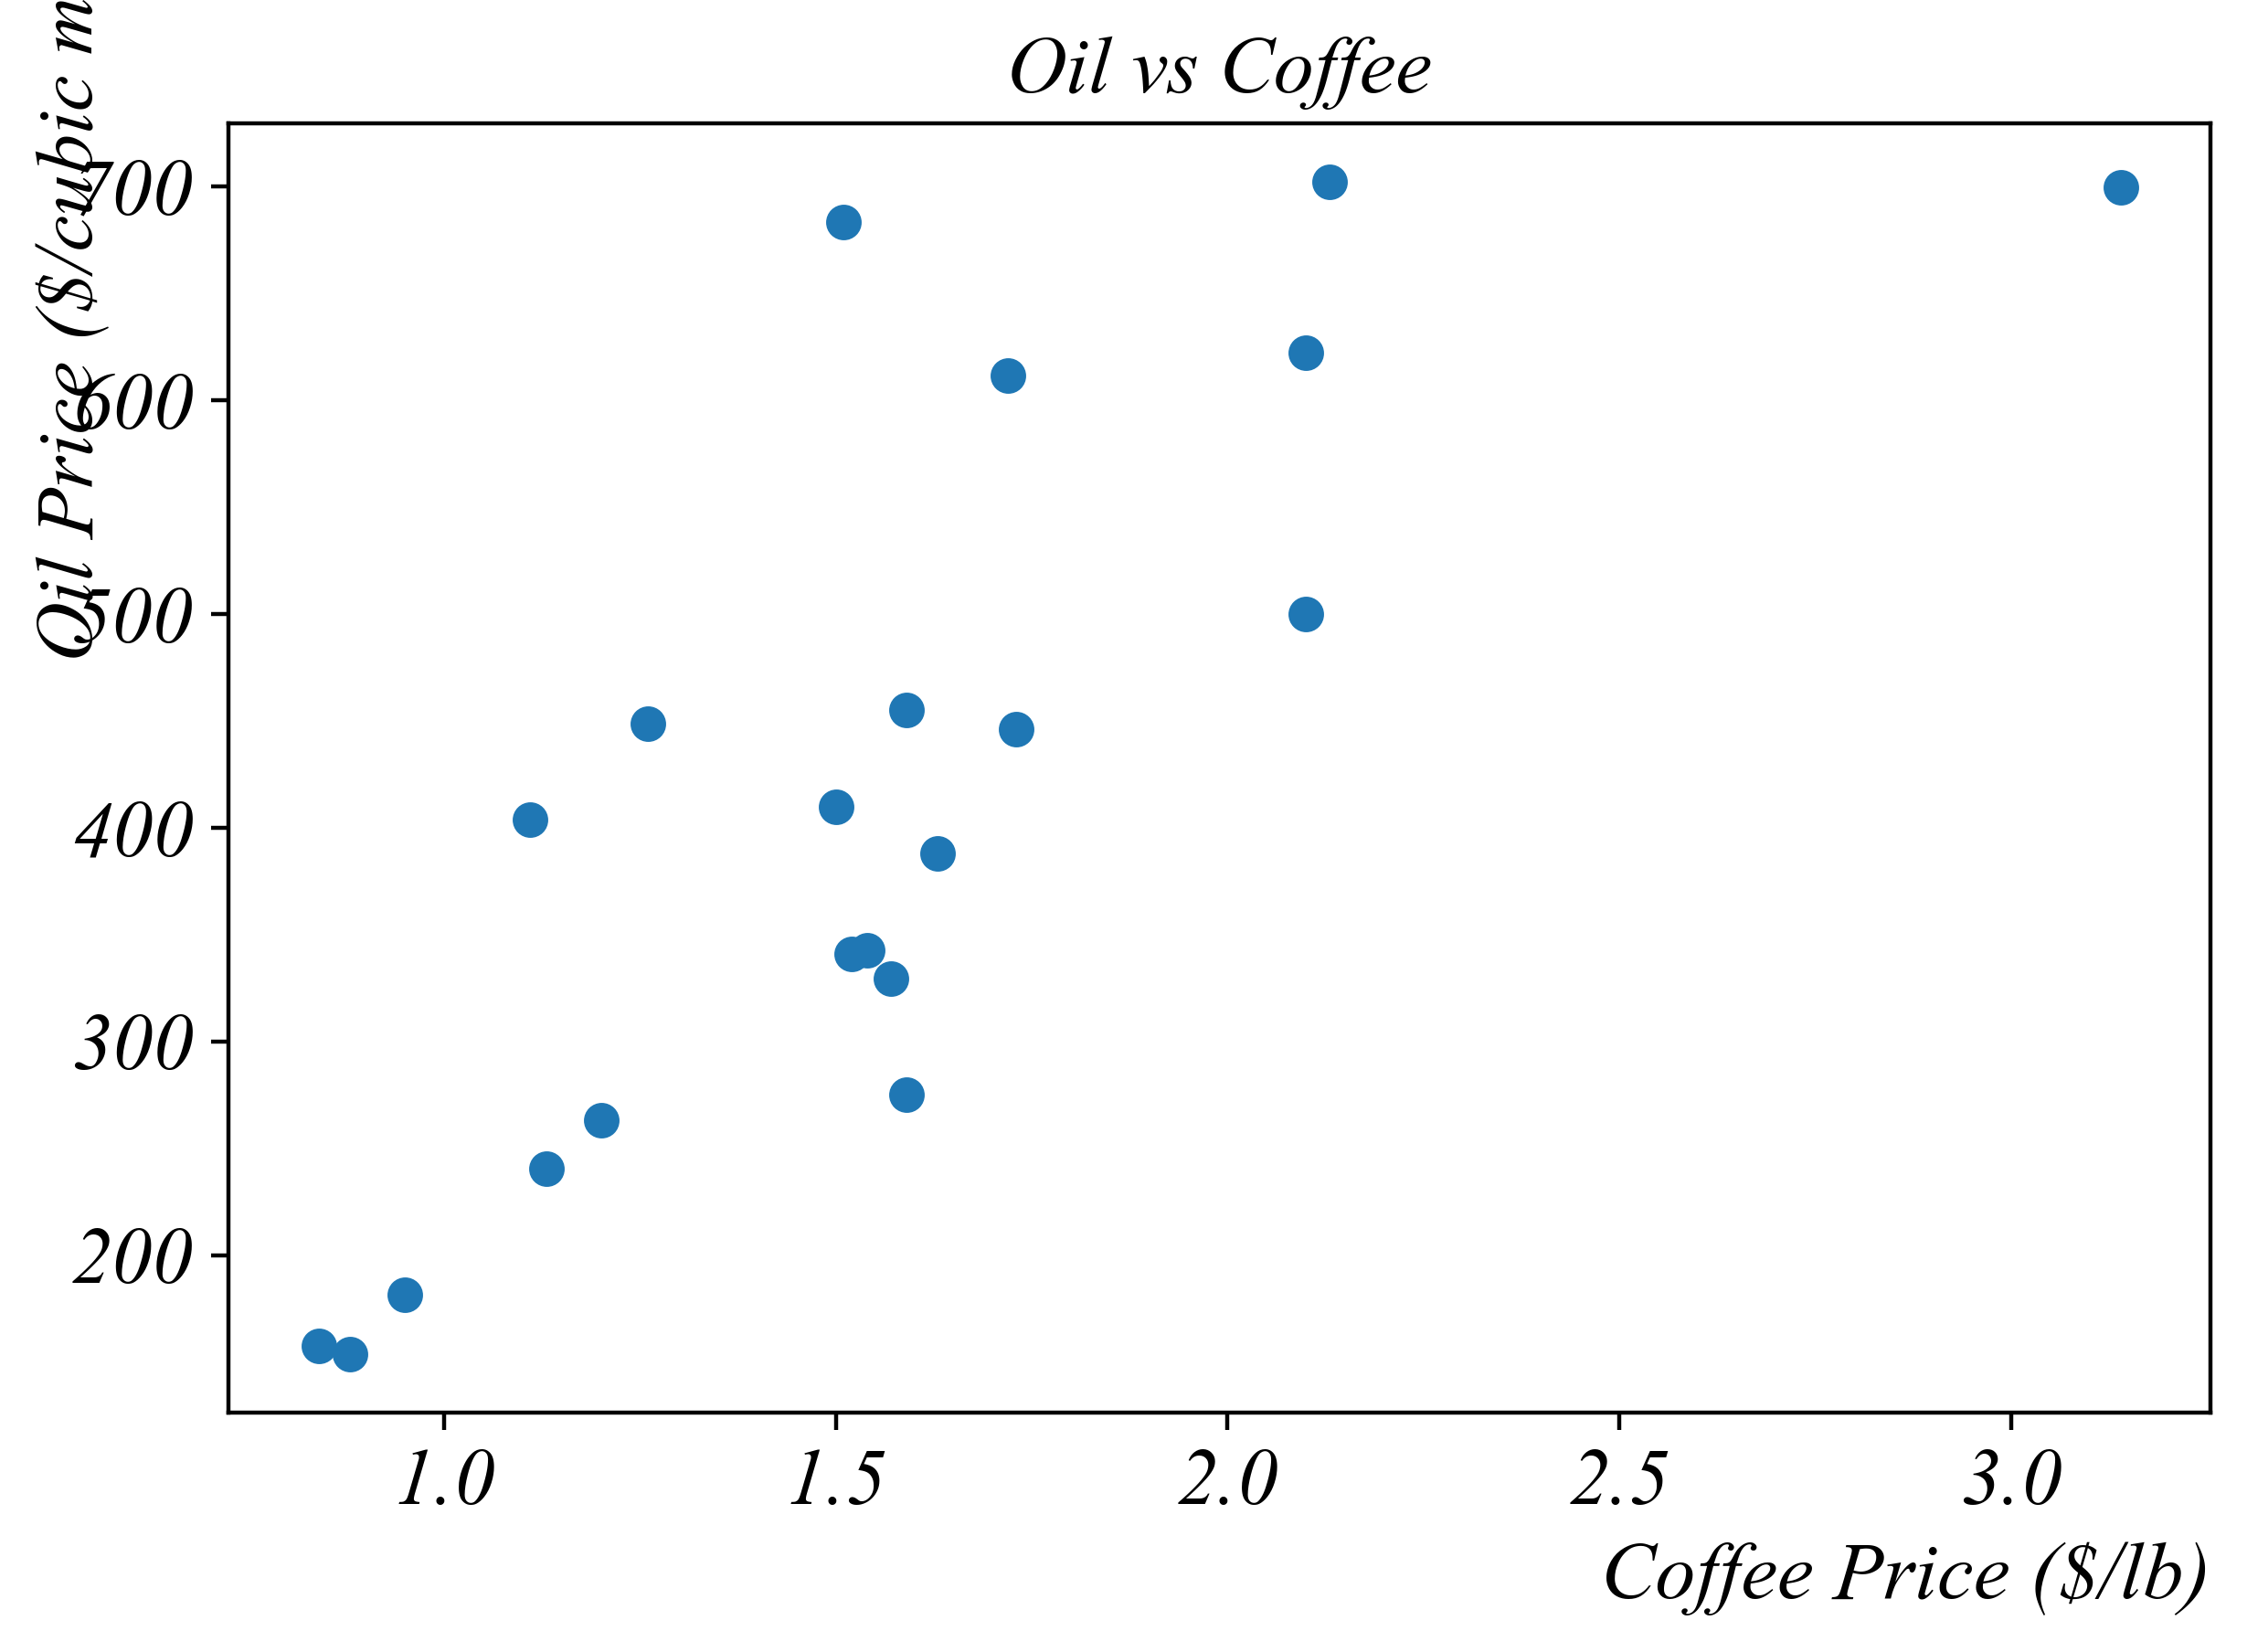

In [11]:
import matplotlib.dates as mdates

data = pd.read_csv('data/Coffee_Oil.csv')
data['date_column'] = pd.to_datetime(data['Year'], format='%Y')

plt.scatter(data['Coffee'], data['Oil'])

plt.xlabel('Coffee Price ($/lb)', loc='right')
plt.ylabel('Oil Price ($/cubic meter)')
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06, .9)
plt.title('Oil vs Coffee')
plt.tight_layout()
#plt.savefig('Part_2_2/i/18.png')
